<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Customer Segmentation <br>for ABCDEats inc.</center></div> <br>


<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Data Mining Project</center></div>
   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 50</center></div>
   <div><center> Steven Carlson | 20240555 </center></div>
   <div><center> Benedikt Ruggaber | 20240500 </center></div>
   <div><center> Joshua Wehr | 20240501 </center></div>
   <br>
   <div><center>Fall/Spring Semester 2024-2025</center></div> <br>

<a id = "Index"></a>

# Table of Contents

* [1. Data Preprocessing](#1-data-preprocessing)
    * [1.1. Import the Dataset and Libraries](#11-importing-data-and-libraries)
    * [1.2. Scaling](#13-scaling)
* [2. Clustering](#2-clustering)
    * [2.1. Time of the day orders](#21-ordering-time-of-day)
        * [2.1.1 SOM](#som-for-time-of-order-features)
    * [2.2. Cuisine Preference Clustering](#23-cuisine-preference-clustering)
    * [2.3. Order Volume Clustering](#25-order-volume-features)
        * [2.3.1. SOM Order Features](#som-order-features)
* [3. Final Solutions](#merge-time-of-day-and-order-volume)

Disclaimer: AI Tools and Data Mining Practical Notebooks were used to improve some aspects of this project, including enhanced visualizations, algorithm implementation, and perspective merging.

# <a class='anchor' id='1'></a>

># **1. Data Preprocessing** 

# <a class='anchor' id='1.1.'></a>
># 1.1. Importing Data and Libraries

In [639]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances


#SOM imports
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib import __version__ as mplver

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
#from minisom import MiniSom

In [640]:
df = pd.read_csv('../data/processed_ABCDEats_data.csv')

df_original =  pd.read_csv("../data/DM2425_ABCDEats_DATASET.csv")

df_treated =  pd.read_csv("../data/treated_ABCDEats_data.csv")

/var/folders/vw/pymryqyn3hv91xzpkt7_kblw0000gn/T/ipykernel_69464/3208334660.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original =  pd.read_csv("../data/DM2425_ABCDEats_DATASET.csv")


In [641]:
# Strip white spaces from column names of all three data frames
df.columns = df.columns.str.strip()
df_original.columns = df_original.columns.str.strip()
df_treated.columns = df_treated.columns.str.strip()

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31737 non-null  object 
 1   customer_region           31737 non-null  object 
 2   customer_age              31737 non-null  int64  
 3   vendor_count              31737 non-null  int64  
 4   product_count             31737 non-null  int64  
 5   is_chain                  31737 non-null  int64  
 6   first_order               31737 non-null  int64  
 7   last_order                31737 non-null  int64  
 8   last_promo                31737 non-null  object 
 9   payment_method            31737 non-null  object 
 10  CUI_American              31737 non-null  int64  
 11  CUI_Asian                 31737 non-null  int64  
 12  CUI_Beverages             31737 non-null  int64  
 13  CUI_Cafe                  31737 non-null  int64  
 14  CUI_Ch

In [643]:
df = df.rename(columns={'drinking_orders': 'twilight_orders'})
df_treated = df.rename(columns={'drinking_orders': 'twilight_orders'})

In [644]:
df.head()

customer_id   customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e    2360                        18             2              5   
1  5d272b9dcb    8670                        17             2              2   
2  f6d1b2ba63    4660                        38             1              2   
3  180c632ed8    4660                        24             2              3   
4  4eb37a6705    4660                        20             2              5   

   is_chain  first_order  last_order   last_promo   payment_method  ...  \
0         1            0           1  DELIVERY     DIGI             ...   
1         2            0           1  DISCOUNT     DIGI             ...   
2         2            0           1  DISCOUNT     CASH             ...   
3         1            0           2  DELIVERY     DIGI             ...   
4         0            0           2  -            DIGI             ...   

   weekend_ratio  lunch_orders  dinner_orders   meal_preference  \
0            1.0             0              2  dinner             
1            1.0             1              0  lunch              
2            1.0             1              0  lunch              
3            0.5             1              0  lunch              
4            0.5             0              0  dinner             

   morning_orders  midday_orders  evening_orders  night_orders  \
0               0              0               2             0   
1               1              1               0             0   
2               1              1               0             0   
3               0              2               0             0   
4               2              0               0             0   

   twilight_orders  primary_time_period  
0                0              evening  
1                0              morning  
2                0              morning  
3                0               midday  
4                0              morning  

[5 rows x 72 columns]

# <a class='anchor' id='1.2.'></a>

># 1.2. Treating 'HR_', 'DOW_', and 'CUI_' and Customer Region

In [645]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_spending', 'total_orders', 'cuisine_diversity',
       'primary_cuisine', 'weekend_orders', 'underweekend_orders',
       'weekend_ratio', 'lunch_orders', 'dinner_orders', 'meal_preference',
       'morning_orders', 'midday_orders', 'evening_orde

In [646]:
#Select numeric data types
df_numeric = df.select_dtypes(include=[np.number])

In [647]:
df_numeric.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_spending', 'total_orders',
       'cuisine_diversity', 'weekend_orders', 'underweekend_orders',
       'weekend_ratio', 'lunch_orders', 'dinner_orders', 'morning_orders',
       'midday_orders', 'evening_orders', 'night_orders', 'twilight_orders'],
      dtype='object')

In [648]:
#Select numeric data types for the original data
df_numeric_original = df_original.select_dtypes(include=[np.number])


In [649]:
df_numeric_original.columns

Index(['vendor_count', 'product_count', 'is_chain', 'last_order',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

Dropping HR_ columns to replace with: morning_orders, midday_orders, evening_orders, night_orders, twilight_orders. 
Dropping DOW_ colums to replace with: weekend_orders, weekday_orders and weekend_ratio.

In [650]:
# Identify columns that start with 'HR_', 'DOW_', or 'CUI_', we summed them to new features
columns_to_drop = df_numeric.filter(like='HR_').columns.tolist() + \
                  df_numeric.filter(like='DOW_').columns.tolist() #+ \
                 # ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']
# Print the columns to be dropped for verification
print("Columns to be dropped:", columns_to_drop)

# Drop the identified columns from the copied DataFrame
df_new = df_numeric.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df_new






Columns to be dropped: ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']


customer_age  vendor_count  product_count  is_chain  first_order  \
0                18             2              5         1            0   
1                17             2              2         2            0   
2                38             1              2         2            0   
3                24             2              3         1            0   
4                20             2              5         0            0   
...             ...           ...            ...       ...          ...   
31732            30             1              1         1           34   
31733            27             1              1         0           28   
31734            24             1              1         1           12   
31735            34             1              1         0            7   
31736            30             1              1         0           34   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0               1             0          0              0         0  ...   
1               1            12          6              0         0  ...   
2               1             9          0              0         0  ...   
3               2             0         13              0         0  ...   
4               2            14         40              0         0  ...   
...           ...           ...        ...            ...       ...  ...   
31732           0             0          0             18         0  ...   
31733           0            18          0              0         0  ...   
31734           0             0          0              0         0  ...   
31735           0             0         12              0         0  ...   
31736           0             0          0              0         0  ...   

       weekend_orders  underweekend_orders  weekend_ratio  lunch_orders  \
0                   2                    0            1.0             0   
1                   2                    0            1.0             1   
2                   2                    0            1.0             1   
3                   1                    1            0.5             1   
4                   1                    1            0.5             0   
...               ...                  ...            ...           ...   
31732               1                    0            1.0             1   
31733               1                    0            1.0             0   
31734               1                    0            1.0             0   
31735               1                    0            1.0             1   
31736               1                    0            1.0             0   

       dinner_orders  morning_orders  midday_orders  evening_orders  \
0                  2               0              0               2   
1                  0               1              1               0   
2                  0               1              1               0   
3                  0               0              2               0   
4                  0               2              0               0   
...              ...             ...            ...             ...   
31732              0               0              1               0   
31733              0               0              0               1   
31734              0               0              0               0   
31735              0               0              1               0   
31736              0               0              0               1   

       night_orders  twilight_orders  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
...             ...              ...  
31732             0                0  
31733             0                0  
31734             0                1  
31735             0                0  
31736     

In [651]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              31737 non-null  int64  
 1   vendor_count              31737 non-null  int64  
 2   product_count             31737 non-null  int64  
 3   is_chain                  31737 non-null  int64  
 4   first_order               31737 non-null  int64  
 5   last_order                31737 non-null  int64  
 6   CUI_American              31737 non-null  int64  
 7   CUI_Asian                 31737 non-null  int64  
 8   CUI_Beverages             31737 non-null  int64  
 9   CUI_Cafe                  31737 non-null  int64  
 10  CUI_Chicken Dishes        31737 non-null  int64  
 11  CUI_Chinese               31737 non-null  int64  
 12  CUI_Desserts              31737 non-null  int64  
 13  CUI_Healthy               31737 non-null  int64  
 14  CUI_In

# <a class='anchor' id='1.3.'></a>

> # 1.3. Scaling

Why Scale Our Data?
Our dataset has features in very different ranges:

- Monetary values (CUI columns): Large currency amounts (0 to thousands)
- Order counts (DOW, HR columns): Small integers (0 to 100)
- Ratios (weekend_ratio): Between 0 and 1

Without scaling, the cuisine spending variables would dominate the clustering due to their larger absolute values.

Additionally, features have different units. For example, CUI columns are monetary values and order counts are integer values of orders. For distance-based algorithms to work, these must be scaled appropriately.

Why StandardScaler?

- Transforms features to mean=0 and variance=1.
- Best to use in the presence of outliers to minimize the impact of disproportionate values.


In [652]:

#Scale numeric features

# Initialize the scaler
scaler = StandardScaler()

#Scale the original numeric features
df_scaled_original = scaler.fit_transform(df_numeric_original)

# Convert the scaled array back to a DataFrame
df_scaled_original = pd.DataFrame(df_scaled_original, columns=df_numeric_original.columns, index=df_numeric_original.index)


#Scale the processed numeric features
df_scaled_new = scaler.fit_transform(df_new)

# Convert the scaled array back to a DataFrame
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_new.columns, index=df_new.index)







In [653]:
df_scaled_new.head()

customer_age  vendor_count  product_count  is_chain  first_order  \
0     -1.338044     -0.402940      -0.099538 -0.459198    -1.181245   
1     -1.478899     -0.402940      -0.530395 -0.208168    -1.181245   
2      1.479045     -0.763931      -0.530395 -0.208168    -1.181245   
3     -0.492917     -0.402940      -0.386776 -0.459198    -1.181245   
4     -1.056335     -0.402940      -0.099538 -0.710229    -1.181245   

   last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0   -2.707106     -0.410078  -0.418056      -0.265138  -0.12277  ...   
1   -2.707106      0.630296  -0.162487      -0.265138  -0.12277  ...   
2   -2.707106      0.370202  -0.418056      -0.265138  -0.12277  ...   
3   -2.663969     -0.410078   0.135676      -0.265138  -0.12277  ...   
4   -2.663969      0.803692   1.285734      -0.265138  -0.12277  ...   

   weekend_orders  underweekend_orders  weekend_ratio  lunch_orders  \
0        0.413359            -0.827803       2.273273     -0.517547   
1        0.413359            -0.827803       2.273273      0.037177   
2        0.413359            -0.827803       2.273273      0.037177   
3       -0.149654            -0.562671       0.672111      0.037177   
4       -0.149654            -0.562671       0.672111     -0.517547   

   dinner_orders  morning_orders  midday_orders  evening_orders  night_orders  \
0       0.757104       -0.463208      -0.615700        0.204674     -0.276604   
1      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
2      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
3      -0.434062       -0.463208       0.246671       -0.582069     -0.276604   
4      -0.434062        0.632602      -0.615700       -0.582069     -0.276604   

   twilight_orders  
0        -0.362107  
1        -0.362107  
2        -0.362107  
3        -0.362107  
4        -0.362107  

[5 rows x 34 columns]

<a href="#Index">Back to Index</a>


# <a class='anchor' id='2'></a>

># **2. Clustering** 

# <a class='anchor' id='2.1.'></a>

># 2.1. Ordering Time of Day

This perspective seeks to identify trends in customer ordering patterns by time of day by breaking up the day by meal time and using the following features:

Morning: morning_orders: Orders from 6 AM - 10 AM

Midday: midday_orders: Orders from 11 AM - 3 PM

Evening: evening_orders: Orders from 4 PM - 8 PM

Night: night_orders: Orders from 9 PM - 12 AM

Twilight: twilight_orders: Orders from 1 AM - 5 AM

Why These Features?

Captures natural meal times and lifestyle patterns
Helps identify distinct customer segments (early birds, lunch crowds, late-night orderers)
More meaningful than individual hour features (HR_0 to HR_23)

In [654]:
#Select Ordering Time of Day Features

time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'twilight_orders']]

First, check for correlations before moving on with the time_of_order_features to make sure they are not highly correlated with each other.

<Figure size 1200x800 with 0 Axes>

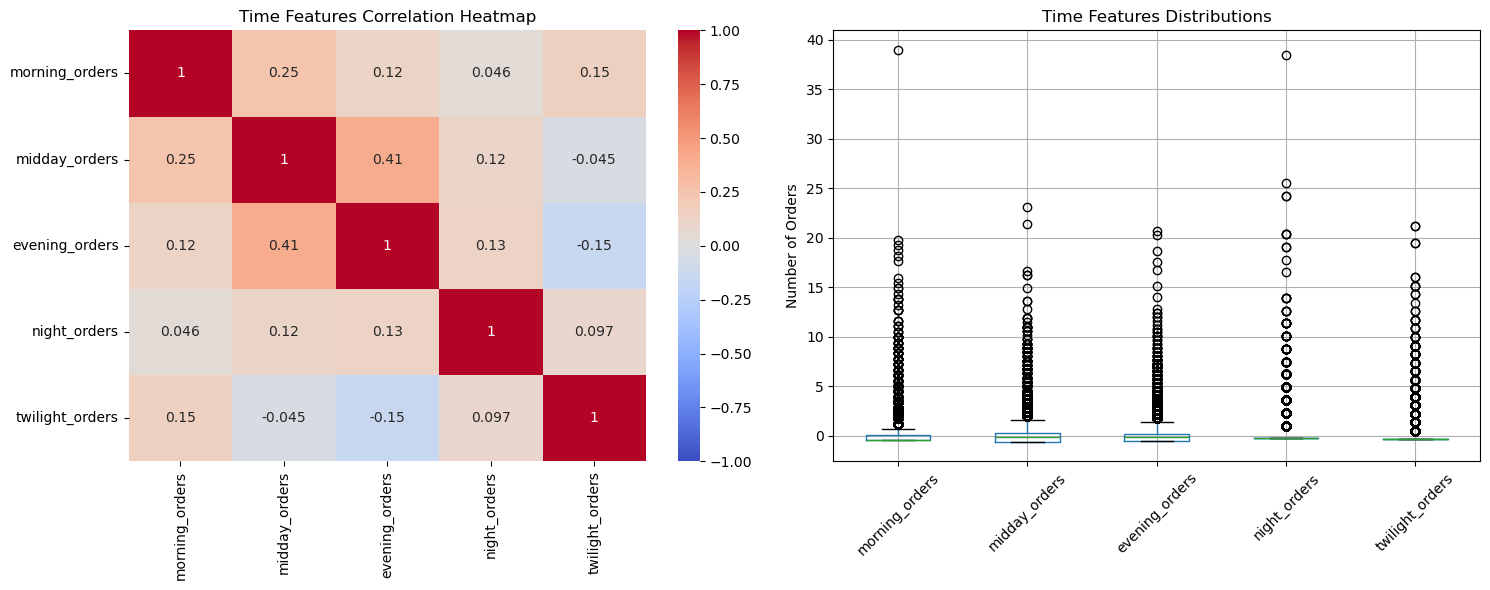

In [655]:
# Calculate correlation matrix for time features
correlation_matrix = time_of_order_features.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Create subplots for different visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Correlation Heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red color scheme
            vmin=-1, vmax=1,  # Set correlation range
            center=0,  # Center the colormap at 0
            ax=ax1)
ax1.set_title('Time Features Correlation Heatmap')

# 2. Distribution Plots
time_of_order_features.boxplot(ax=ax2)
ax2.set_title('Time Features Distributions')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

No Strong correlation found here 


# K-Means 

Create Inertia and Silhouette plots to find the optimal K.

In [656]:
#Check K between 1 and 10
range_clusters = range(1, 11)

# Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each 
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(time_of_order_features)
    inertia.append(kmclust.inertia_)  

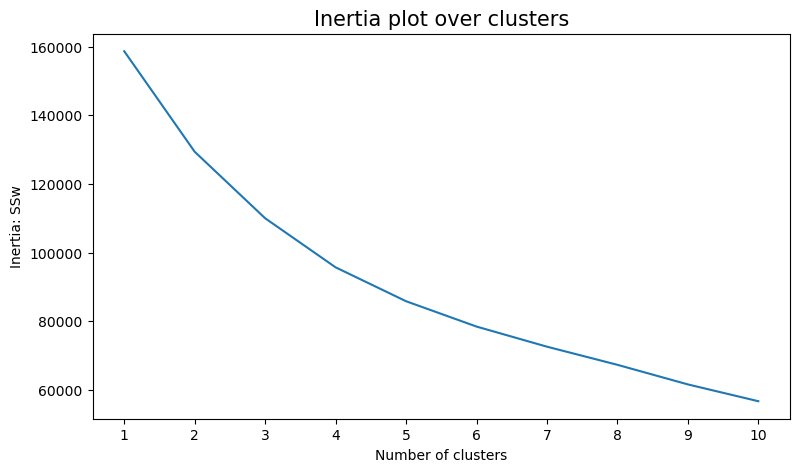

In [657]:
# Display the inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

The Inertia plot shows that the optimal number of clusters (elbow point) is somewhere between K=2 and K=4.

For n_clusters = 2, the average silhouette_score is : 0.6139707012687379
For n_clusters = 3, the average silhouette_score is : 0.4798580920972597
For n_clusters = 4, the average silhouette_score is : 0.5453450220504071
For n_clusters = 5, the average silhouette_score is : 0.491732361496769
For n_clusters = 6, the average silhouette_score is : 0.39977848020810364
For n_clusters = 7, the average silhouette_score is : 0.43261935137136825
For n_clusters = 8, the average silhouette_score is : 0.3913309269073887
For n_clusters = 9, the average silhouette_score is : 0.4077071448000825
For n_clusters = 10, the average silhouette_score is : 0.3472771278568211


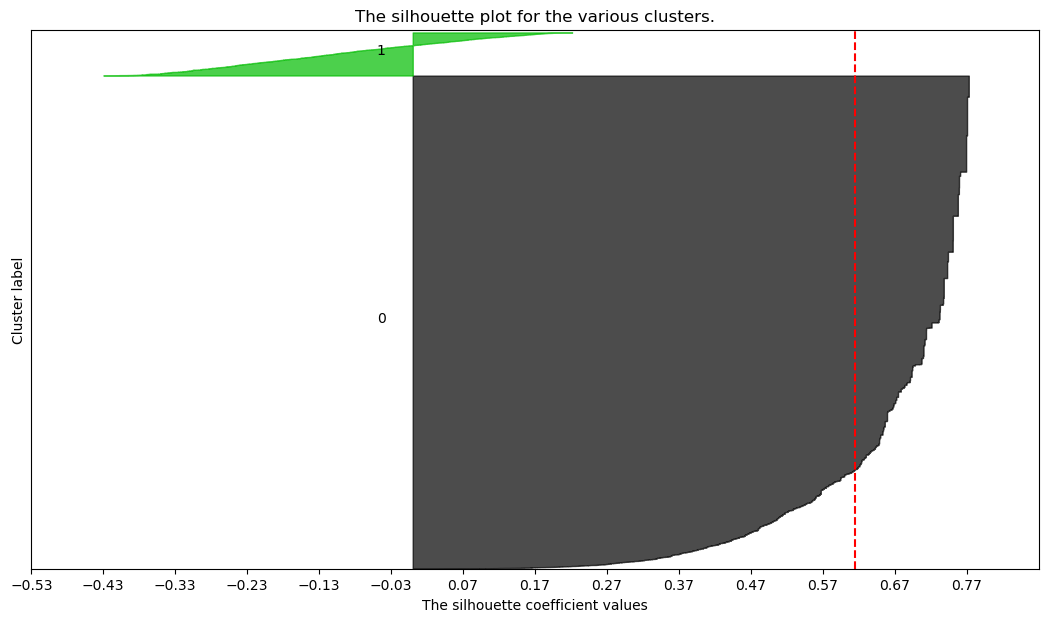

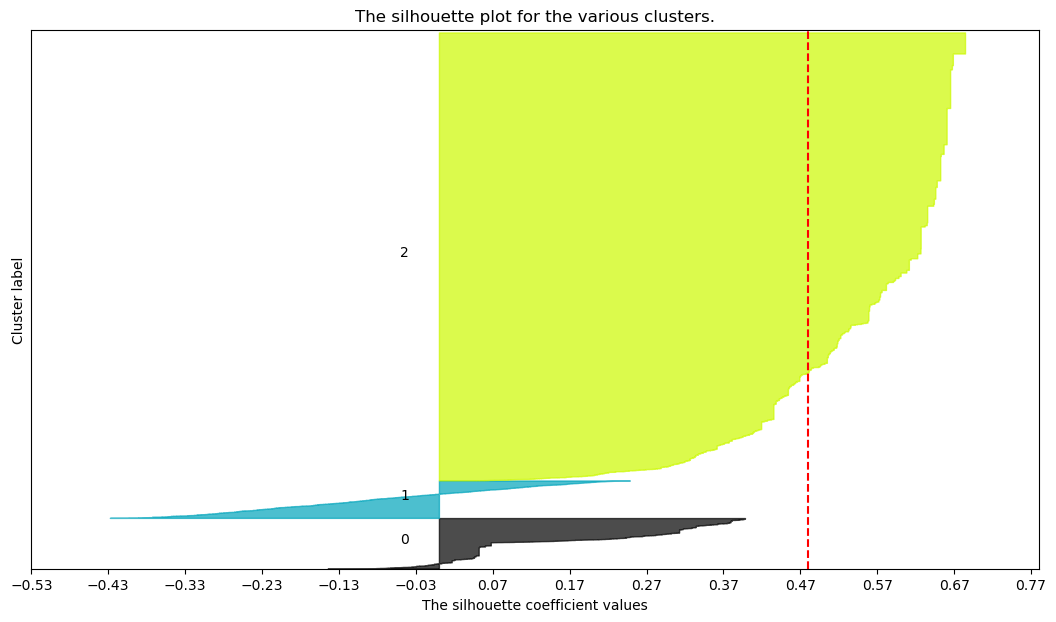

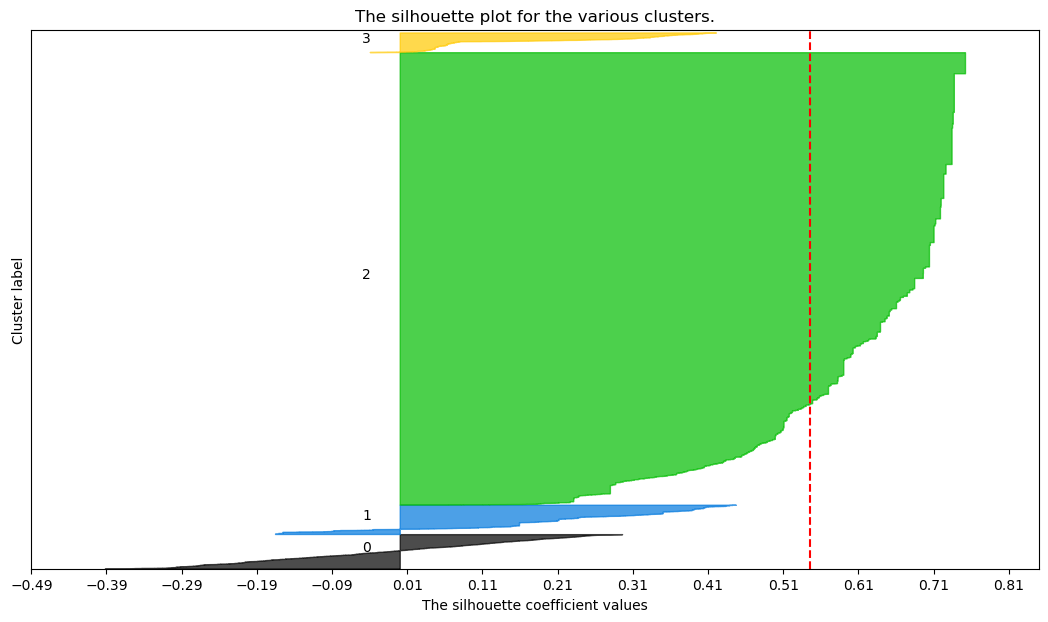

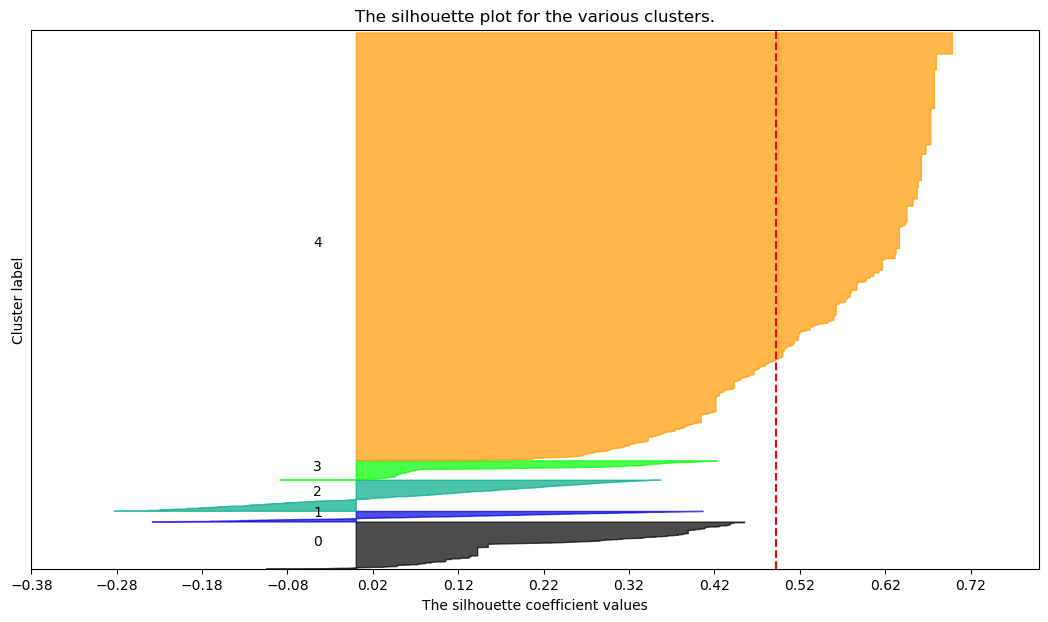

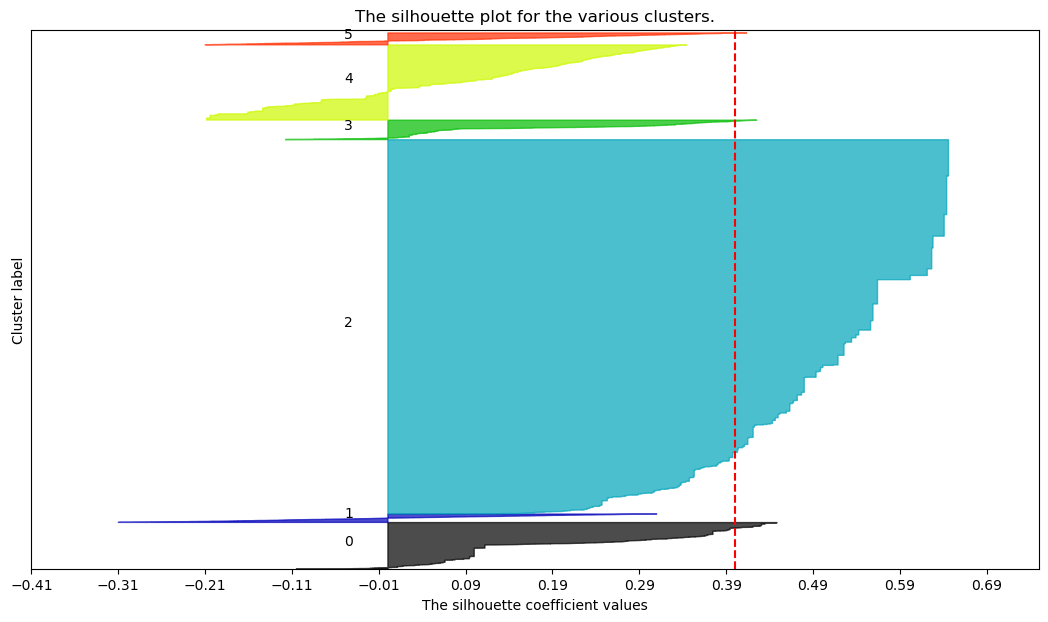

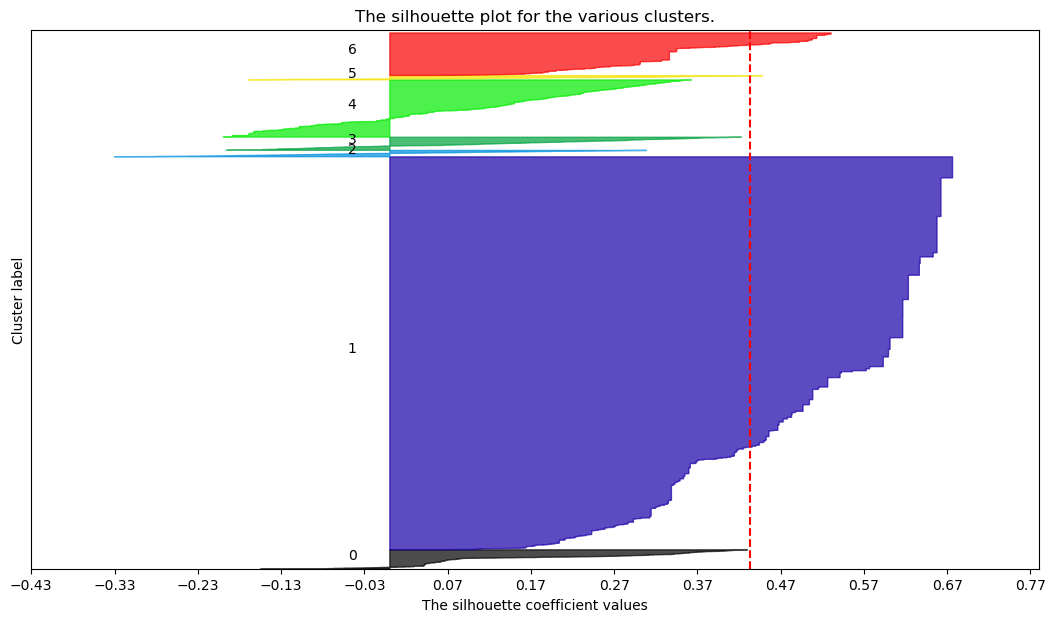

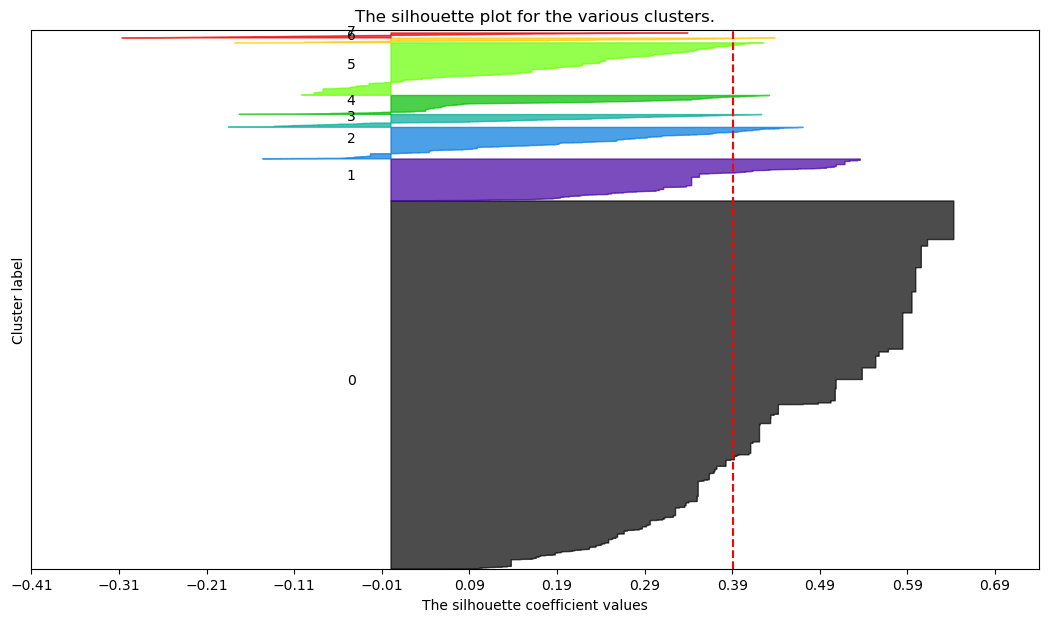

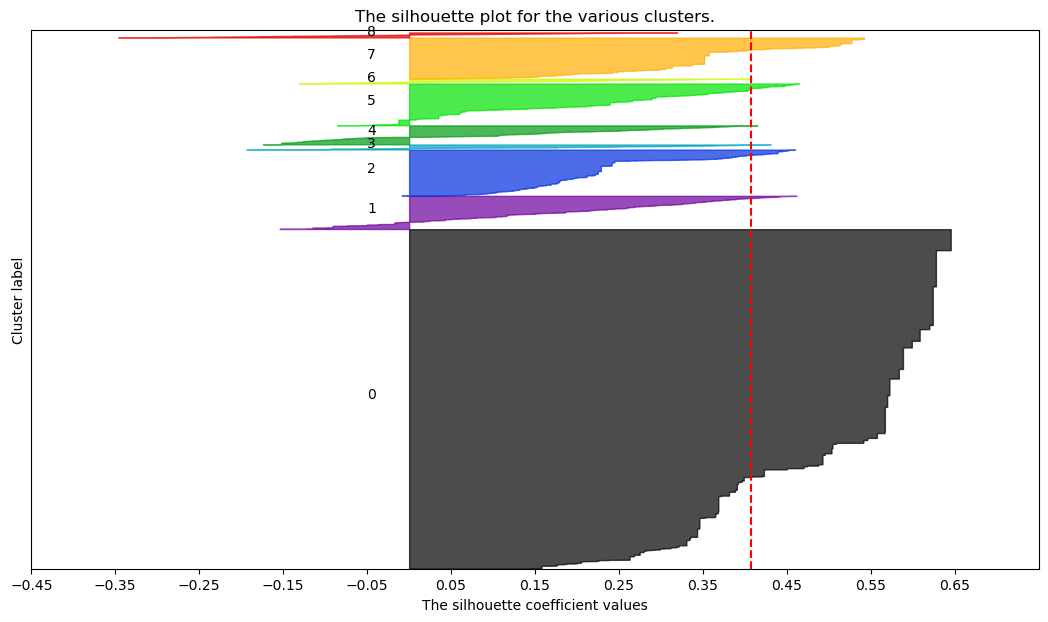

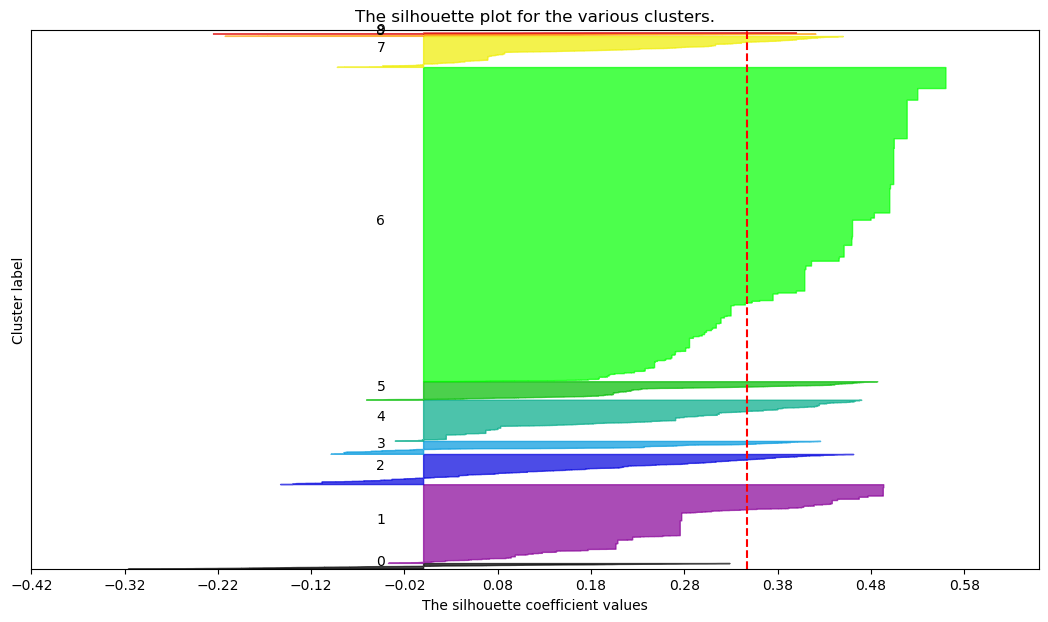

In [658]:
#Display the Silhouette plots for time of order features

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(time_of_order_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(time_of_order_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(time_of_order_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

The Silhouette plots show significantly more negative values starting at K=8. Based on Silhouette score, K=2 and K=4 are the best solutions (highest Silhouette scores).

Selecting K=4 Clusters
While k=2 shows the highest silhouette score (0.614), we chose k=4 clusters because:

- Elbow plot showed somewhere between K=2 and K=4
- It provides better business insights than 2 clusters (more granular customer segmentation)
- Has a strong silhouette score of 0.545, indicating good cluster separation
- Balances complexity (number of clusters) with cluster quality

In [659]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat.groupby('labels').mean()

morning_orders  midday_orders  evening_orders  night_orders  \
labels                                                                
0             1.301696       2.316109        2.219957      0.090616   
1             0.693304      -0.154906       -0.513519      0.003491   
2            -0.141505      -0.171163       -0.148221     -0.169152   
3            -0.054049       0.115199        0.289718      3.740848   

        twilight_orders  
labels                   
0             -0.272623  
1              3.110265  
2             -0.186247  
3              0.136044

we created two types of visualizations:
- first a boxplot to show how the data is distributed across different time periods for each cluster
- second, spider plots to visualize the characteristics of each cluster's ordering patterns. Spider plots were chosen because they're effective at showing multiple dimensions  

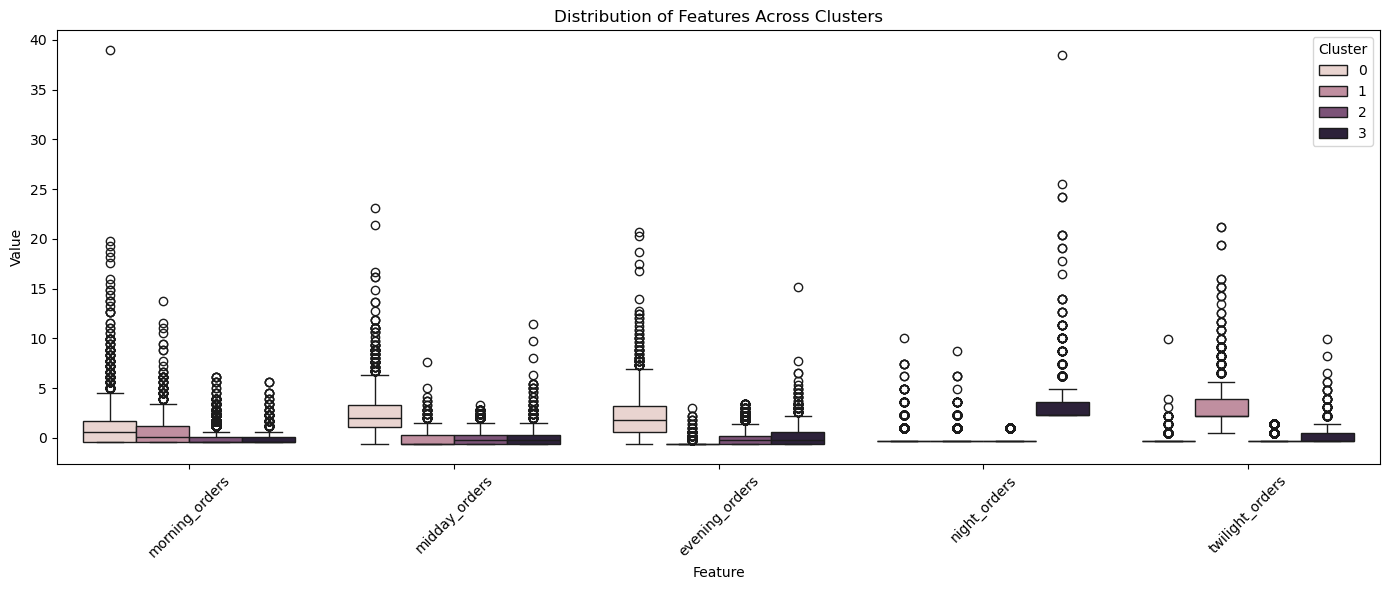

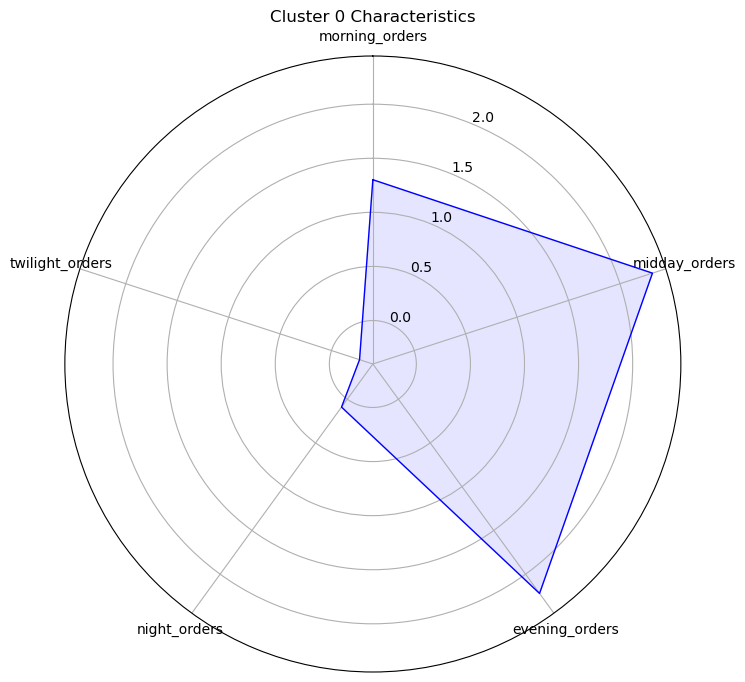

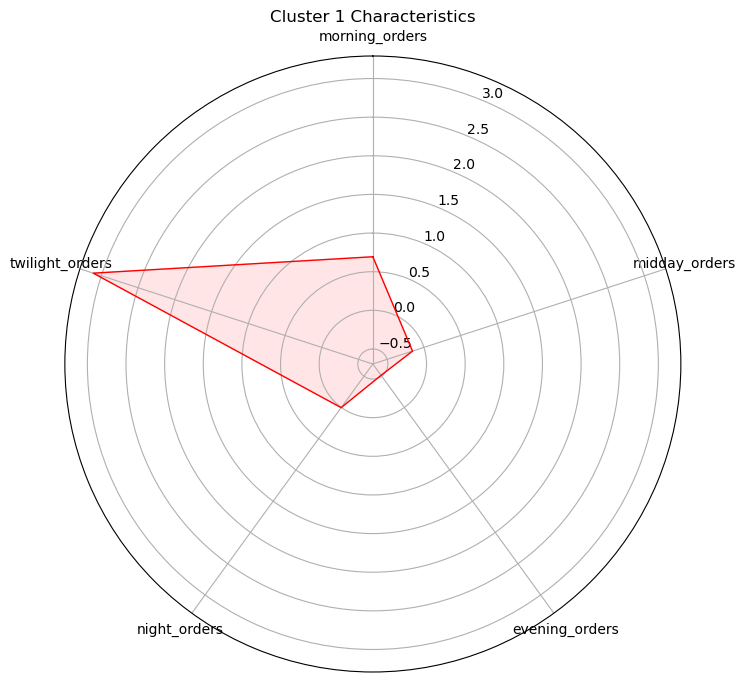

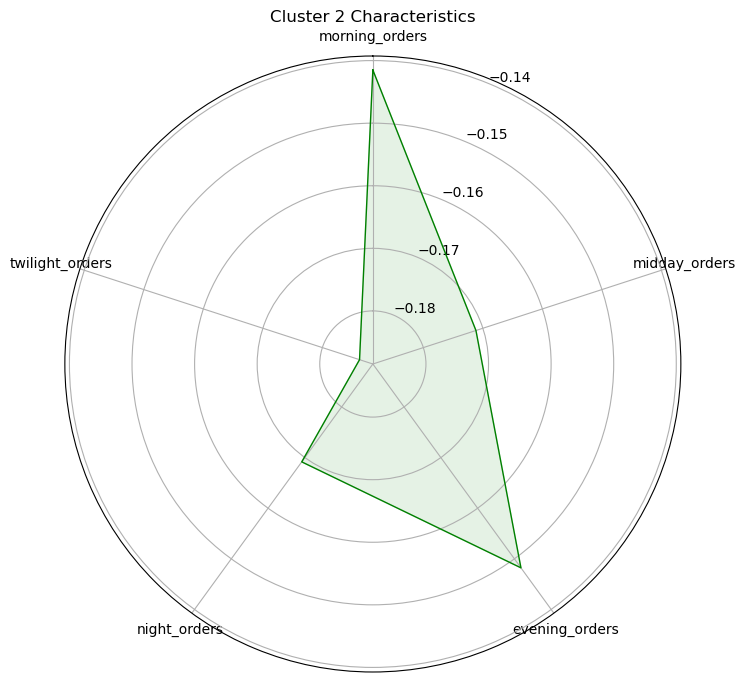

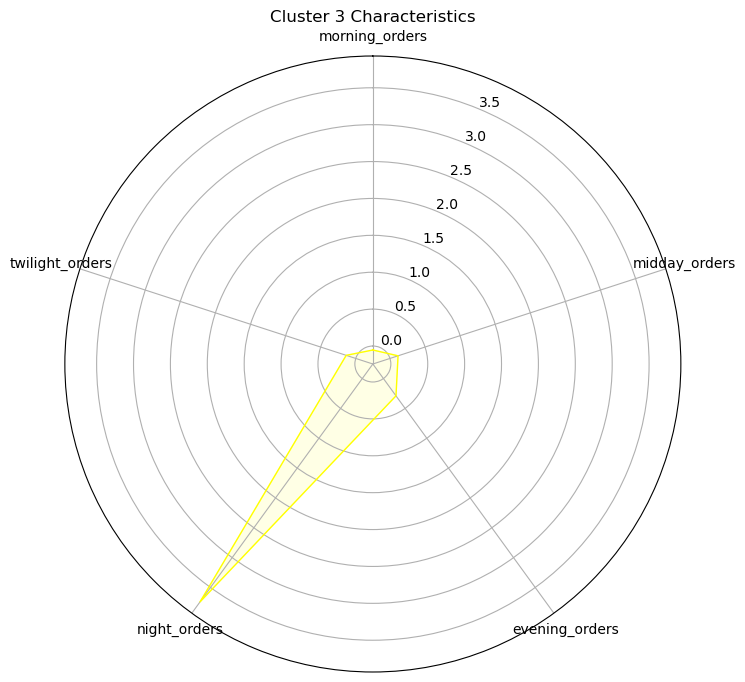

Cluster Centroids:
         morning_orders  midday_orders  evening_orders  night_orders  \
Cluster                                                                
0              1.301696       2.316109        2.219957      0.090616   
1              0.693304      -0.154906       -0.513519      0.003491   
2             -0.141505      -0.171163       -0.148221     -0.169152   
3             -0.054049       0.115199        0.289718      3.740848   

         twilight_orders  
Cluster                   
0              -0.272623  
1               3.110265  
2              -0.186247  
3               0.136044  


In [660]:


# Assuming df_scaled_new is your scaled dataframe
def perform_clustering_analysis(df_scaled_new):
    # Select time of order features
    time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'twilight_orders']]

    # Perform K-means clustering
    kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
    km_labels = kmclust.fit_predict(time_of_order_features)

    # Concatenate labels with features
    df_concat = pd.concat([time_of_order_features, pd.Series(km_labels, name='Cluster', index=time_of_order_features.index)], axis=1)



    plt.figure(figsize=(14, 6))
    df_melted = df_concat.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
    sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melted)
    plt.title('Distribution of Features Across Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



    def make_spider(df, row, title, color):
        categories = list(df.columns)
        N = len(categories)
        
        # Prepare values
        values = df.iloc[row].tolist()
        values += values[:1]
        
        # Calculate angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        # Create plot
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
        ax.plot(angles, values, color=color, linewidth=1)
        ax.fill(angles, values, color=color, alpha=0.1)
        
        # Fix axis to go in the right order and start at 12 o'clock
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        
        # Draw axis lines for each angle and label
        plt.xticks(angles[:-1], categories)
        
        plt.title(title)
        plt.show()

    # Prepare cluster means
    cluster_means = df_concat.groupby('Cluster').mean()

    # Create radar charts
    make_spider(cluster_means, 0, 'Cluster 0 Characteristics', 'blue')
    make_spider(cluster_means, 1, 'Cluster 1 Characteristics', 'red')
    make_spider(cluster_means, 2, 'Cluster 2 Characteristics', 'green')
    make_spider(cluster_means, 3, 'Cluster 3 Characteristics', 'yellow')

    # 5. Cluster Centroids Comparison
    print("Cluster Centroids:")
    print(cluster_means)

    return km_labels, cluster_means

# Call the function with your scaled dataframe
km_labels, cluster_means = perform_clustering_analysis(df_scaled_new)

The Traditional Hours Segment is defined by the following characteristics:
Cluster 0
-	Peak activity during conventional meal times
-	Strong presence during midday and evening hours
-	Demonstrates consistent ordering behaviour during standard business hours
-	Represents the core customer base with predictable ordering patterns

The Early Morning Segment is defined by the following characteristics:
Cluster 1
-	Significant activity during twilight hours
-	Below average engagement during conventional meal times
-	Shows clear preference for early morning ordering


Sporadic Users Segment
Cluster 2
- activity consistent across all time periods
- No strong temporal patterns expect of mornings and evenings 


Late Night Segment
Cluster 3
-   Dominant activity during night hours
- Secondary peak during evening times
- Clear preference for after-hours service
- Indicates strong demand for extended operating hours

<a href="#Index">Back to Index</a>

# t-SNE

We used t-sne to visulaize our 4 cluster into 2D Space.

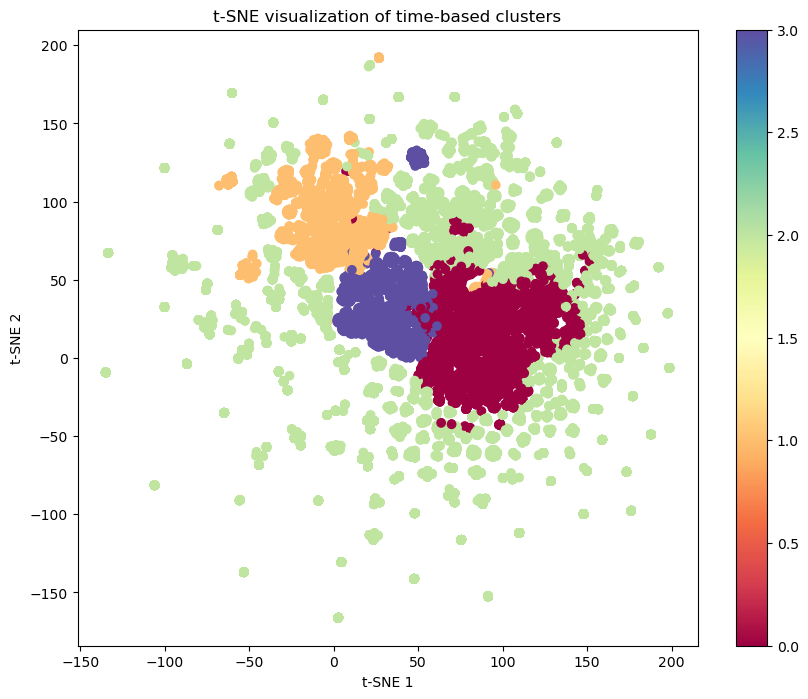

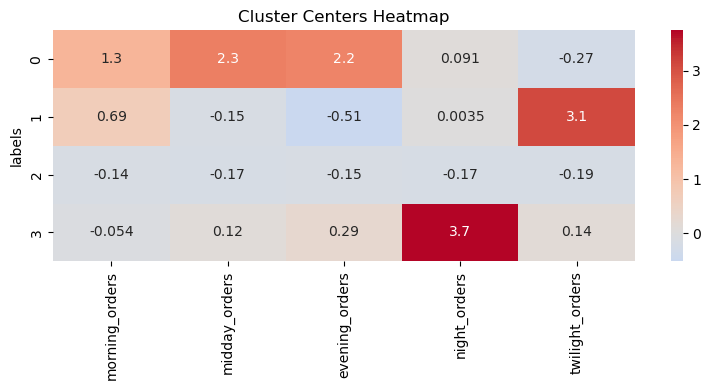

In [661]:


# Create t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(time_of_order_features)

# Create visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=km_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title('t-SNE visualization of time-based clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Add cluster center heatmap
centers_df = df_concat.groupby('labels').mean()
plt.figure(figsize=(8, 4))
sns.heatmap(centers_df, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Centers Heatmap')
plt.tight_layout()
plt.show()

- The red cluster appears to be highly concentrated, suggesting these customers have very similar ordering patterns
- The blue cluster shows moderate grouping with some spread
- The orange cluster has more dispersion, indicating more varied behavior within this group
- The light green cluster is the most scattered, suggesting these customers have the most diverse ordering patterns

we also created a heatmap of cluster centers to show the average characteristics of each group. This helps us understand what makes each cluster distinct and how they differ in their ordering behavior across different times of day.

# DBSCAN

we chose DBSCAN because it can find natural customer groupings without needing to specify how many groups we want, and it's great at identifying outliers.  customers who don't fit typical ordering patterns. Unlike K-means, DBSCAN can find clusters of any shape, which makes more sense for real customer behavior data.

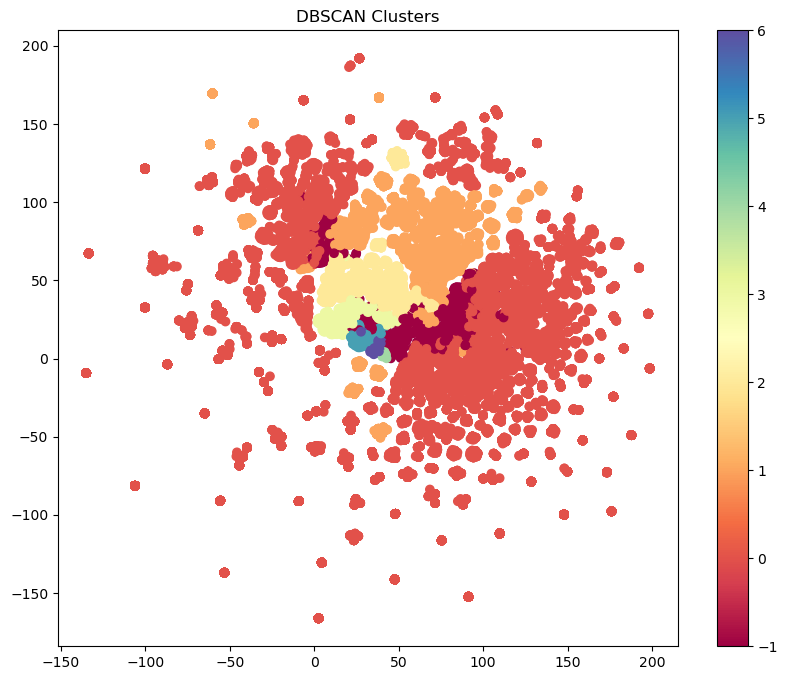

DBSCAN - Clusters: 7, Noise: 531


In [662]:


# Perform DBSCAN 
dbscan = DBSCAN(eps=1.2, min_samples=6)
dbscan_labels = dbscan.fit_predict(time_of_order_features)

# Visualize
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(time_of_order_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title('DBSCAN Clusters')
plt.show()

print(f'DBSCAN - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}, Noise: {list(dbscan_labels).count(-1)}')

- There's a lot of noise in our data (shown in red) - meaning many customers have unique ordering patterns that don't fit into clear groups
- We can see several distinct clusters (shown in orange, yellow, and blue) in the center, suggesting there are some clear, common ordering behavior patterns
- The concentrated clusters in the middle with scattered points around them suggest we have a core group of customers with predictable ordering patterns, surrounded by customers with more variable behaviors

<a href="#Index">Back to Index</a>

## SOM for time of order features <a class="anchor" id="SOM_time_order_features"></a>







**Some generally used functions:**

In [663]:
#With the treated data set please
df_for_som=df_treated[time_of_order_features.columns]
df_for_som.head()

morning_orders  midday_orders  evening_orders  night_orders  \
0               0              0               2             0   
1               1              1               0             0   
2               1              1               0             0   
3               0              2               0             0   
4               2              0               0             0   

   twilight_orders  
0                0  
1                0  
2                0  
3                0  
4                0

In [664]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Grays,    # colormap to use
                  annot=False       
                  ):

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='x-small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)




    return sf 

In [665]:
df_for_som.columns

Index(['morning_orders', 'midday_orders', 'evening_orders', 'night_orders',
       'twilight_orders'],
      dtype='object')

In [666]:
# M = 0
# N = 0
# neighborhood_function = None 
# topology = None 
# n_feats = len(metric_features)
# learning_rate = None

M = 15
N = 15
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(df_for_som.columns)
learning_rate = .7

som_data = time_of_order_features.values

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))


Before training:
QE 0.3791


/opt/anaconda3/lib/python3.12/site-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE 0.9818
After training:
QE 0.2587
TE 0.1427


In [667]:
# Get the weights from the trained SOM
weights = sm.get_weights()

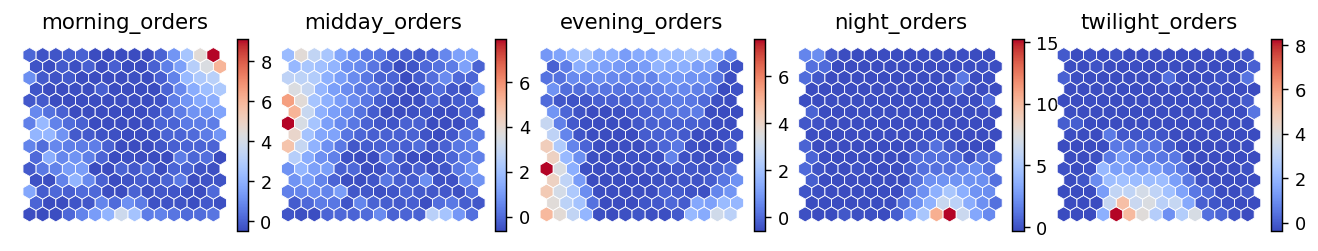

In [668]:
##############################
# Plot Component Planes
##############################
figsize=(10, 10)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(1,5,wspace=.05, hspace=.05)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(df_for_som)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=df_for_som.columns[cpi],
                    cmap=cm.coolwarm,
                    )

These Self-Organizing Maps (SOMs) show ordering patterns across different times of day in what appears to be a restaurant or food service setting.
Key patterns:
- Morning: Scattered hotspots, suggesting variable breakfast order patterns
- Midday: More concentrated hotspots, indicating consistent lunch rush patterns
- Evening: Distinct clusters, showing regular dinner service patterns
- Night: Mostly uniform with one strong outlier, suggesting late-night ordering follows predictable patterns
- Drinking: Very uniform with minimal variation, indicating consistent beverage ordering behavior

The color scales vary (0-15, 0-20, 0-8, etc.), showing different intensity ranges for each time period. The hexagonal grid pattern helps visualize clustering of similar orders.
The darker red spots represent order peaks or anomalies in the typical patterns, while the blue regions show baseline ordering behavior.

<a href="#Index">Back to Index</a>

# Cluster Characteristics

Cluster 0 (Day-Evening Active Customers):
- High positive values for morning (1.30), midday (2.32), and evening (2.22) orders
- These are customers who order consistently throughout the day and evening but avoid late-night ordering
- Represents balanced, regular customers who might be ordering for both personal and business purposes

Cluster 1 (Twilight (1am - 5am) Active Customers):
- Extremely high value for twilight hours (3.11)
- These customers show a distinctive pattern of ordering during very late hours
- Likely represents young professionals or students with non-traditional schedules who stay up late

Cluster 2 (Lower-Frequency Customers):
- All slightly negative values across different time periods
- Consistently lower engagement (-0.14 to -0.19 across all times)
- These customers order slightly less frequently than average across all time periods
- Could represent occasional users or price-sensitive customers
- Since they are not significantly lower for any time, it is likely that these are customers who simply do not frequently order at any particular time

Cluster 3 (Night-Time Active Customers):
- Extremely high value for night orders (3.74)
- These customers strongly prefer ordering during night hours
- Might represent late-night workers or entertainment venue orders

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.3.'></a>
># 2.2. Cuisine Preference Clustering 

This perspective includes all CUI (cuisine features) to identify trends in customer cuisine preference. Because there are 15 types of cuisines, principal component analysis (PCA) was performed prior to clustering to reduce the dimensionality while preserving as much information as possible.

In [669]:
df_scaled_new.head()

customer_age  vendor_count  product_count  is_chain  first_order  \
0     -1.338044     -0.402940      -0.099538 -0.459198    -1.181245   
1     -1.478899     -0.402940      -0.530395 -0.208168    -1.181245   
2      1.479045     -0.763931      -0.530395 -0.208168    -1.181245   
3     -0.492917     -0.402940      -0.386776 -0.459198    -1.181245   
4     -1.056335     -0.402940      -0.099538 -0.710229    -1.181245   

   last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0   -2.707106     -0.410078  -0.418056      -0.265138  -0.12277  ...   
1   -2.707106      0.630296  -0.162487      -0.265138  -0.12277  ...   
2   -2.707106      0.370202  -0.418056      -0.265138  -0.12277  ...   
3   -2.663969     -0.410078   0.135676      -0.265138  -0.12277  ...   
4   -2.663969      0.803692   1.285734      -0.265138  -0.12277  ...   

   weekend_orders  underweekend_orders  weekend_ratio  lunch_orders  \
0        0.413359            -0.827803       2.273273     -0.517547   
1        0.413359            -0.827803       2.273273      0.037177   
2        0.413359            -0.827803       2.273273      0.037177   
3       -0.149654            -0.562671       0.672111      0.037177   
4       -0.149654            -0.562671       0.672111     -0.517547   

   dinner_orders  morning_orders  midday_orders  evening_orders  night_orders  \
0       0.757104       -0.463208      -0.615700        0.204674     -0.276604   
1      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
2      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
3      -0.434062       -0.463208       0.246671       -0.582069     -0.276604   
4      -0.434062        0.632602      -0.615700       -0.582069     -0.276604   

   twilight_orders  
0        -0.362107  
1        -0.362107  
2        -0.362107  
3        -0.362107  
4        -0.362107  

[5 rows x 34 columns]

In [670]:
#Select only CUI features
cui_features = df_scaled_new[[col for col in df_scaled_new.columns if 'CUI_' in col]]

# Clean column names
cui_features.columns = cui_features.columns.str.strip()

In [671]:
cui_features.columns

Index(['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'],
      dtype='object')

# Check correlation between dishes

<Figure size 1200x800 with 0 Axes>

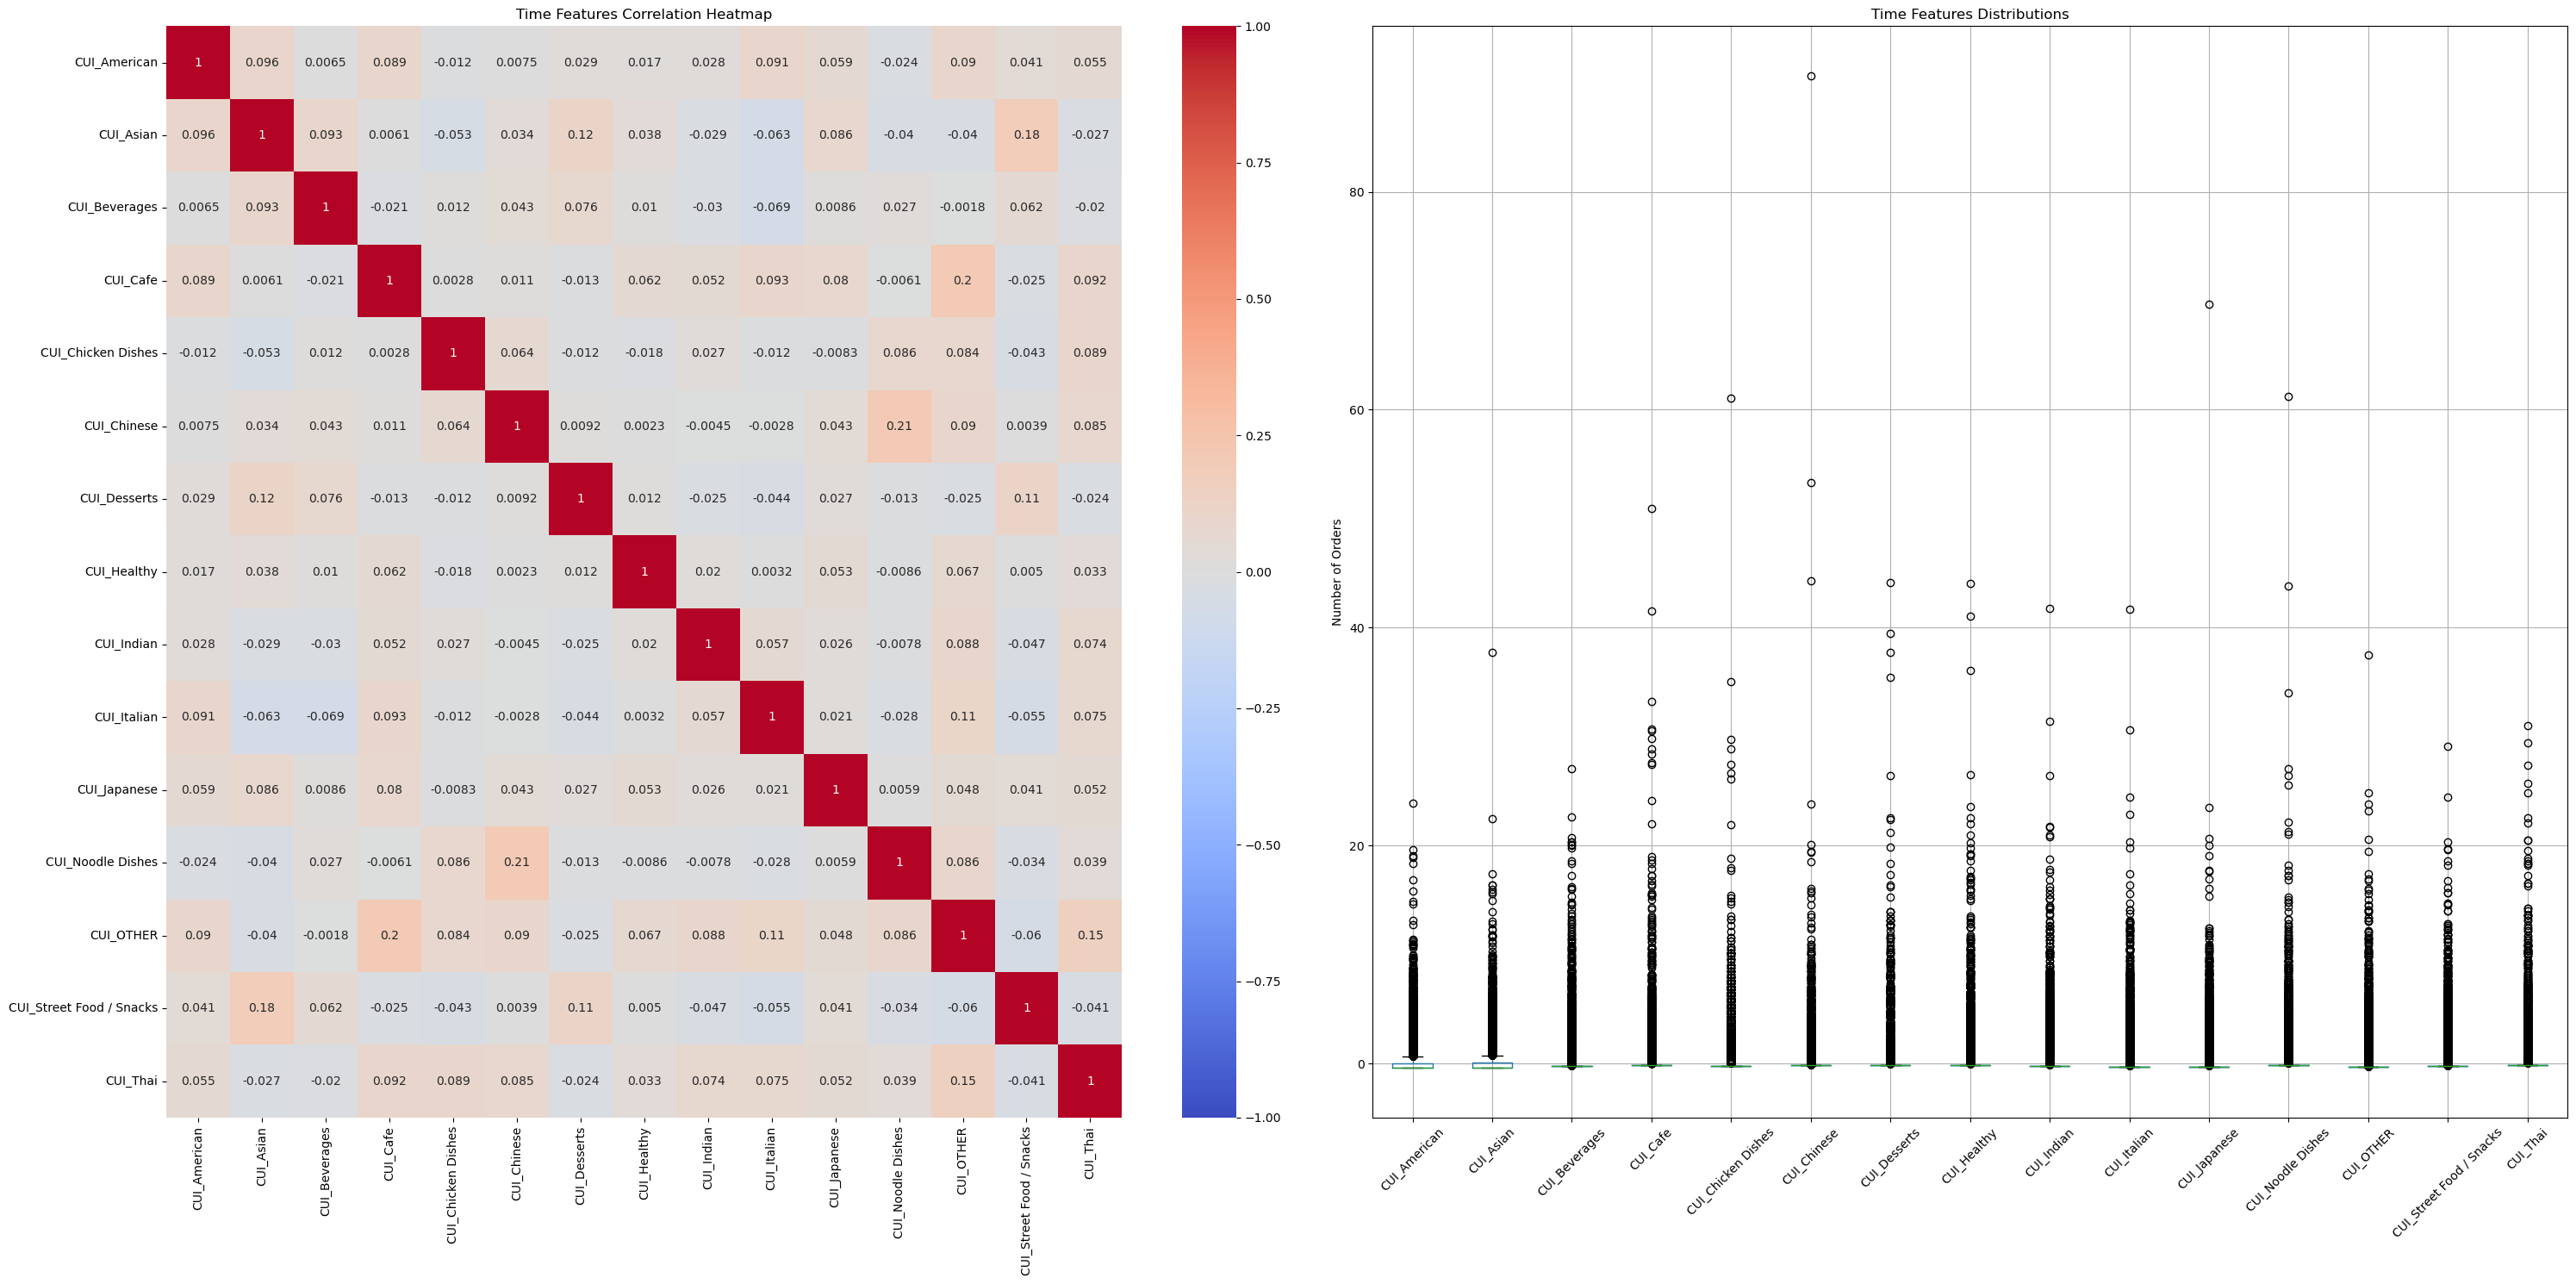

In [672]:
# Calculate correlation matrix for time features
correlation_matrix = cui_features.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Create subplots for different visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

# 1. Correlation Heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red color scheme
            vmin=-1, vmax=1,  # Set correlation range
            center=0,  # Center the colormap at 0
            ax=ax1)
ax1.set_title('Time Features Correlation Heatmap')

# 2. Distribution Plots
cui_features.boxplot(ax=ax2)
ax2.set_title('Time Features Distributions')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

According to the Spearman Correlation matrix (above), none of the cuisines are highly correlated with each other.

# Apply Principal Component Analysis (PCA) to reduce dimensionality of the data

In [673]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(cui_features)
pca_feat  

array([[ 0.46665169, -0.89546983, -0.57945073, ..., -0.00237312,
        -0.22992168,  0.392359  ],
       [-0.31839799, -0.3168384 , -0.28110725, ..., -0.10776101,
        -0.14908952,  0.10633307],
       [-0.32038875, -0.5347762 , -0.21150035, ..., -0.19916236,
        -0.22721094,  0.11368767],
       ...,
       [-0.96323834,  0.39971439,  0.16606495, ..., -0.03807676,
        -0.18042291,  0.08832274],
       [-0.54700073, -0.50903533, -0.03700112, ...,  0.29558785,
         0.13075023, -0.03439813],
       [-0.2715497 , -0.8147268 , -0.21608266, ...,  0.08281477,
        -0.00921489,  0.0747475 ]])

In [674]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

Eigenvalue  Difference  Proportion  Cumulative
1     1.601085    0.000000    0.106736    0.106736
2     1.412022   -0.189064    0.094132    0.200867
3     1.287817   -0.124204    0.085852    0.286719
4     1.014040   -0.273777    0.067601    0.354320
5     0.999167   -0.014873    0.066609    0.420929
6     0.965874   -0.033293    0.064390    0.485318
7     0.936767   -0.029107    0.062449    0.547768
8     0.920524   -0.016242    0.061366    0.609134
9     0.909290   -0.011235    0.060617    0.669751
10    0.893602   -0.015688    0.059572    0.729323
11    0.881275   -0.012327    0.058750    0.788073
12    0.858517   -0.022758    0.057233    0.845305
13    0.801868   -0.056649    0.053456    0.898762
14    0.762643   -0.039226    0.050841    0.949603
15    0.755981   -0.006662    0.050397    1.000000

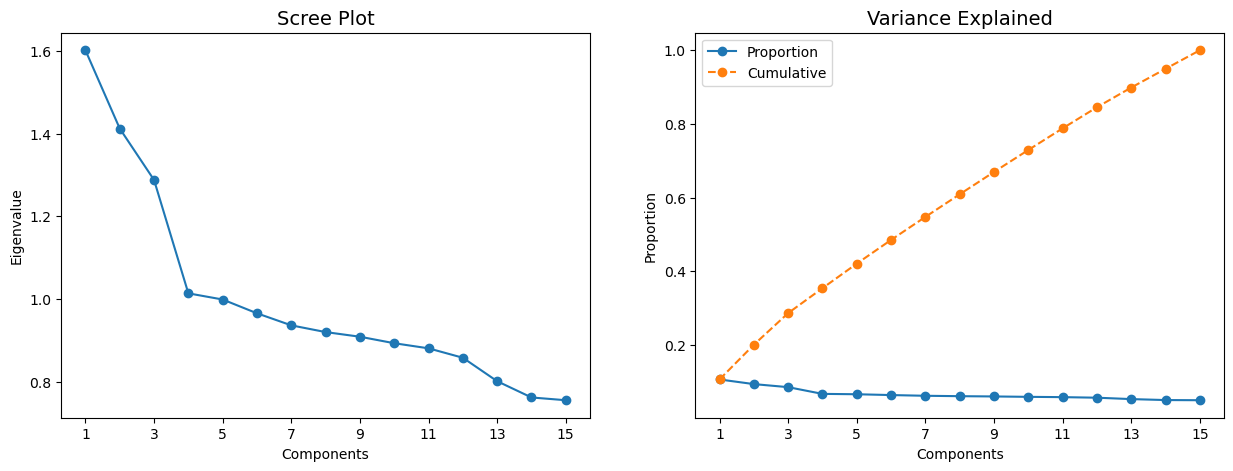

In [675]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots

ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
         marker=".", markersize=12)

ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, label="Proportion")

ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

The Scree Plot tells us we should likely have 4 components based on the elbow point. The Variance Explained indicates that 4 components would only explain 40% of the variance in the data. 11 components would be required to explain 80% of the variance.

# We should do all of this again with n_components=11

In [676]:
# Perform PCA again with 4 principal components (based on Scree Plot)
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(cui_features)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=cui_features.index, columns=pca_feat_names)  
pca_df

PC0       PC1       PC2       PC3
0      0.467453 -0.911151 -0.521508 -0.170485
1     -0.317826 -0.326296 -0.248781 -0.281825
2     -0.319940 -0.542578 -0.181759 -0.161088
3      0.007811 -0.563325 -0.350178 -0.040227
4     -0.537356  0.502350 -0.354942 -0.385830
...         ...       ...       ...       ...
31732 -0.693380 -0.176942  0.507516  0.015019
31733 -0.181036 -0.304404 -0.345937 -0.509192
31734 -0.963901  0.410336  0.123518 -0.363603
31735 -0.547220 -0.506970 -0.042173  0.177611
31736 -0.272191 -0.807854 -0.246832  0.076795

[31737 rows x 4 columns]

<a href="#Index">Back to Index</a>

# Apply K-Means on the principal components

In [677]:
#Check K between 1 and 10
range_clusters = range(1, 11)

# Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(pca_df)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

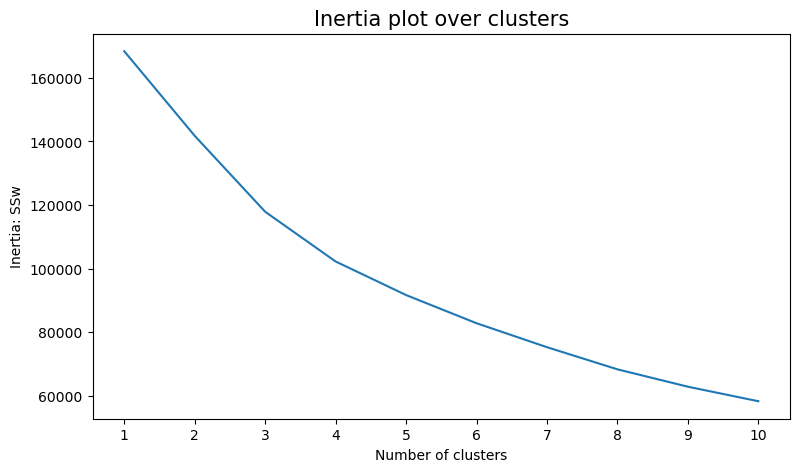

In [678]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

The Inertia Plot does not show a distinct elbow point. The curve is very smooth. However, the optimal K seems to be between K=3 and K=5.

For n_clusters = 2, the average silhouette_score is : 0.6729988327924542
For n_clusters = 3, the average silhouette_score is : 0.5660531726760584
For n_clusters = 4, the average silhouette_score is : 0.5788011264923055
For n_clusters = 5, the average silhouette_score is : 0.5841844583081419
For n_clusters = 6, the average silhouette_score is : 0.462921075917879
For n_clusters = 7, the average silhouette_score is : 0.410144946721572
For n_clusters = 8, the average silhouette_score is : 0.414862475112751
For n_clusters = 9, the average silhouette_score is : 0.41934071677273455
For n_clusters = 10, the average silhouette_score is : 0.4214503643261053


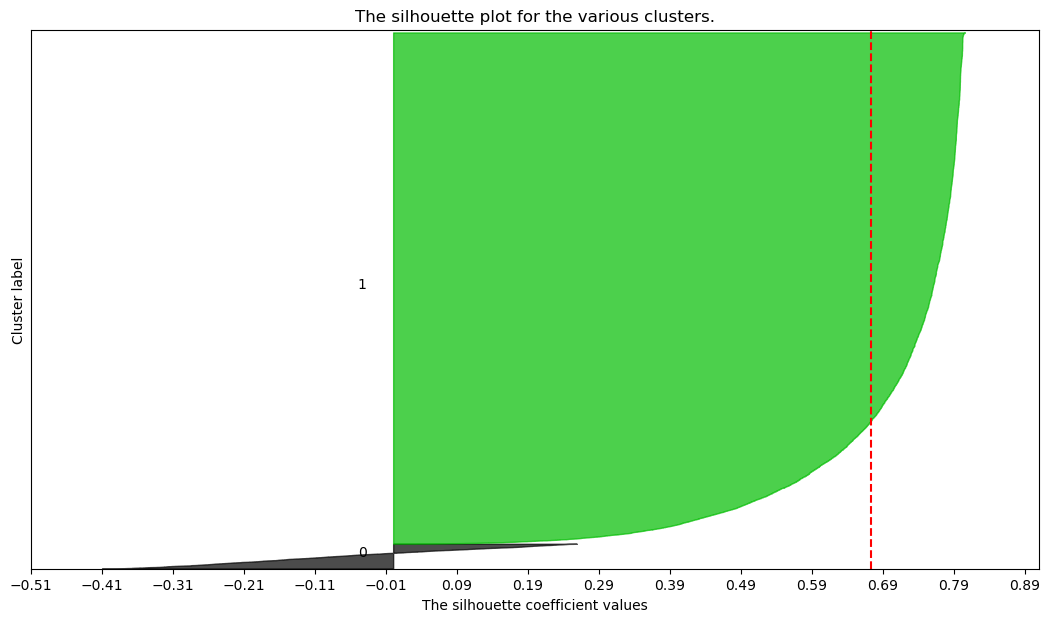

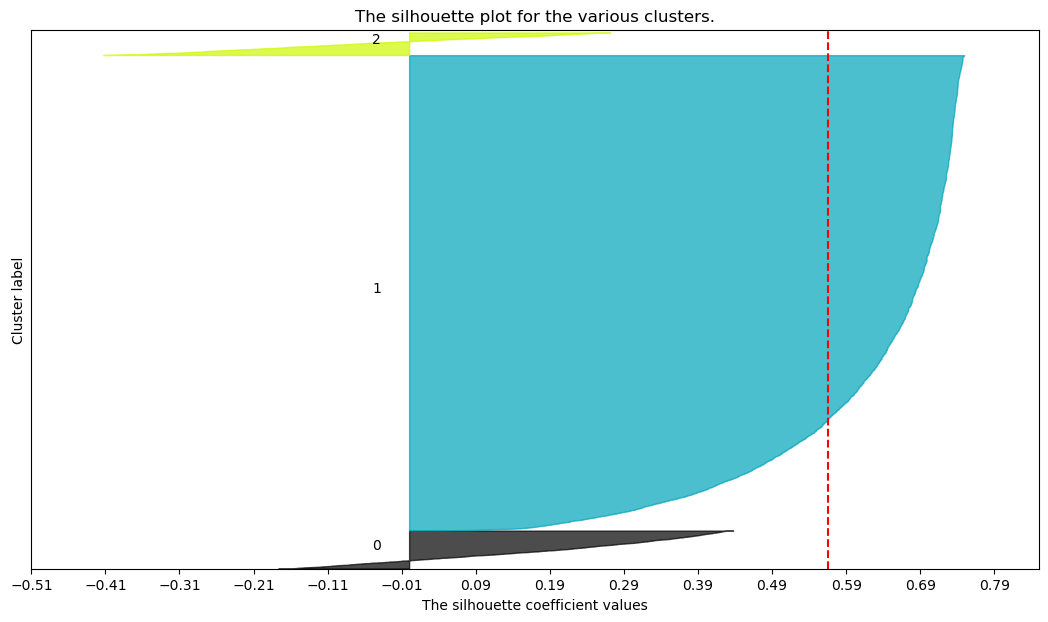

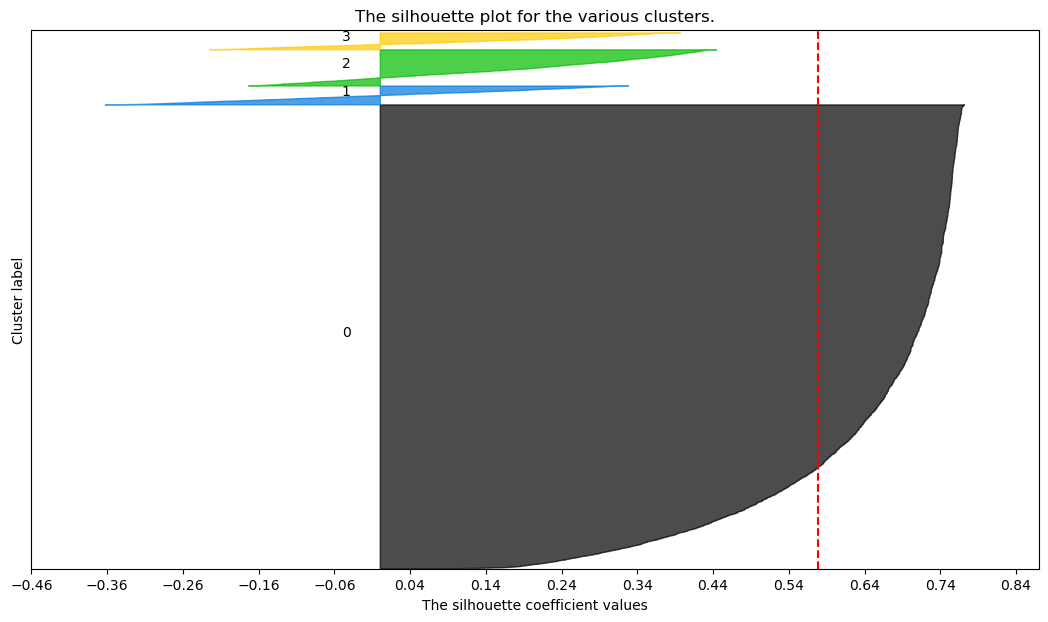

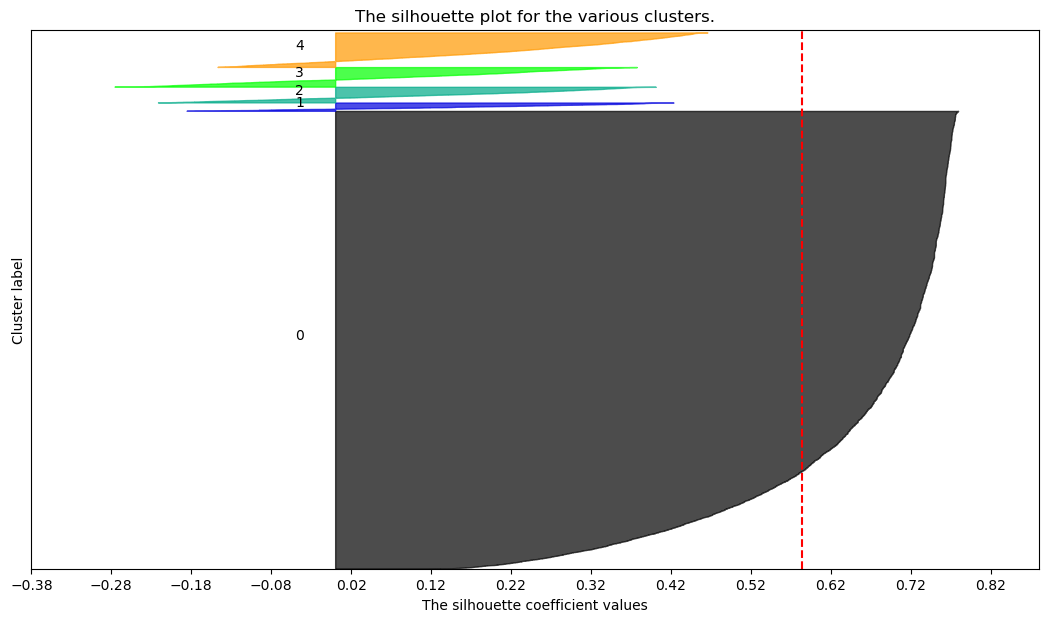

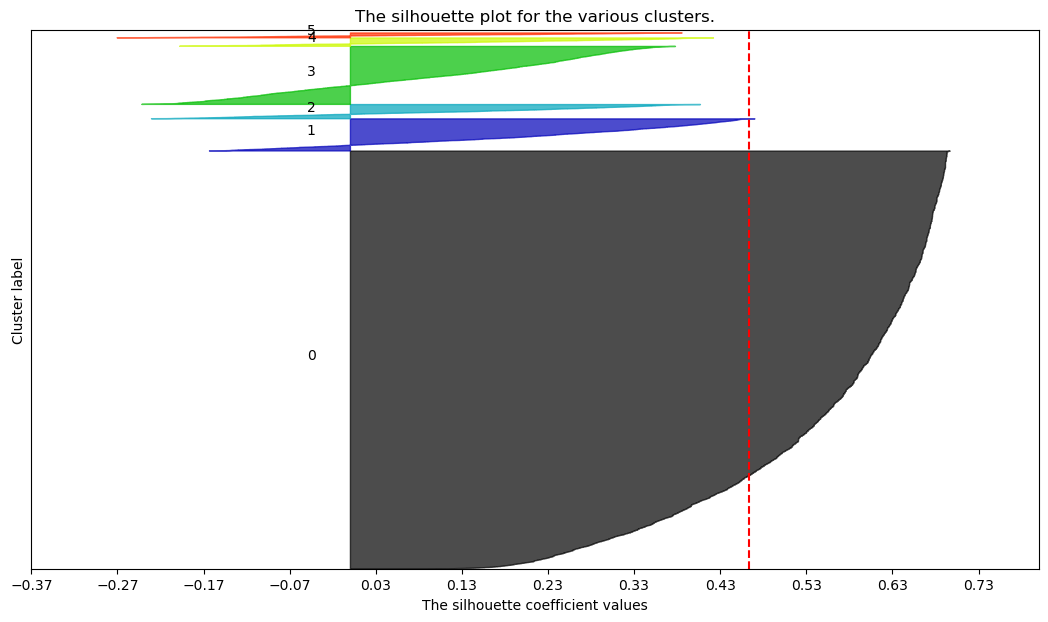

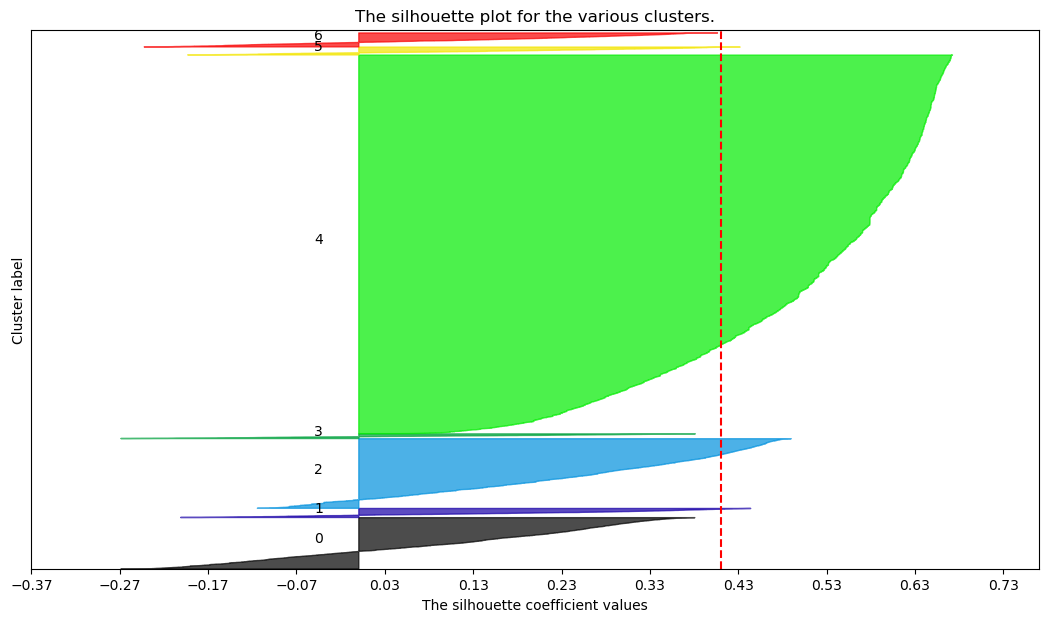

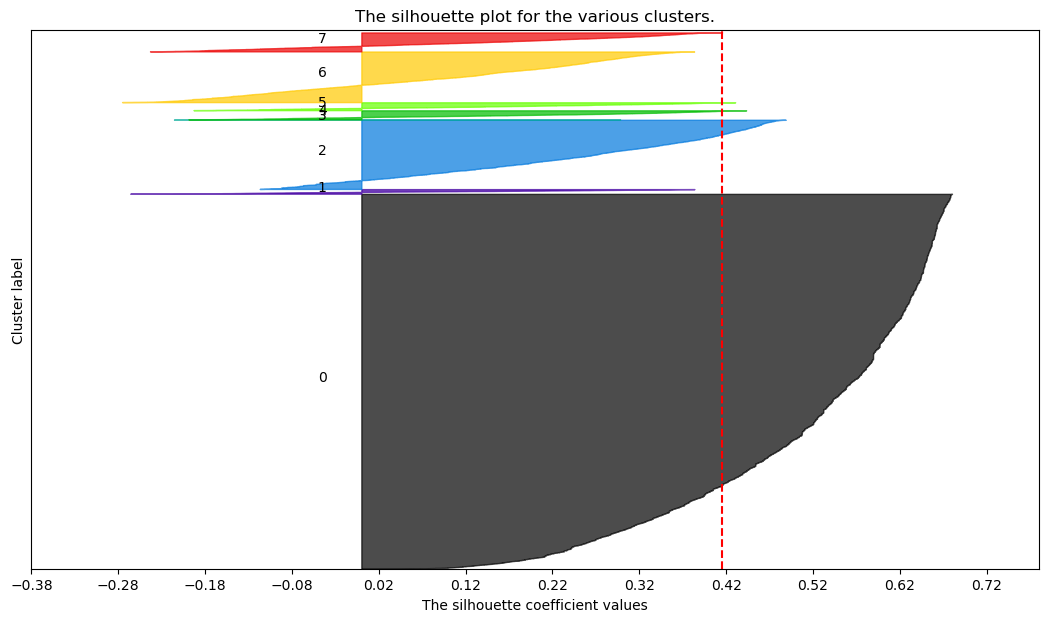

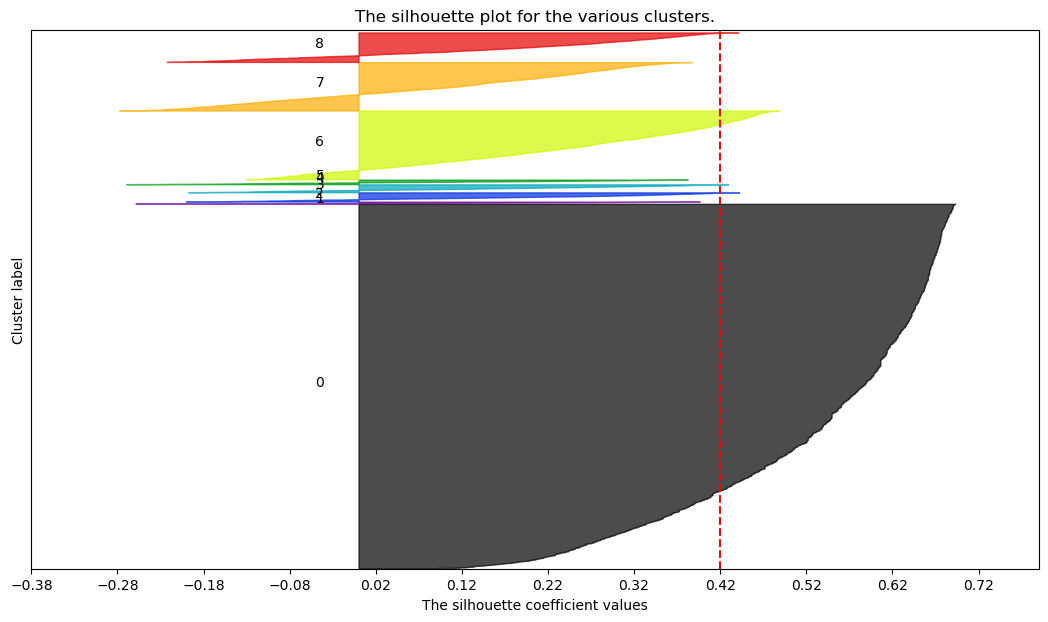

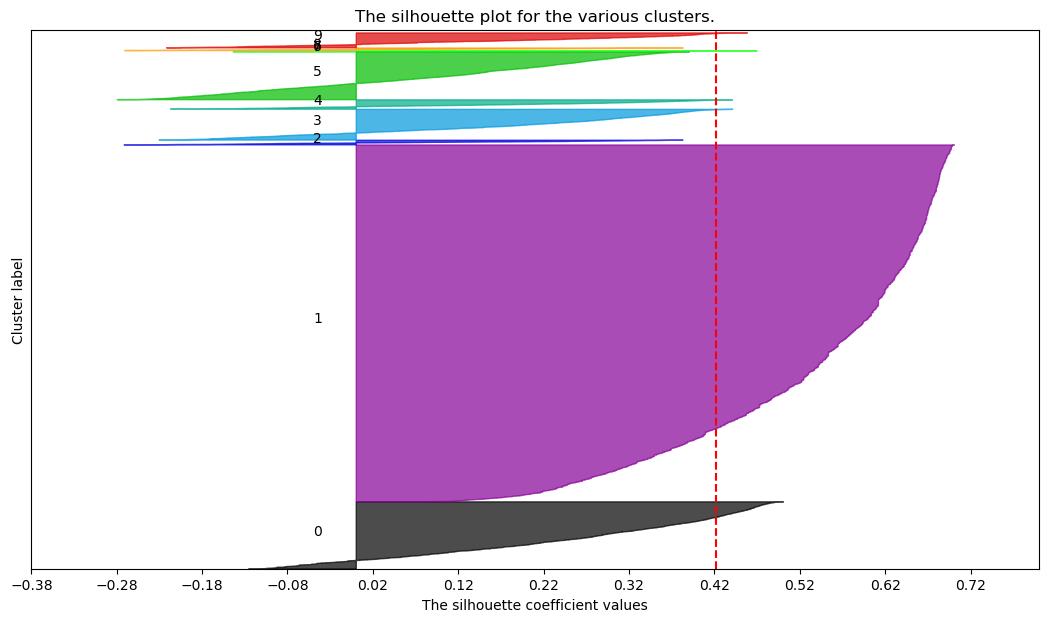

In [679]:
#Display the Silhouette plots PCA (4 components) for cusine features

# Storing average silhouette metric for cuisine features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(pca_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

The Silhouette plots begin to show significantly more negative values at K=6. The scores mirror this. 
- K=2 is the highest (0.67) 
- K=3 (0.57), K=4 (0.57), and K=5 (0.54) are similar
- Drop off beyond K=5

K=4 was chosen because it was in the middle of the acceptable inertia plot range (from K=3 to K=5) and had a strong silhouette score.

In [680]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(pca_df)
km_labels = kmclust.fit_predict(pca_df)

# Characterizing the final clusters
df_concat = pd.concat((pca_df, pd.Series(km_labels, name='labels', index=pca_df.index)), axis=1)
df_concat.groupby('labels').mean()

PC0       PC1       PC2       PC3
labels                                        
0      -0.127390 -0.284852 -0.058146  0.056477
1       4.013604  1.322731 -1.904068 -0.003287
2      -1.349292  2.903916  0.063067 -0.545280
3       1.968154  0.160740  3.602507 -0.386654

Check correlations of principal components with the original features to understand what the principal components represent.

In [681]:
# Project the data onto the PCs
X_pca = pca.transform(cui_features)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(pca.n_components_)])

# Correlate original features with principal components
correlations = pd.DataFrame(
    np.dot(cui_features.T, X_pca_df) / (cui_features.shape[0] - 1),
    index=cui_features.columns,
    columns=[f'PC{i}' for i in range(pca.n_components_)]
)

print("Feature-PC Correlations:")
print(correlations)


Feature-PC Correlations:
                               PC0       PC1       PC2       PC3
CUI_American              0.284281  0.438921 -0.297237 -0.433593
CUI_Asian                -0.276484  0.752507 -0.049330 -0.025774
CUI_Beverages            -0.174949  0.397187  0.313903 -0.080577
CUI_Cafe                  0.594168  0.250137 -0.301439  0.103275
CUI_Chicken Dishes        0.335236 -0.095838  0.436032 -0.307059
CUI_Chinese               0.344006  0.246037  0.632961  0.070634
CUI_Desserts             -0.246858  0.511467  0.063188 -0.174091
CUI_Healthy               0.185122  0.250771 -0.120942  0.704145
CUI_Indian                0.389990 -0.046059 -0.178317 -0.089985
CUI_Italian               0.477430 -0.071739 -0.432850 -0.198369
CUI_Japanese              0.220154  0.457481 -0.111235  0.336164
CUI_Noodle Dishes         0.313996  0.016759  0.727577  0.062679
CUI_OTHER                 0.796148  0.163724  0.037366 -0.047736
CUI_Street Food / Snacks -0.374048  0.602485 -0.014141 -0.129304


find out which cluster likes which cusines in a visual


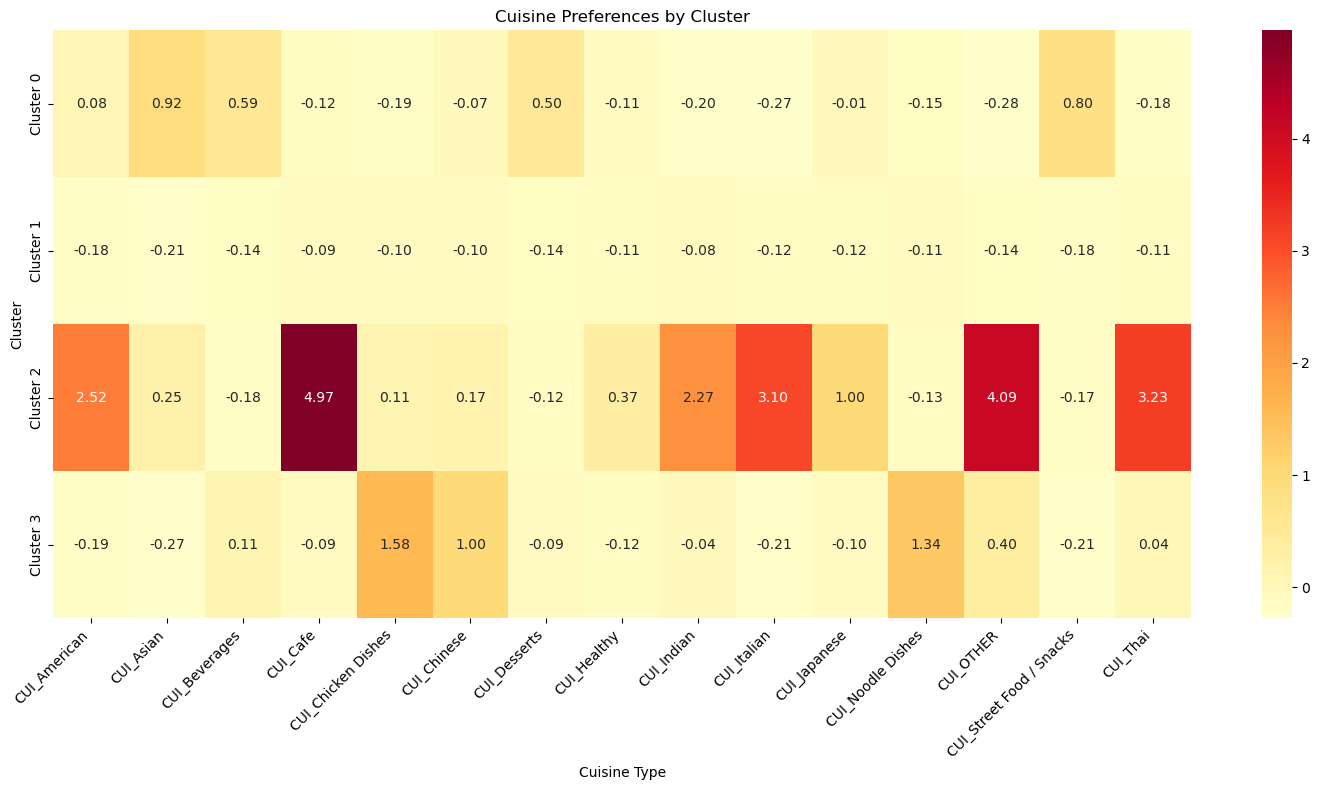


Top 3 cuisines per cluster:

Cluster 0 (3990 customers):
CUI_Asian                   0.924116
CUI_Street Food / Snacks    0.795707
CUI_Beverages               0.589050

Cluster 1 (21174 customers):
CUI_Indian    -0.079269
CUI_Cafe      -0.093118
CUI_Chinese   -0.100229

Cluster 2 (274 customers):
CUI_Cafe     4.967126
CUI_OTHER    4.094476
CUI_Thai     3.226272

Cluster 3 (1823 customers):
CUI_Chicken Dishes    1.575194
CUI_Noodle Dishes     1.342002
CUI_Chinese           0.996698


In [682]:
# Create a cluster profile showing mean values for each cuisine type
cluster_profiles = pd.DataFrame()

# Calculate mean values for each cluster
for i in range(4):
    cluster_mask = cluster_labels == i
    cluster_mean = cui_features[cluster_mask].mean()
    cluster_profiles[f'Cluster {i}'] = cluster_mean

# Transpose for better visualization
cluster_profiles = cluster_profiles.T

# Create heatmap of cluster profiles
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_profiles, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Cuisine Preferences by Cluster')
plt.ylabel('Cluster')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# For each cluster, show top 3 cuisines
print("\nTop 3 cuisines per cluster:")
for i in range(4):
    print(f"\nCluster {i} ({sum(cluster_labels == i)} customers):")
    top_cuisines = cluster_profiles.iloc[i].sort_values(ascending=False).head(3)
    print(top_cuisines.to_string())

<a href="#Index">Back to Index</a>

Cluster 0 size: 2056
Cluster 1 size: 27836
Cluster 2 size: 471
Cluster 3 size: 1374


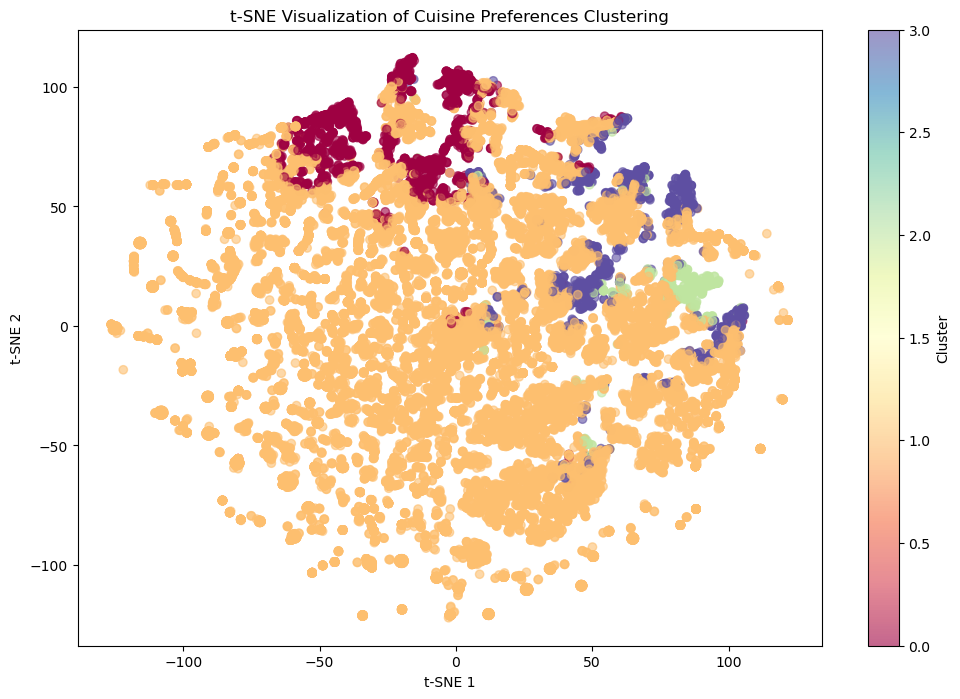

In [683]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cui_features)

# 3. Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(cui_features)

# 4. Create visualization
plt.figure(figsize=(12, 8))

# Scatter plot with cluster colors
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                     c=cluster_labels, 
                     cmap='Spectral',
                     alpha=0.6)

# Add labels and title
plt.title('t-SNE Visualization of Cuisine Preferences Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Add colorbar
plt.colorbar(scatter, label='Cluster')

# Show cluster sizes
for i in range(n_clusters):
    print(f'Cluster {i} size: {sum(cluster_labels == i)}')

plt.show()

analysis from claude


# Cluster Analysis of Cuisine Preferences

## Cluster 0 (2,056 customers) - "Asian Fusion & Snack Lovers"
* Highest preferences:
  - Street Food/Snacks (2.05)
  - Asian (1.87)
  - Desserts (1.35)
* Clear focus on casual dining and Asian cuisine

## Cluster 1 (27,836 customers) - "Balanced/Average Consumers"
* Slightly negative values across all cuisines (-0.14 to 0.01)
* No strong preferences
* Represents the typical/average customer
* Largest segment by far

## Cluster 2 (471 customers) - "Thai Food Enthusiasts"
* Dramatically high preference for Thai food (6.27)
* Secondary preferences:
  - OTHER (0.69)
  - Indian (0.48)
  - Japanese (0.44)
* Very specific niche segment

## Cluster 3 (1,374 customers) - "Italian " 
* Strong preferences for:
  - Italian (2.17)
  - OTHER (2.07)
  - Cafe (1.47)
  - Indian (1.40)
* Suggests a group that enjoys diverse





# SOM for CUI <a class="anchor" id="som_cui"></a>
[Back to ToC](#toc)<br>

Create df for som with treated data 

In [684]:
#Select only CUI features for som
cui_features_som = df_treated[[col for col in df_treated.columns if 'CUI_' in col]]

# Clean column names
cui_features_som.columns = cui_features_som.columns.str.strip()


cui_features_som.columns

Index(['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'],
      dtype='object')

Before training:
QE 27.0925
TE 0.9855
After training:
QE 7.5298
TE 0.3249


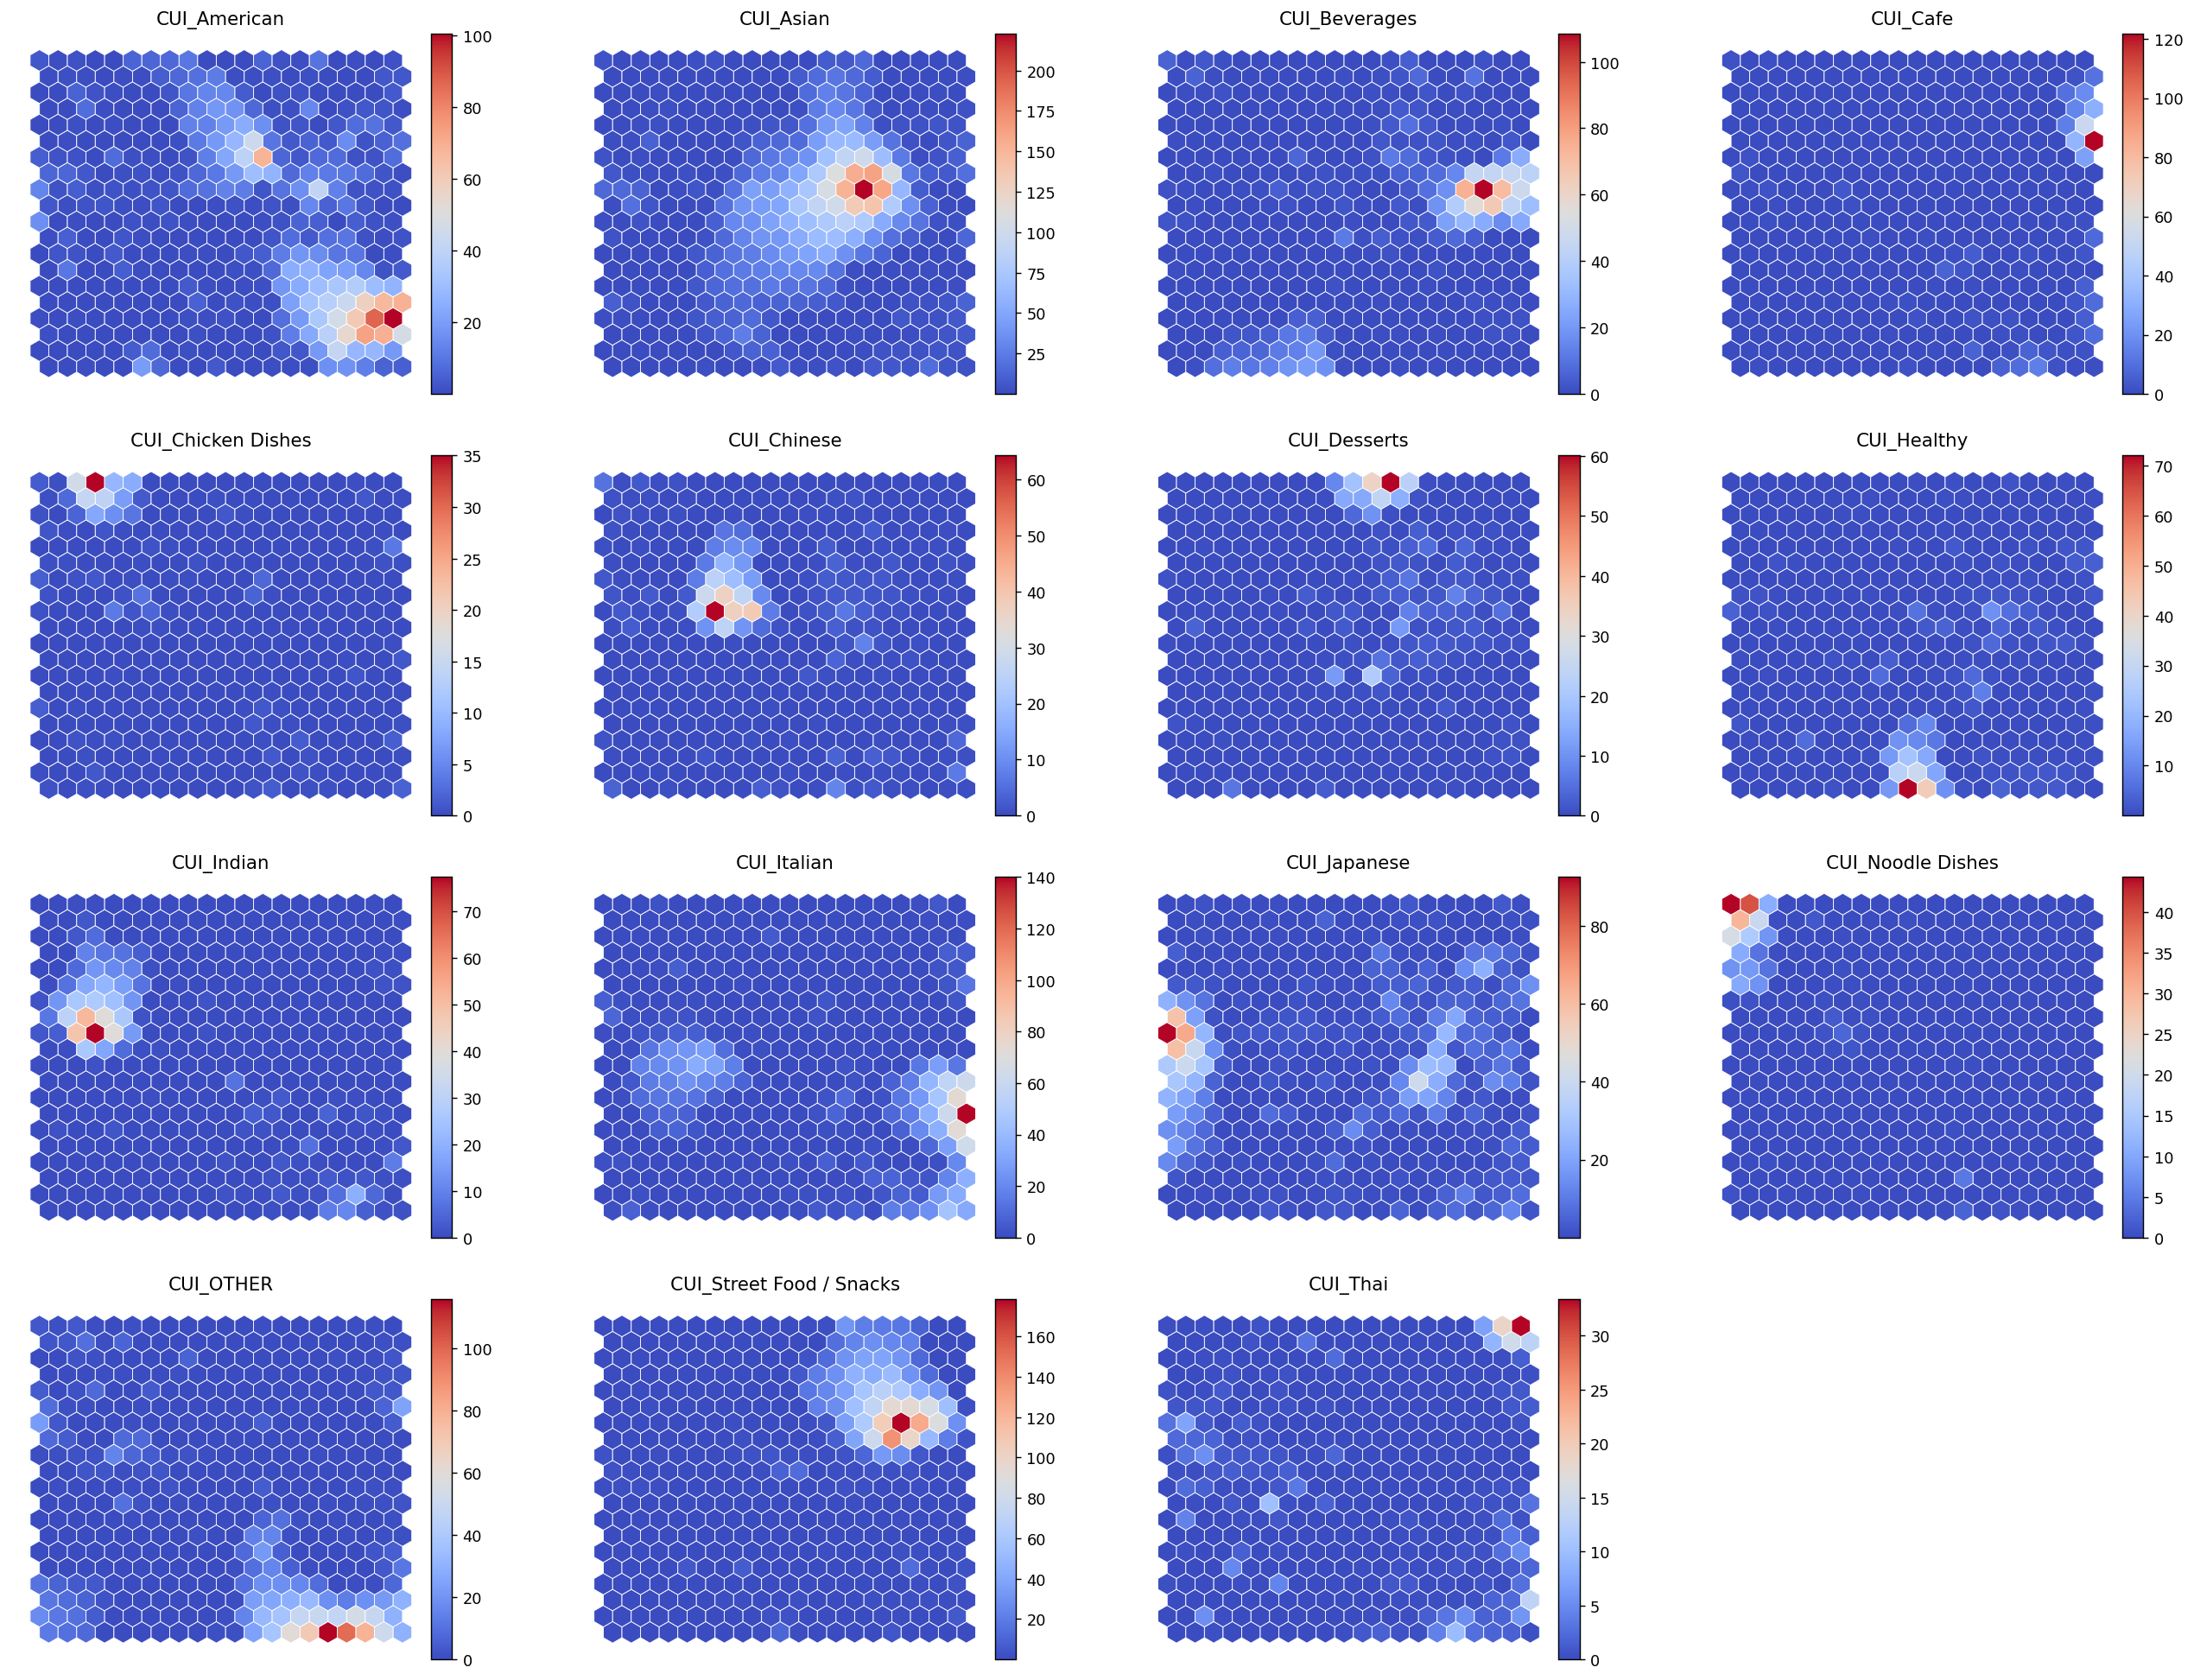

In [685]:
M = 20
N = 20
n_feats = 15
learning_rate = 0.5
neighborhood_function = 'gaussian'

sm = MiniSom(M, N, 
             n_feats,
             learning_rate=learning_rate, 
             topology='hexagonal',
             neighborhood_function=neighborhood_function)

som_data = cui_features_som.values

print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

sm.train_batch(som_data, 30000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

weights = sm.get_weights()
figsize=(20, 15)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(4, 4, wspace=.08, hspace=.07).flatten()
colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi in range(len(cui_features_som.columns)):
    if cpi >= len(subfigs) or cpi >= weights.shape[2]:
        break
    sf = subfigs[cpi]
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=cui_features_som.columns[cpi],
                    cmap=cm.coolwarm)

The SOM visualization reveals several key patterns in cuisine clustering:

1. Strong Regional Clusters:
- Asian, Chinese, and Japanese cuisines show distinct high-intensity regions in similar map areas, suggesting culinary relatedness
- Indian cuisine has an isolated concentrated cluster, indicating unique flavor profiles
- Thai cuisine shows weaker clustering, suggesting more fusion/overlap with other Asian cuisines

2. Dish-Type Patterns:
- Noodle dishes cluster near Asian cuisines, confirming regional association
- Chicken dishes show dispersed patterns, indicating cross-cultural presence
- Street Food/Snacks have concentrated hotspots, suggesting specific flavor profiles

3. Specialty Categories:
- Beverages and Desserts have clear, isolated clusters
- Cafe items show focused clustering, implying consistent menu patterns
- Healthy options have distinct regions, suggesting specific ingredient combinations

4. Notable Observations:
- American cuisine shows multiple hotspots, indicating diversity
- Italian cuisine has clear boundaries but some overlap with other Western cuisines
- The "OTHER" category shows scattered patterns, suggesting diverse uncategorized items

The visualization effectively shows both cuisine distinctiveness and cross-cultural culinary influences.

<a href="#Index">Back to Index</a>

# Order Volume Features <a class='anchor' id='order_colume_features'></a>

# K-Means <a class="anchor" id="kmeans"></a>
[Back to ToC](#toc)<br>

In [686]:
order_volume_features = df_scaled_new[['vendor_count', 'total_spending', 'total_orders']]


Check the correlation between features.

<Figure size 1200x800 with 0 Axes>

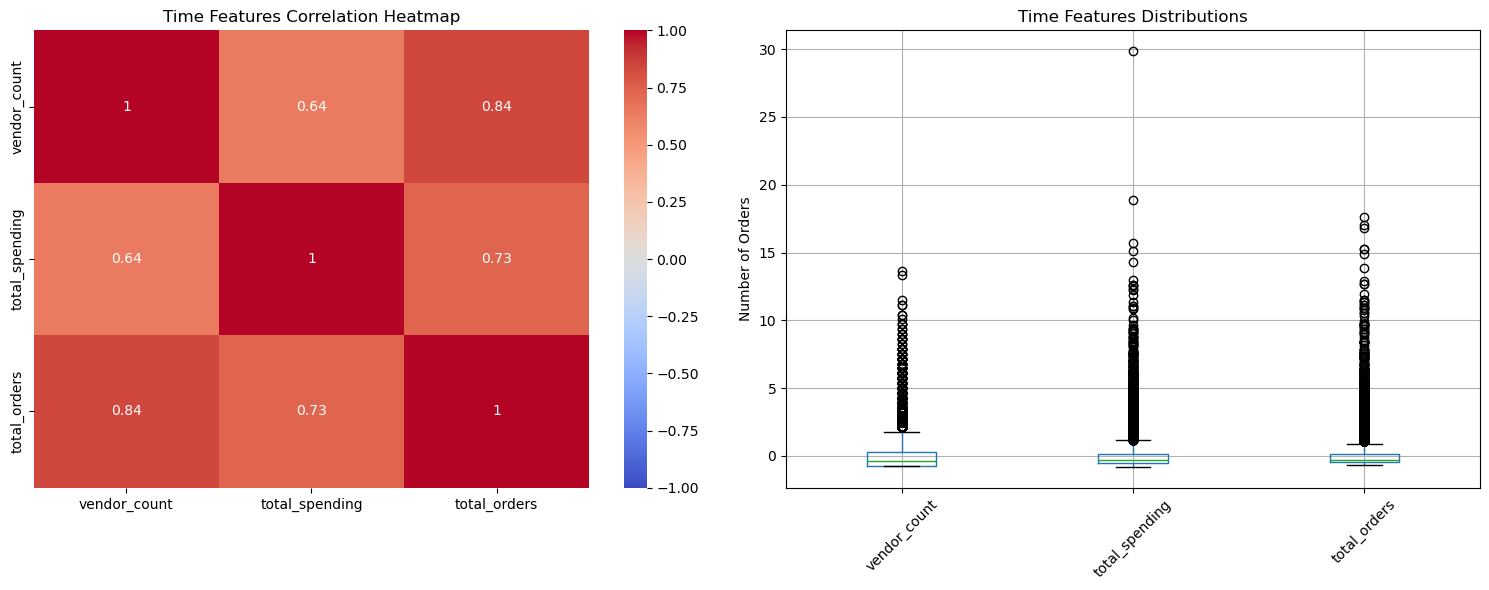

In [687]:
# Calculate correlation matrix for time features
correlation_matrix = order_volume_features.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Create subplots for different visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Correlation Heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red color scheme
            vmin=-1, vmax=1,  # Set correlation range
            center=0,  # Center the colormap at 0
            ax=ax1)
ax1.set_title('Time Features Correlation Heatmap')

# 2. Distribution Plots
order_volume_features.boxplot(ax=ax2)
ax2.set_title('Time Features Distributions')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

we still have a high correlation with total orders and vendor counts with 0,84 but if we remove it we lose alot of data and our continue apporaches get worse, thats why we decide to put the threshhold to 0,85 and keep total orders in

In [688]:
# Check K between 1 and 10
range_clusters = range(1, 11)

# Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(order_volume_features)
    inertia.append(kmclust.inertia_)  

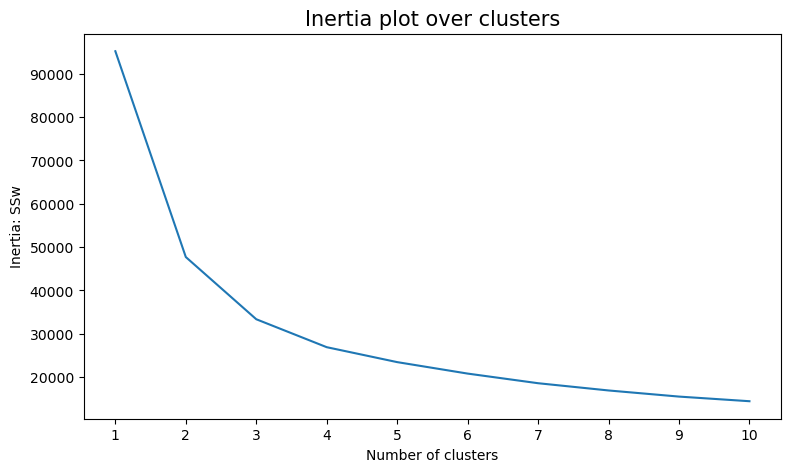

In [689]:
# The inertia plot for time of order features
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.694340535039124
For n_clusters = 3, the average silhouette_score is : 0.5819351828577088
For n_clusters = 4, the average silhouette_score is : 0.5058109265880437
For n_clusters = 5, the average silhouette_score is : 0.43563777155379313
For n_clusters = 6, the average silhouette_score is : 0.4428310016273136
For n_clusters = 7, the average silhouette_score is : 0.4122570609982513
For n_clusters = 8, the average silhouette_score is : 0.3897245428121421
For n_clusters = 9, the average silhouette_score is : 0.40637228021140587
For n_clusters = 10, the average silhouette_score is : 0.4021954210993876


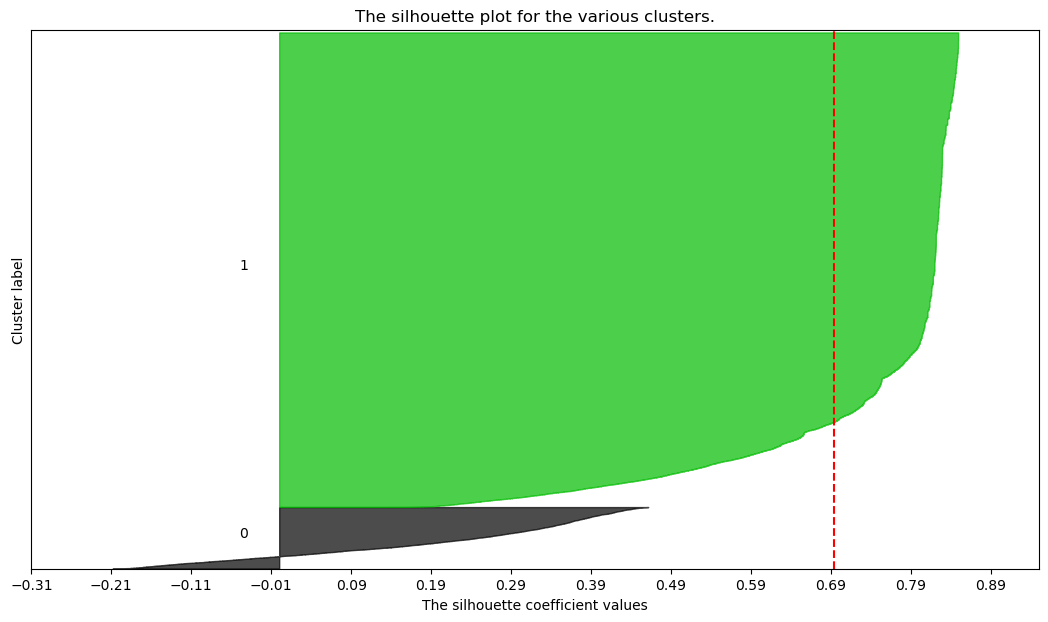

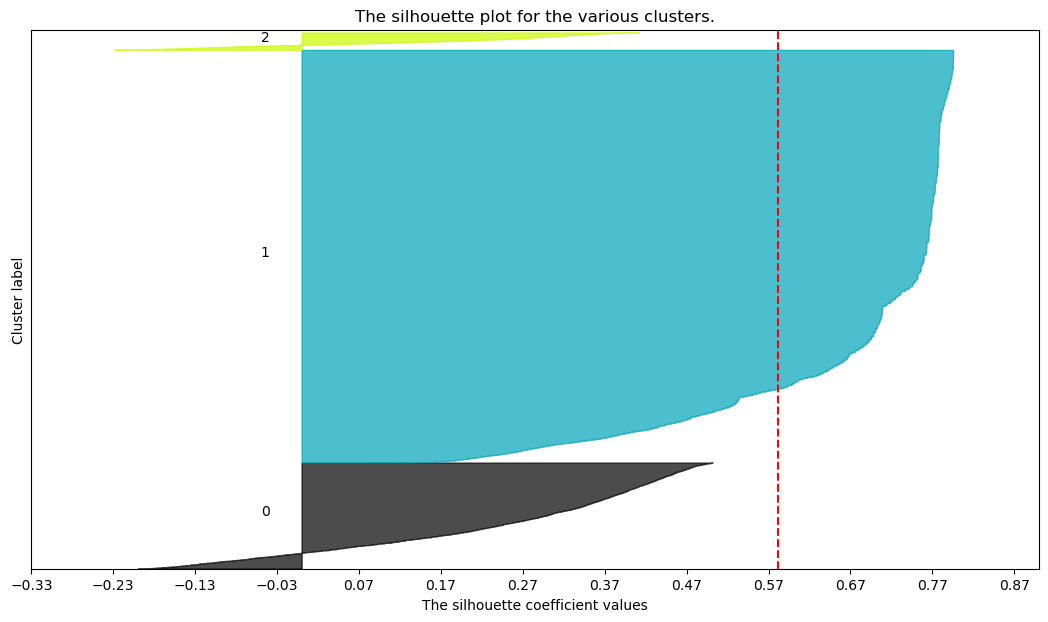

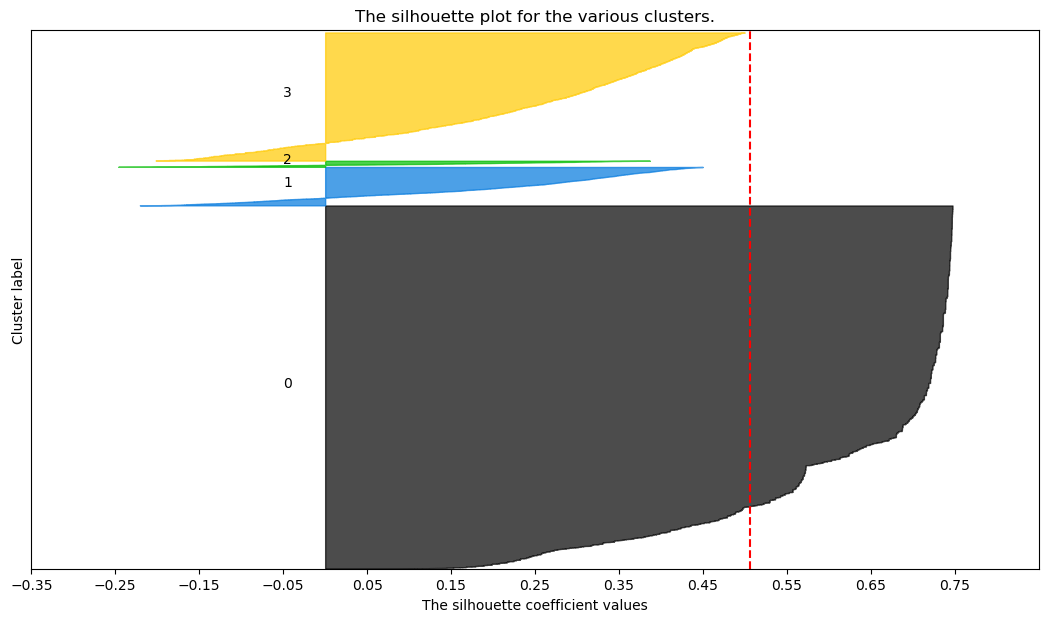

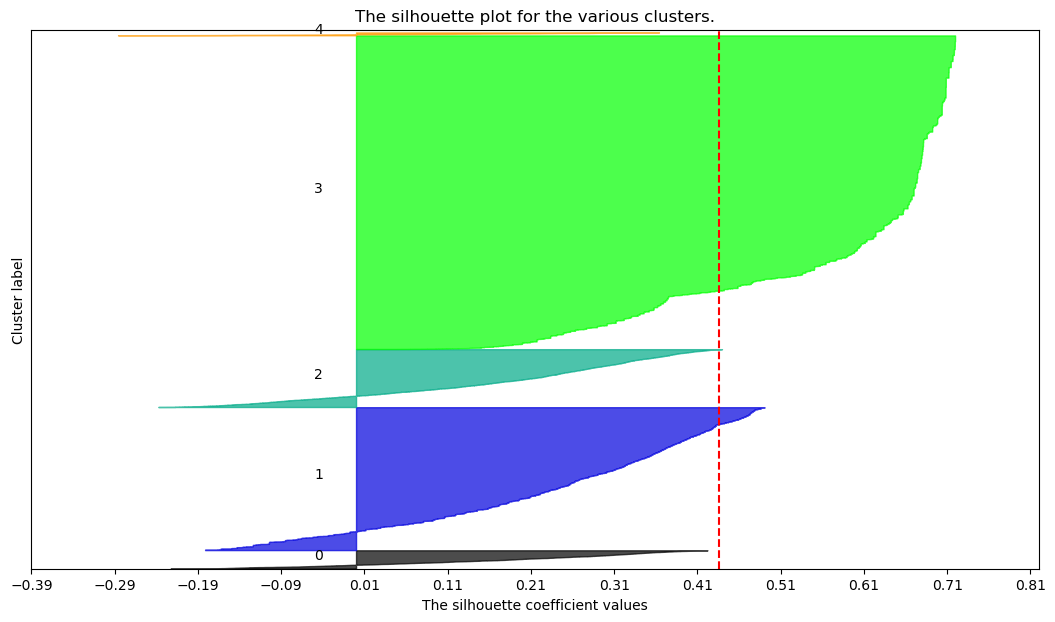

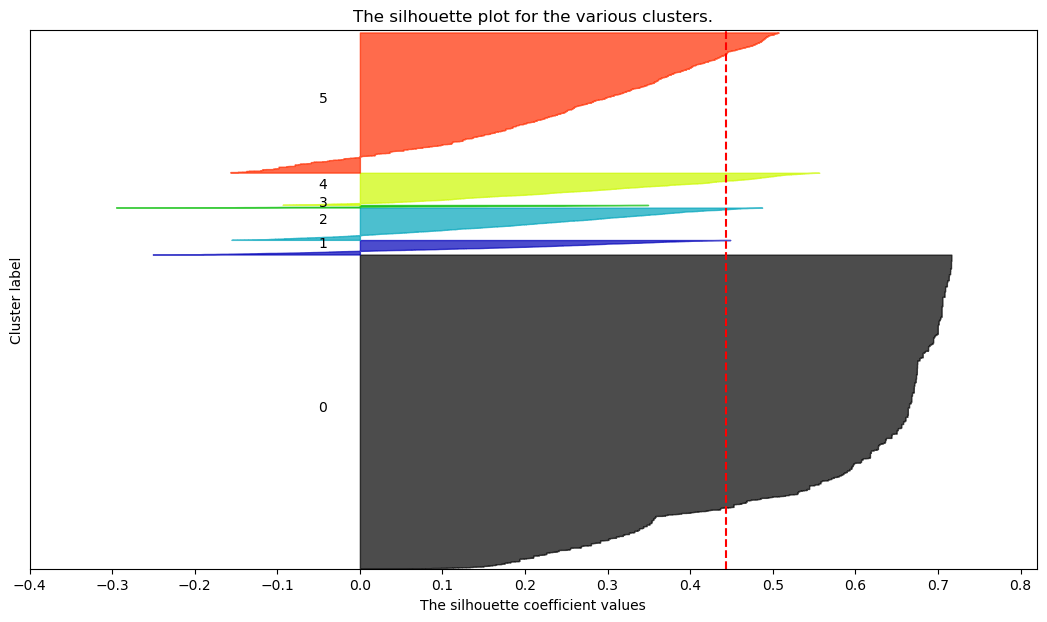

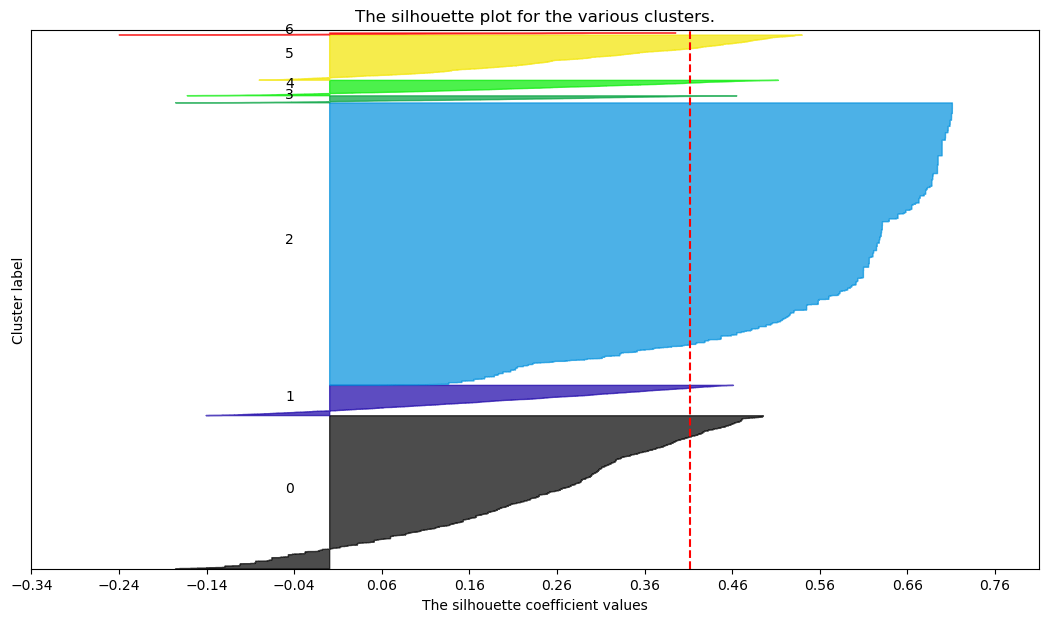

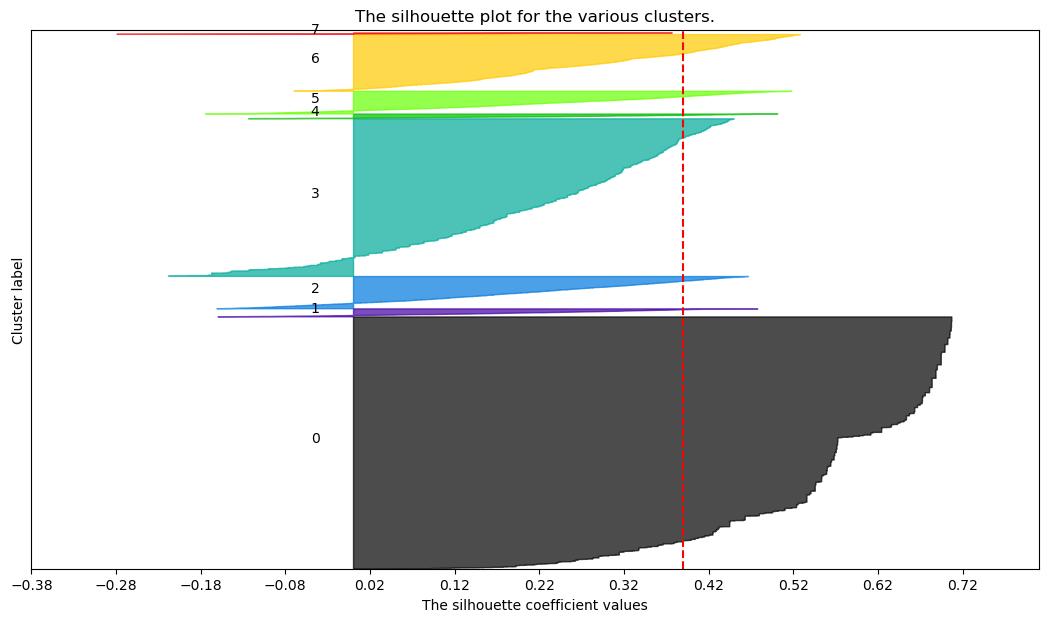

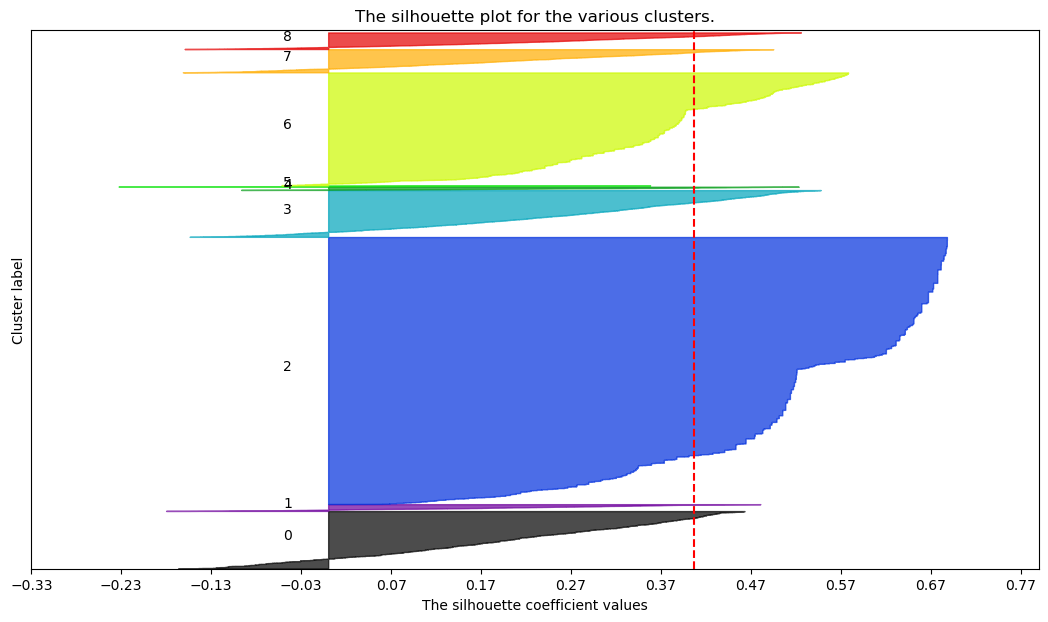

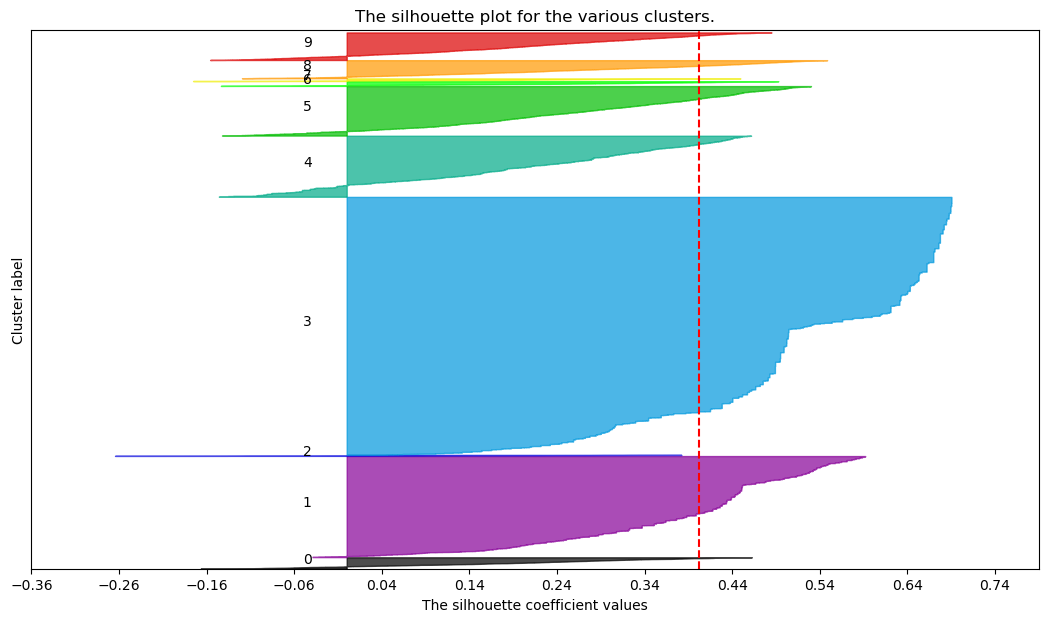

In [690]:
# Storing average silhouette metric for order volume features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(order_volume_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(order_volume_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(order_volume_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

We choose 2 cluster because it has by far the best score of 0,69

<a href="#Index">Back to Index</a>

# K-Means

K=4 was selected based on strength of silhouette score combined with additional business context applications gained from having additional clusters.

In [691]:
#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat_order_volume = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat_order_volume.groupby('labels').mean()

vendor_count  total_spending  total_orders
labels                                            
0          -0.470584       -0.397997     -0.430700
1           2.029502        1.761609      1.932373
2           4.467926        5.009643      5.527548
3           0.514442        0.363375      0.380423

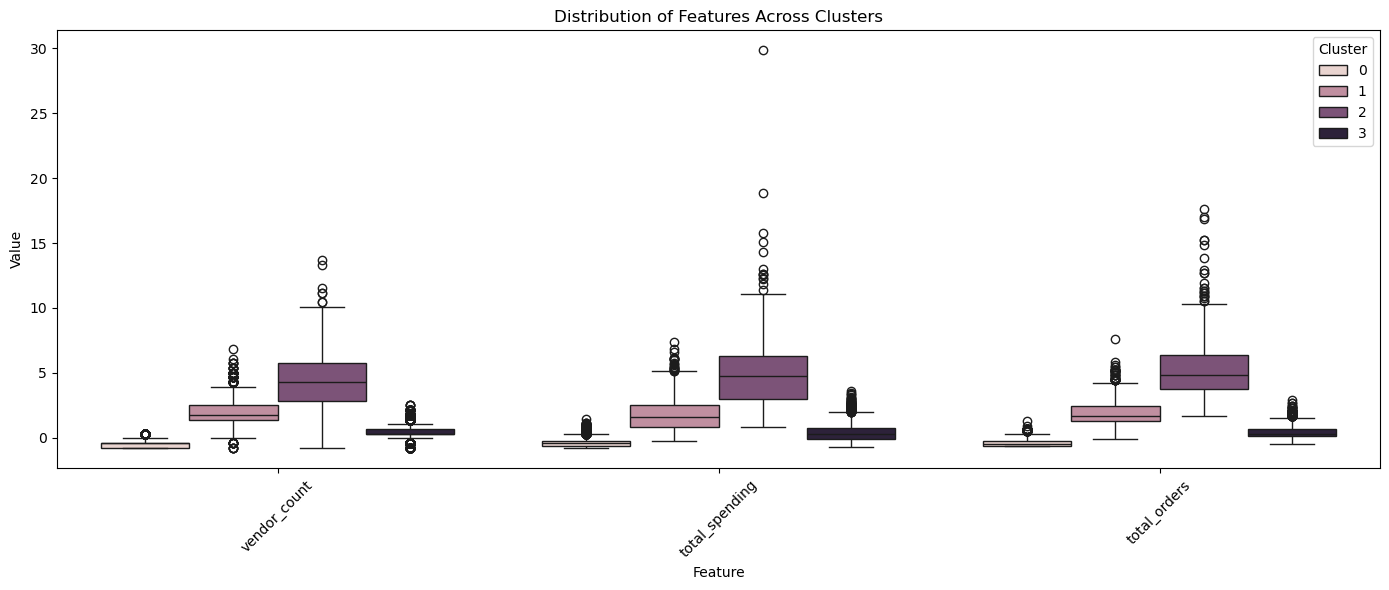

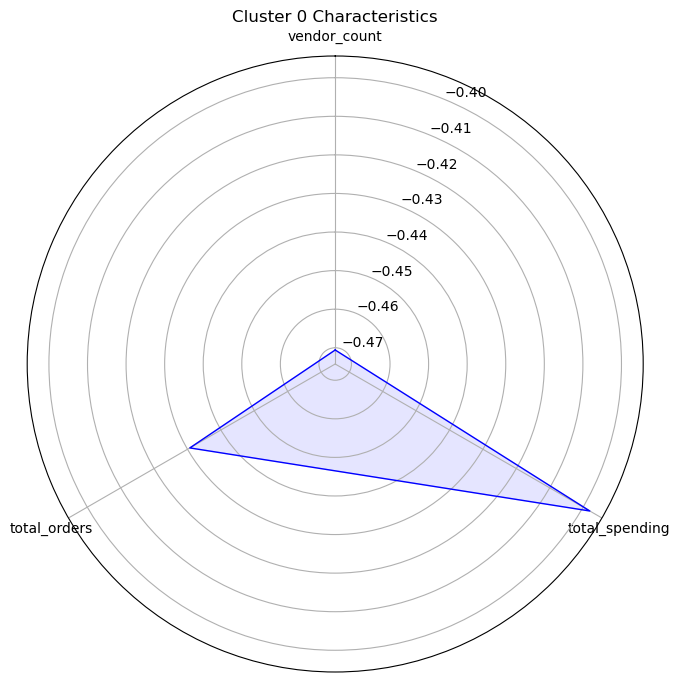

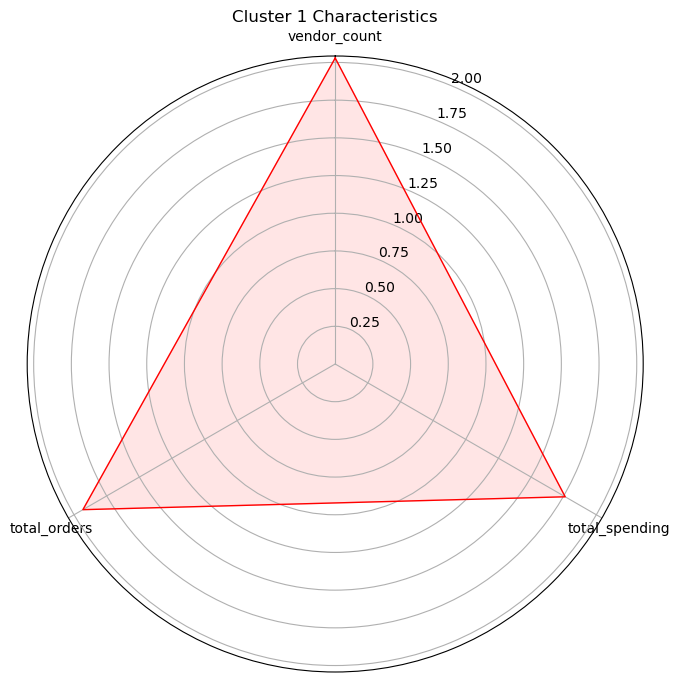

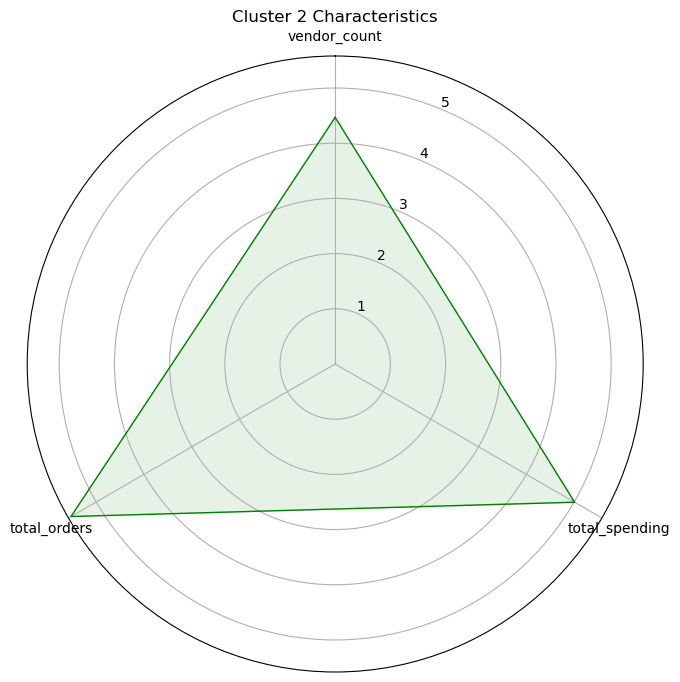

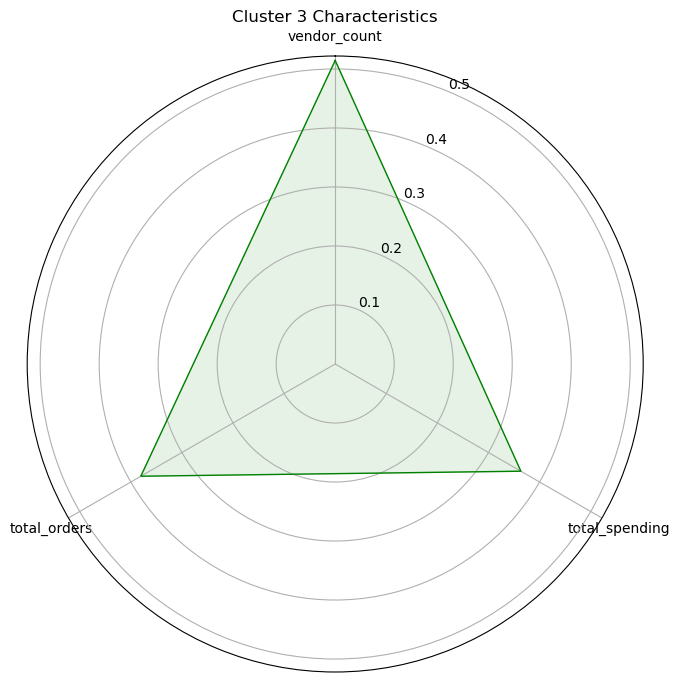

Cluster Centroids:
         vendor_count  total_spending  total_orders
Cluster                                            
0           -0.470584       -0.397997     -0.430700
1            2.029502        1.761609      1.932373
2            4.467926        5.009643      5.527548
3            0.514442        0.363375      0.380423


In [692]:
def perform_clustering_analysis(df_scaled_new):
    # Select time of order features
    order_volume_features = df_scaled_new[['vendor_count', 'total_spending', 'total_orders']]   

    # Perform K-means clustering
    kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
    km_labels = kmclust.fit_predict(order_volume_features)

    # Concatenate labels with features
    df_concat = pd.concat([order_volume_features, pd.Series(km_labels, name='Cluster', index=order_volume_features.index)], axis=1)



    plt.figure(figsize=(14, 6))
    df_melted = df_concat.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
    sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melted)
    plt.title('Distribution of Features Across Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    



    def make_spider(df, row, title, color):
        categories = list(df.columns)
        N = len(categories)
        
        # Prepare values
        values = df.iloc[row].tolist()
        values += values[:1]
        
        # Calculate angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        # Create plot
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
        ax.plot(angles, values, color=color, linewidth=1)
        ax.fill(angles, values, color=color, alpha=0.1)
        
        # Fix axis to go in the right order and start at 12 o'clock
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        
        # Draw axis lines for each angle and label
        plt.xticks(angles[:-1], categories)
        
        plt.title(title)
        plt.show()

    # Prepare cluster means
    cluster_means = df_concat.groupby('Cluster').mean()

    # Create radar charts
    make_spider(cluster_means, 0, 'Cluster 0 Characteristics', 'blue')
    make_spider(cluster_means, 1, 'Cluster 1 Characteristics', 'red')
    make_spider(cluster_means, 2, 'Cluster 2 Characteristics', 'green')
    make_spider(cluster_means, 3, 'Cluster 3 Characteristics', 'green')

    # 5. Cluster Centroids Comparison
    print("Cluster Centroids:")
    print(cluster_means)

    return km_labels, cluster_means

# Call the function with your scaled dataframe
km_labels, cluster_means = perform_clustering_analysis(df_scaled_new)

Value-Conscious Regular Customers (Cluster 0):

Below average metrics across all dimensions (negative centroid values)
- Low vendor diversity (-0.47)
- Moderate total spending (-0.40) and order frequency (-0.43)
- Represents budget-conscious customers who are loyal to a few vendors

Active Mid-Value Customers (Cluster 1):

Above average metrics across all dimensions (centroid values around 2.0)
- High vendor diversity (2.03)
- Strong total spending (1.76) and order frequency (1.93)
- Represents engaged customers who regularly use the platform and try different vendors

Power Users (Cluster 2):

- Highest values across all metrics (centroid values 4.5-5.5)
- Extremely high vendor diversity (4.47)
- Exceptional total spending (5.01) and order frequency (5.53)
- Represents the platform's most valuable customers who frequently order and explore widely

Casual Users (Cluster 3):

Slightly above average metrics (centroid values 0.3-0.5)
- Moderate vendor diversity (0.51)
- Average total spending (0.36) and order frequency (0.38)
- Represents occasional users who maintain consistent but modest engagement

In [693]:
# Add cluster assignments back to original data
order_volume_features['cluster'] = km_labels

# Calculate cluster statistics
for cluster in [0, 1]:
    cluster_data = order_volume_features[order_volume_features['cluster'] == cluster]
    print(f"\nCluster {cluster} Statistics:")
    print(cluster_data.describe())


Cluster 0 Statistics:
       vendor_count  total_spending  total_orders  cluster
count  21512.000000    21512.000000  21512.000000  21512.0
mean      -0.470584       -0.397997     -0.430700      0.0
std        0.293770        0.283927      0.222237      0.0
min       -0.763931       -0.809646     -0.665945      0.0
25%       -0.763931       -0.614445     -0.665945      0.0
50%       -0.402940       -0.440933     -0.469387      0.0
75%       -0.402940       -0.267421     -0.272829      0.0
max        0.319042        1.446007      1.299635      0.0

Cluster 1 Statistics:
       vendor_count  total_spending  total_orders  cluster
count   2273.000000     2273.000000   2273.000000   2273.0
mean       2.029502        1.761609      1.932373      1.0
std        1.051022        1.204564      0.952805      0.0
min       -0.763931       -0.289110     -0.076271      1.0
25%        1.402015        0.795338      1.299635      1.0
50%        1.763007        1.576141      1.692751      1.0
75%       

/var/folders/vw/pymryqyn3hv91xzpkt7_kblw0000gn/T/ipykernel_69464/3545105494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_volume_features['cluster'] = km_labels


<a href="#Index">Back to Index</a>

# SOM Order Features<a class="anchor" id="som_order_features"></a>

In [694]:
df_treated.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_spending', 'total_orders', 'cuisine_diversity',
       'primary_cuisine', 'weekend_orders', 'underweekend_orders',
       'weekend_ratio', 'lunch_orders', 'dinner_orders', 'meal_preference',
       'morning_orders', 'midday_orders', 'evening_orde

In [695]:
order_volume_features_som = df_treated[['vendor_count', 'total_spending', 'total_orders']]

In [696]:
# Ensure MiniSom is imported

# Define the parameters for the SOM
M = 15
N = 15
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(order_volume_features_som.columns)
learning_rate = .7

# Use the correct DataFrame for SOM
som_data = order_volume_features_som.values

# Initialize the SOM
sm = MiniSom(M, N,              # 15x15 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 

print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

# Trains the SOM using all the vectors in data sequentially
sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



Before training:
QE 2.2444
TE 0.9852
After training:
QE 1.5205
TE 0.3712


In [697]:
# Get the weights from the trained SOM
weights = sm.get_weights()

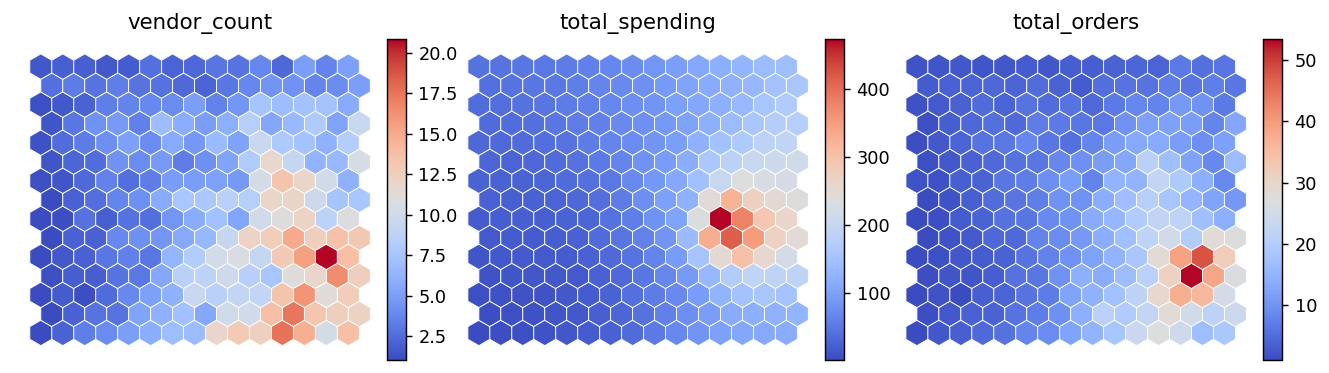

In [698]:
##############################
# Plot Component Planes
##############################

figsize=(10, 10)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(1,3,wspace=.08, hspace=.07)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(weights.shape[2]), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=order_volume_features_som.columns[cpi],
                    cmap=cm.coolwarm,
                    )

This SOM (Self-Organizing Map) visualization shows clustering patterns across three business metrics:

1. Vendor Count (left): Shows a gradient from low counts (blue, bottom) to high counts (red, top), suggesting geographic or business segment differences in vendor relationships.

2. Total Spending (middle): Concentration of low spending (blue) with isolated pockets of high spending (red), indicating potential areas for cost optimization or identifying unusual spending patterns.

3. Total Orders (right): Complex pattern with high-volume areas (red) concentrated in certain regions, suggesting clusters of high-activity business segments or locations.

The hexagonal grid format helps identify natural groupings and relationships between these metrics. Areas where patterns align across maps may indicate correlated business behaviors worth investigating.

Would you like me to analyze any specific patterns or relationships between these metrics in more detail?

<a href="#Index">Back to Index</a>

# Cluster Analysis:

Feature Correlations Analysis:
The correlation matrix shows interesting relationships between your volume metrics:

1. Vendor Count and Total Orders (0.84):
- This strong positive correlation indicates that customers who order from more vendors tend to place more orders overall
- This suggests customers aren't just loyal to a few vendors but are actively exploring different options
- The high correlation might indicate an opportunity to encourage vendor exploration among less active customers

2. Total Spending and Total Orders (0.73):
- The moderately strong correlation here is expected but interestingly not as high as vendor count/total orders
- This suggests some variation in order values - not all frequent orderers are necessarily big spenders
- There might be different price sensitivity segments within your active customers

3. Vendor Count and Total Spending (0.64):
- The relatively lower correlation here is particularly interesting
- It suggests that exploring more vendors doesn't automatically lead to higher spending
- This could indicate price comparison behavior or varying price points across vendors

Cluster Statistics Analysis:

Cluster 0 (Low-Volume Segment, 21,512 customers):
- Mean values are all negative, showing consistently below-average behavior
- Very tight standard deviations (0.22-0.29) indicate a homogeneous group
- The max values show some potential for growth - some customers are starting to show higher activity
- Key characteristics:
  * Vendor count: -0.47σ below mean
  * Total spending: -0.40σ below mean
  * Total orders: -0.43σ below mean

Cluster 1 (High-Volume Segment, 2,273 customers):
- Much smaller but more valuable segment
- Higher standard deviations (0.95-1.20) show more variety in behavior
- Substantially higher means across all metrics
- Key characteristics:
  * Vendor count: +2.03σ above mean
  * Total spending: +1.76σ above mean
  * Total orders: +1.93σ above mean



<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.7.'></a>
># 2.4. Day of Week Orders

In [735]:
df_scaled_original.columns

Index(['vendor_count', 'product_count', 'is_chain', 'last_order',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [736]:

days_of_week_features = df_scaled_original[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']]

# K-Means

In [701]:
#Check K between 1 and 10
range_clusters = range(1, 11)

# Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(days_of_week_features)
    inertia.append(kmclust.inertia_)  

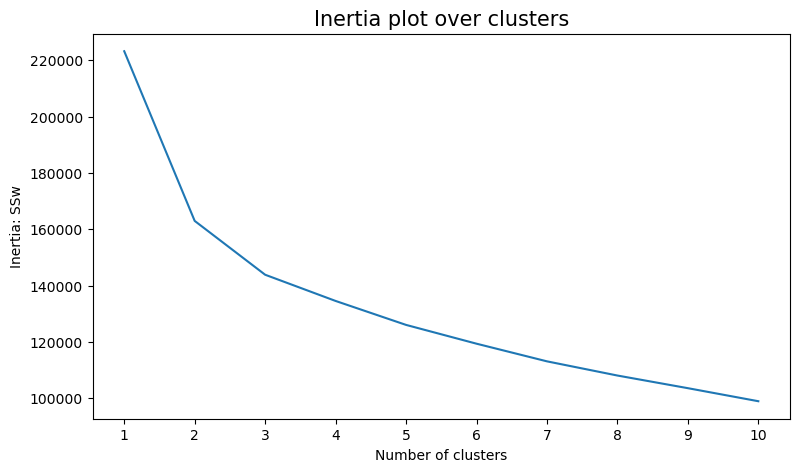

In [702]:
# The inertia plot for day of weekday/weekend features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

From Inertia plot, the optimal number of clusters is K=2 or K=3. 

For n_clusters = 2, the average silhouette_score is : 0.5861695313859401
For n_clusters = 3, the average silhouette_score is : 0.4158750005709425
For n_clusters = 4, the average silhouette_score is : 0.2888677242144086
For n_clusters = 5, the average silhouette_score is : 0.2740484397491813
For n_clusters = 6, the average silhouette_score is : 0.1339630245480364
For n_clusters = 7, the average silhouette_score is : 0.14064766133560944
For n_clusters = 8, the average silhouette_score is : 0.1490087658193379
For n_clusters = 9, the average silhouette_score is : 0.15569774591354404
For n_clusters = 10, the average silhouette_score is : 0.16349611725867727


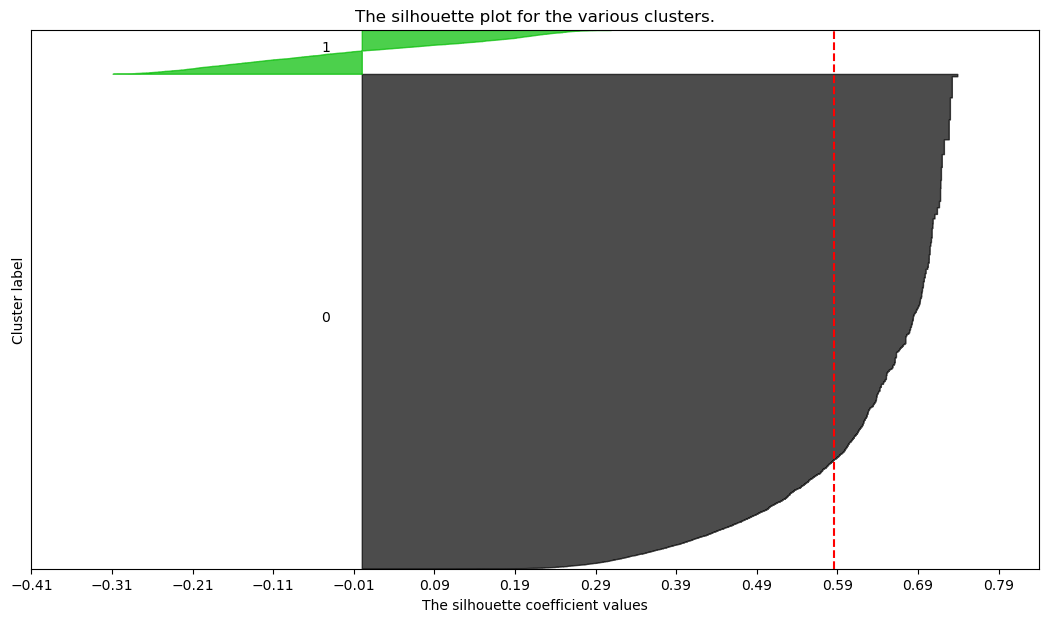

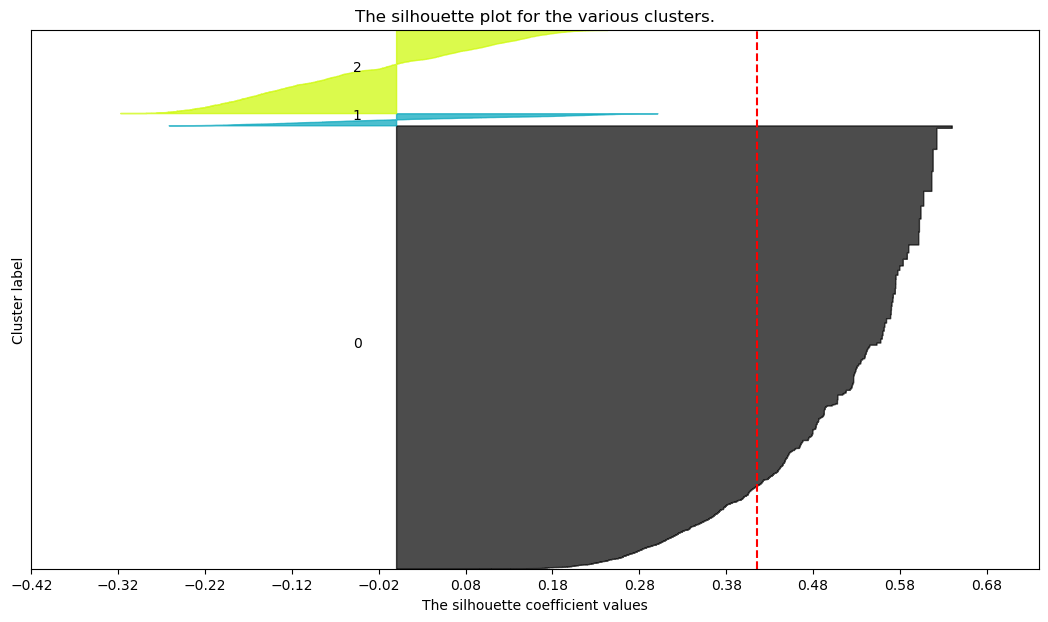

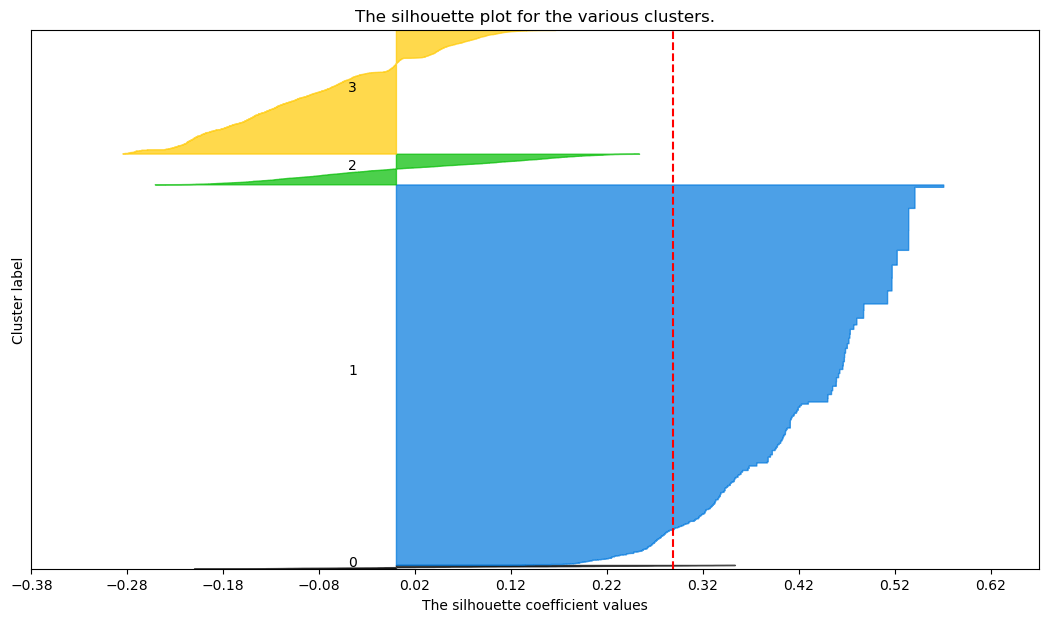

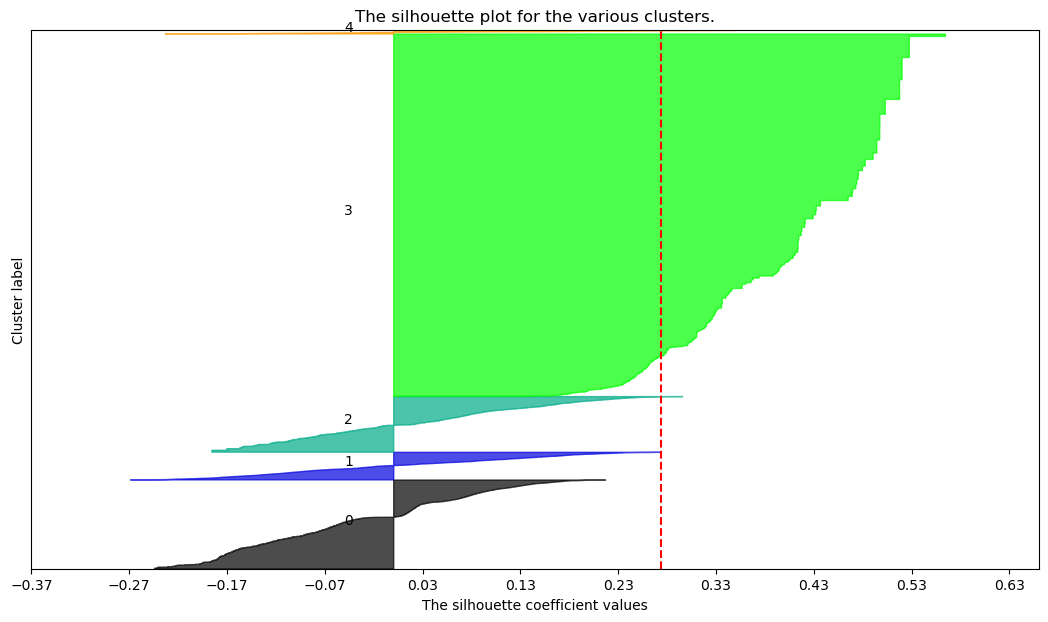

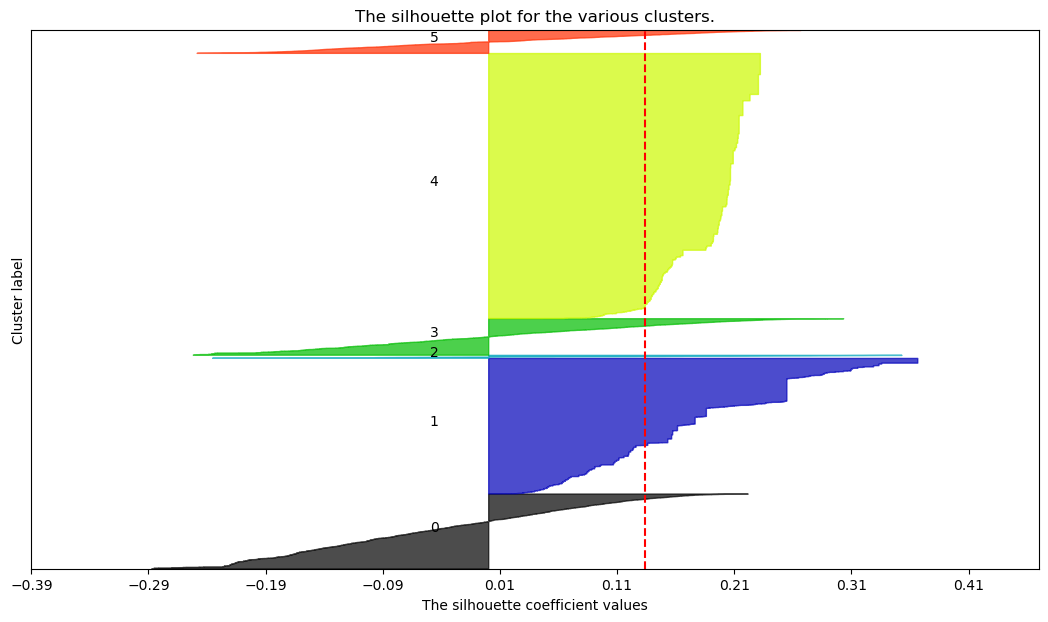

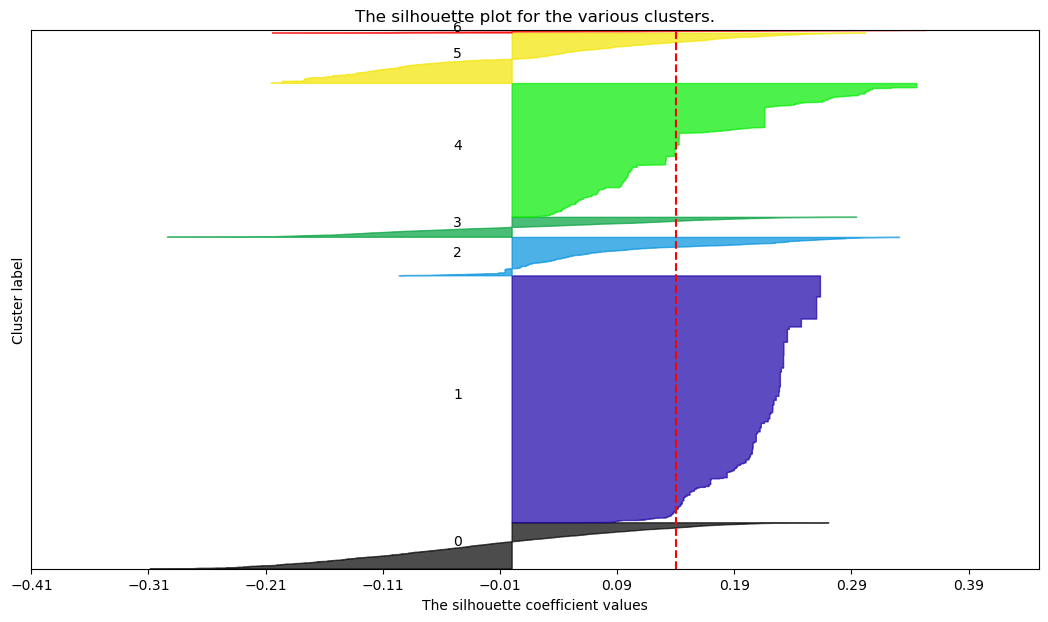

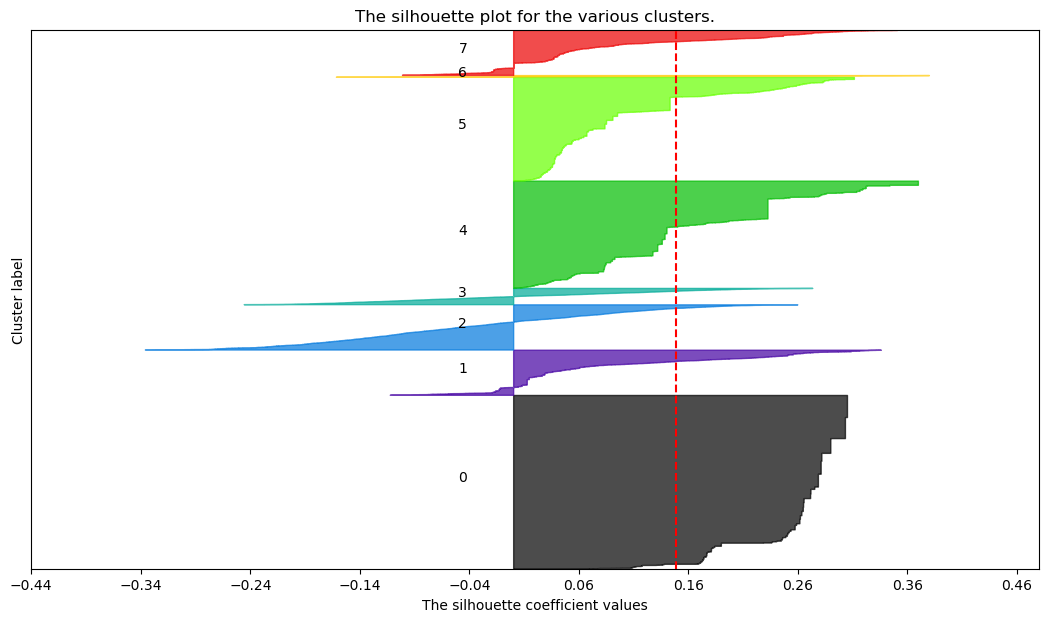

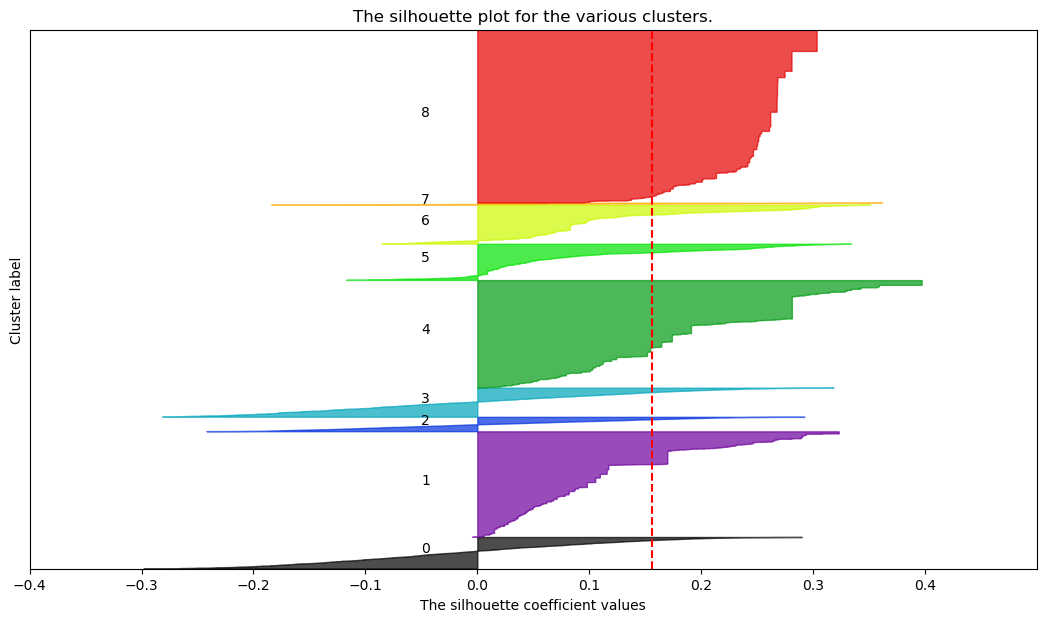

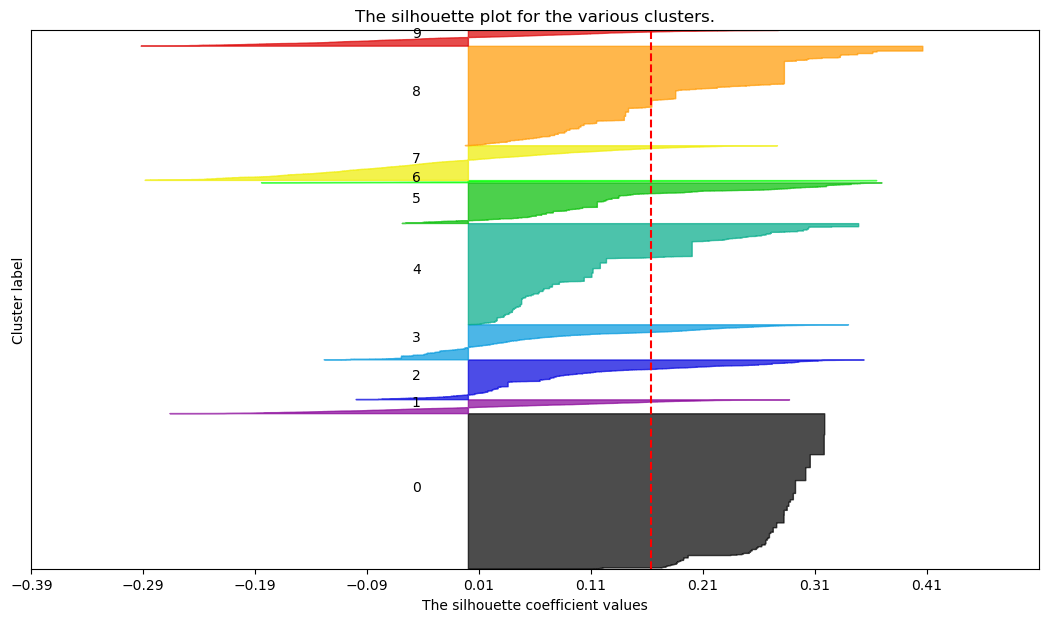

In [703]:
# Storing average silhouette metric for weekday/weekend features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(days_of_week_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(days_of_week_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(days_of_week_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

K=2 was chosen as the optimal number of clusters based on having a signifcantly higher silhouette score.

In [704]:
#K-means with K=2 for days of week columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5     DOW_6
labels                                                                      
0      -0.160676 -0.163241 -0.164652 -0.163392 -0.154428 -0.134694 -0.138765
1       1.812227  1.841163  1.857078  1.842868  1.741763  1.519188  1.565096

# <a class='anchor' id='2.3.'></a>
># 2.5. Weekday vs Weekend Features

In [705]:
df_scaled_new.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'total_spending',
       'total_orders', 'cuisine_diversity', 'weekend_orders',
       'underweekend_orders', 'weekend_ratio', 'lunch_orders', 'dinner_orders',
       'morning_orders', 'midday_orders', 'evening_orders', 'night_orders',
       'twilight_orders'],
      dtype='object')

In [706]:
# ToDo: double check underweekend_orders is the right column to use!
weekday_weekend_features = df_scaled_new[['weekend_orders', 'underweekend_orders']]

In [707]:
# Check K between 1 and 10
range_clusters = range(1, 11)

#Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(weekday_weekend_features)
    inertia.append(kmclust.inertia_)  

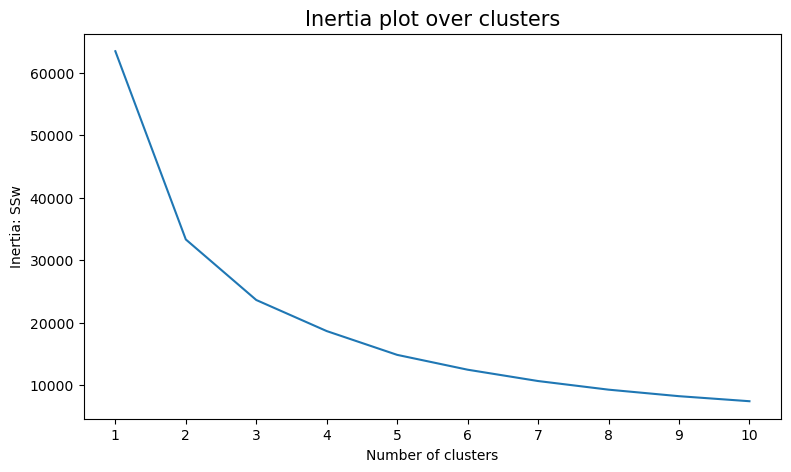

In [708]:
# The inertia plot for weekday/weekend features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

From the Inertia plot, the eblow point seems to be somewhere between K=2 and K=3.

For n_clusters = 2, the average silhouette_score is : 0.7106220078231991
For n_clusters = 3, the average silhouette_score is : 0.5551103801446502
For n_clusters = 4, the average silhouette_score is : 0.47215419940267456
For n_clusters = 5, the average silhouette_score is : 0.49803295995700947
For n_clusters = 6, the average silhouette_score is : 0.459939518840112
For n_clusters = 7, the average silhouette_score is : 0.4776240733660288
For n_clusters = 8, the average silhouette_score is : 0.4813773937069052
For n_clusters = 9, the average silhouette_score is : 0.4873923466362438
For n_clusters = 10, the average silhouette_score is : 0.5049953619629514


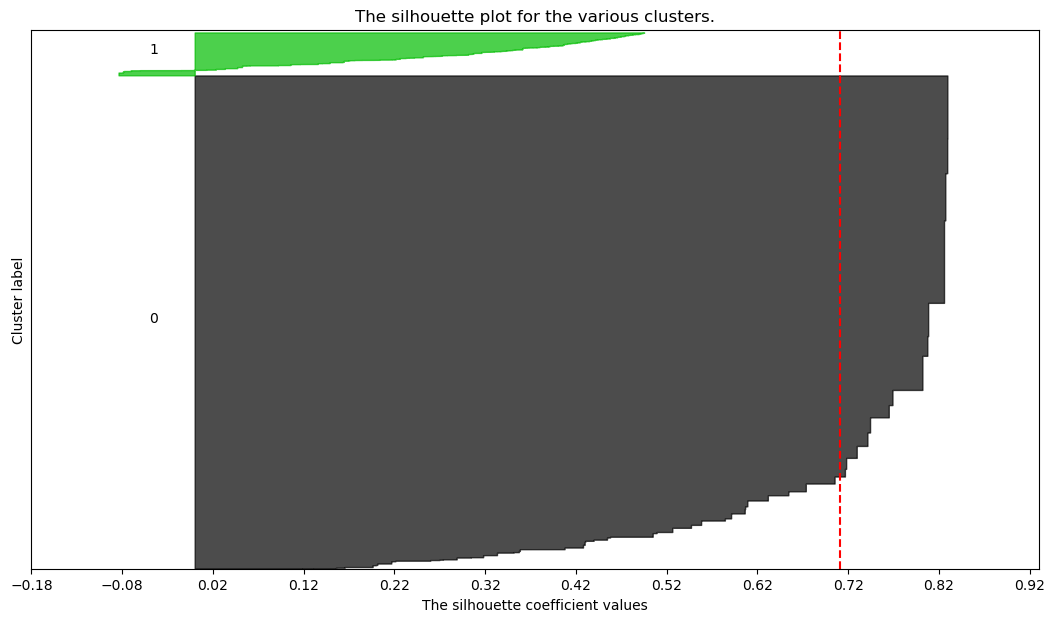

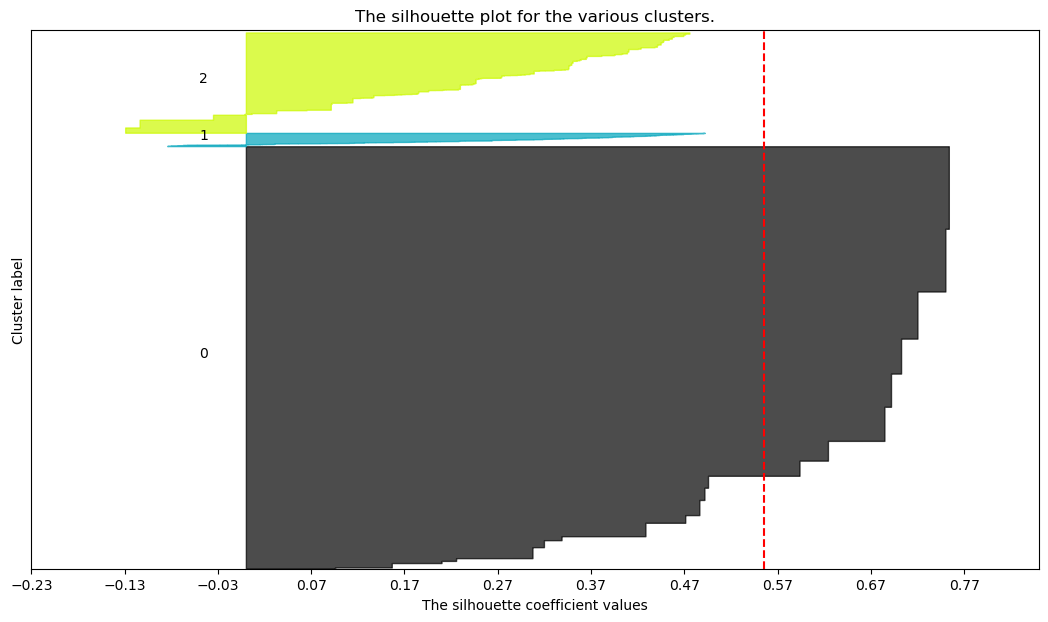

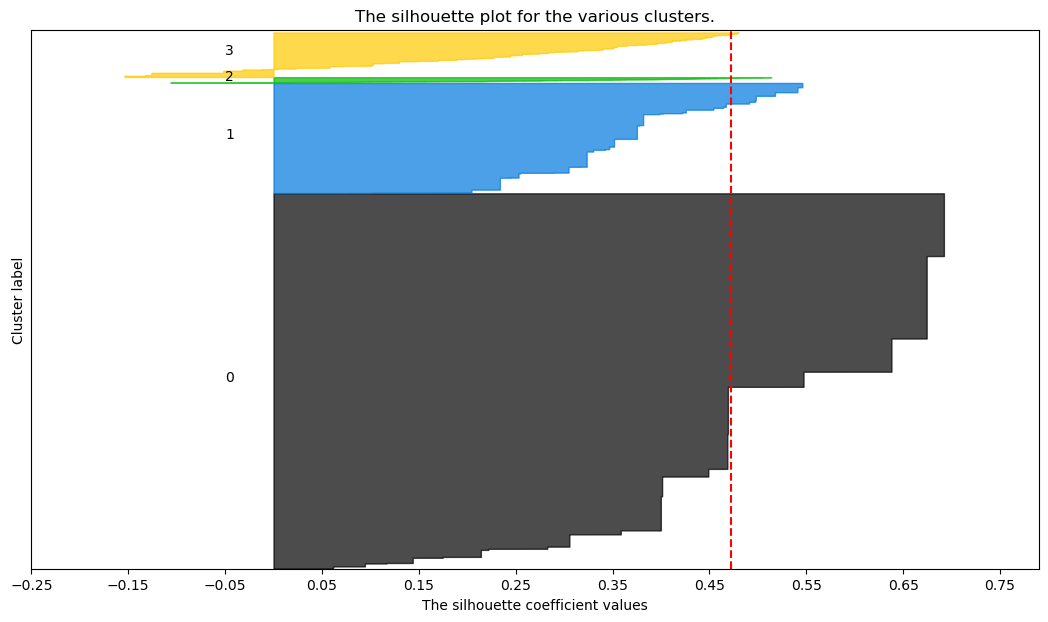

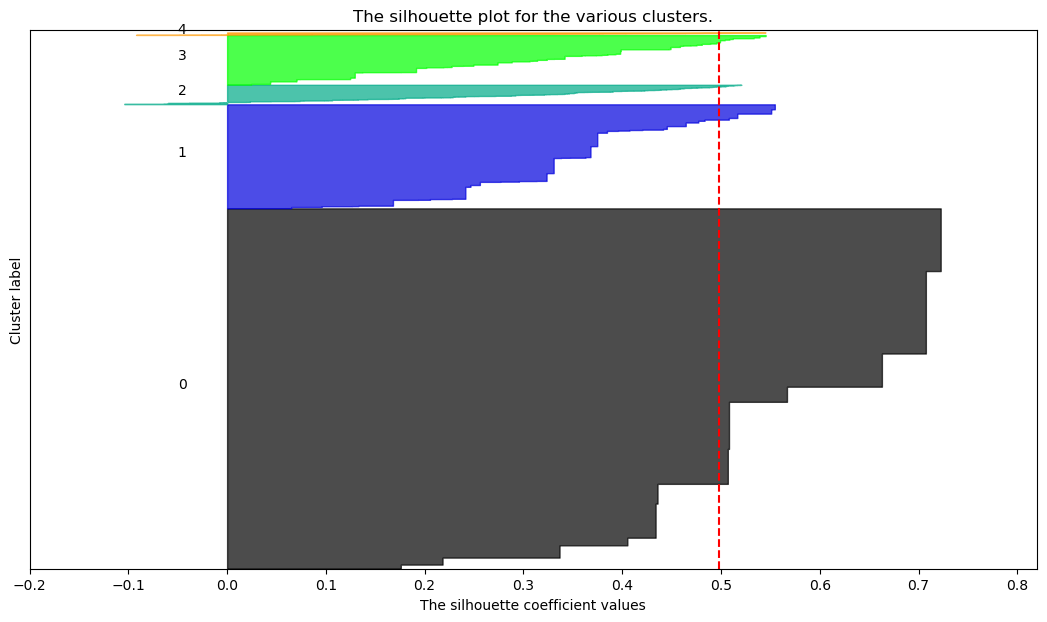

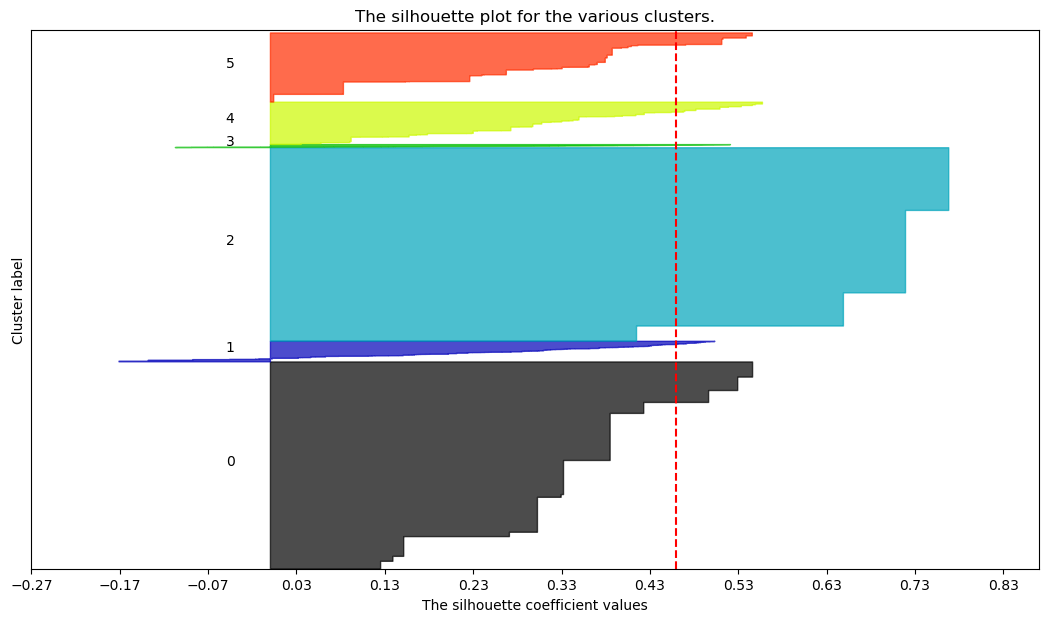

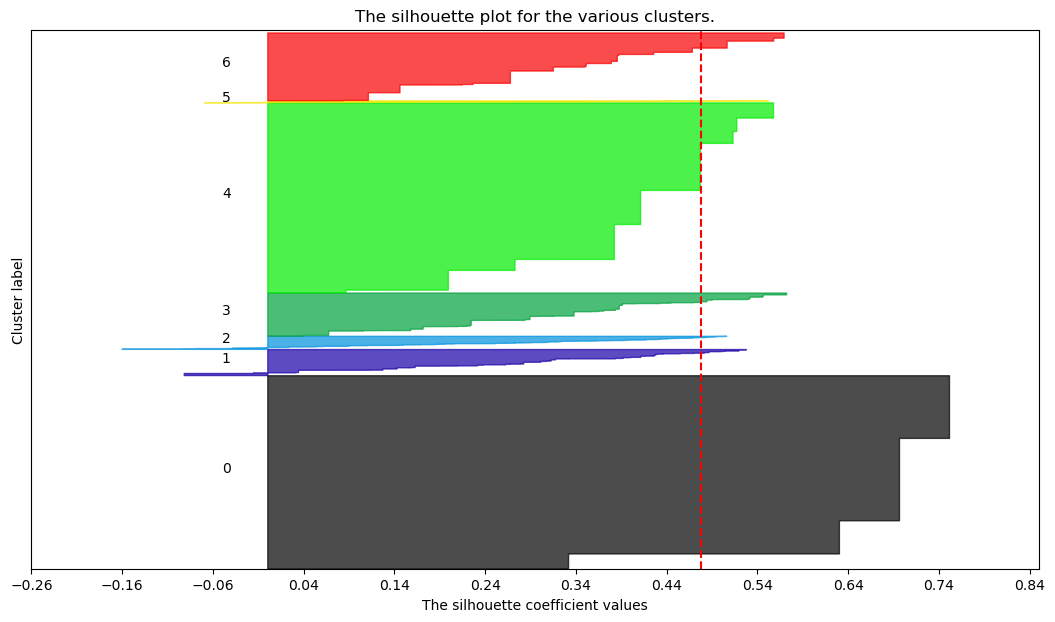

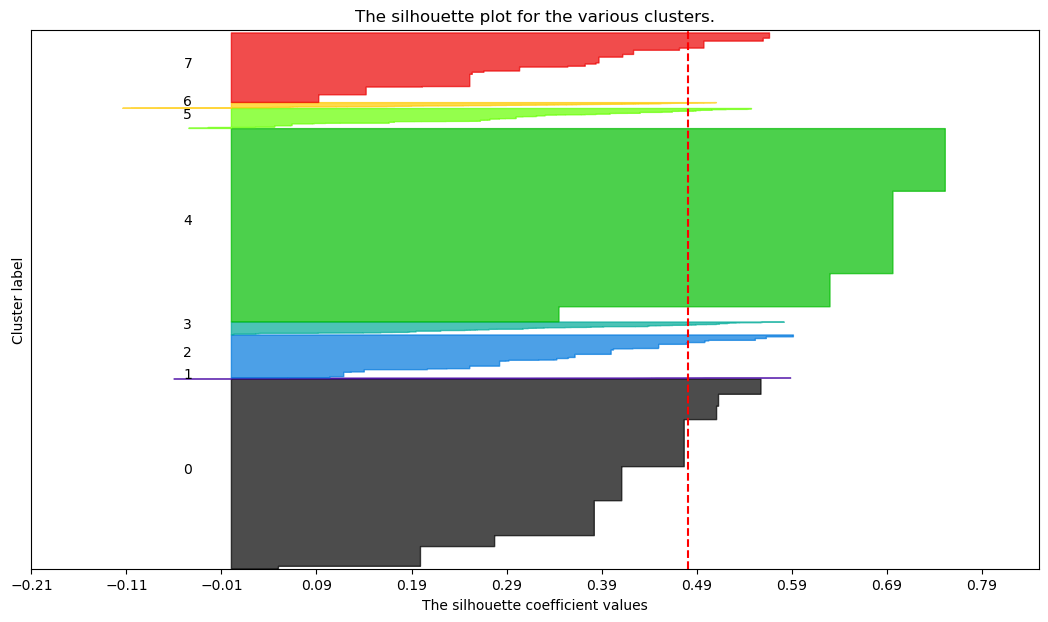

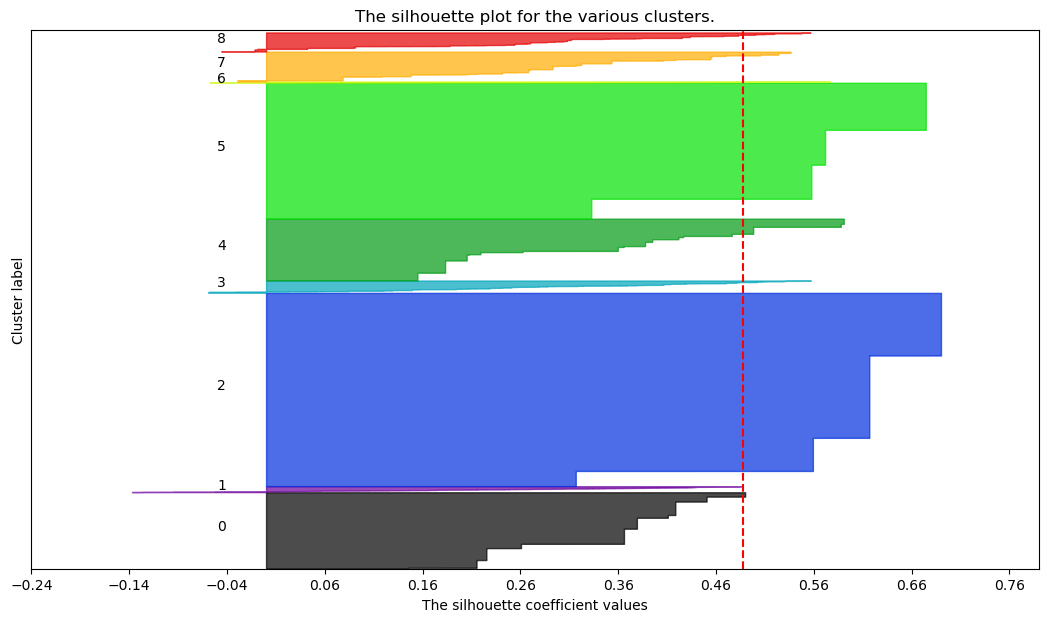

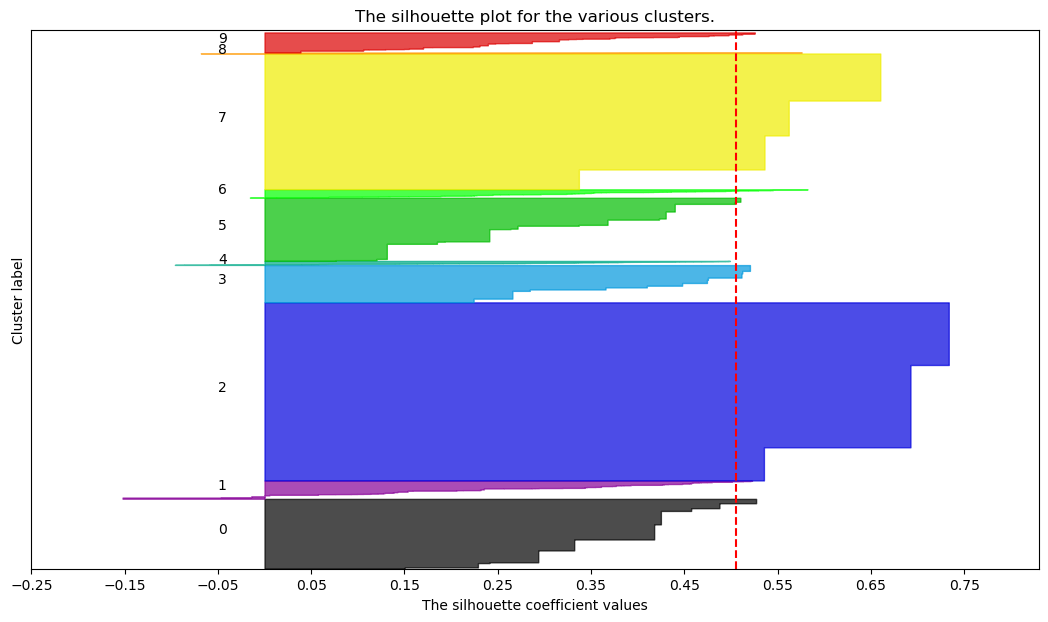

In [709]:
# Storing average silhouette metric for weekday/weekend features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(weekday_weekend_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(weekday_weekend_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(weekday_weekend_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

K=2 was selected because the silhouette score was significantly higher (by > 0.15) over the other potential solutions.

In [710]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(weekday_weekend_features)
km_labels = kmclust.fit_predict(weekday_weekend_features)

# Characterizing the final clusters
df_concat = pd.concat((weekday_weekend_features, pd.Series(km_labels, name='labels', index=weekday_weekend_features.index)), axis=1)
df_concat.groupby('labels').mean()

weekend_orders  underweekend_orders
labels                                     
0            -0.199228            -0.207090
1             2.292068             2.382517

# <a class='anchor' id='3.'></a>
># 2.6. Age Perspective

In [711]:
age_order_volume = df_scaled_new[['customer_age', 'total_spending', 'total_orders']]

In [712]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(age_order_volume)
    inertia.append(kmclust.inertia_) 

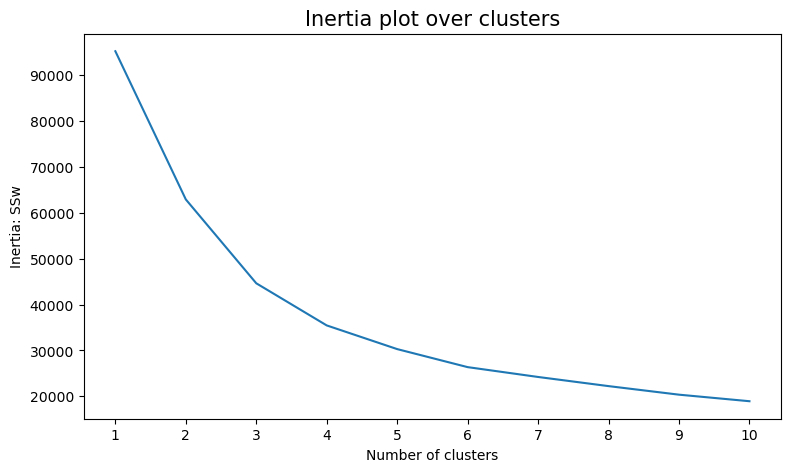

In [713]:

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.593417434898719
For n_clusters = 3, the average silhouette_score is : 0.4199902008621633
For n_clusters = 4, the average silhouette_score is : 0.44144320109952606
For n_clusters = 5, the average silhouette_score is : 0.3375393785741815
For n_clusters = 6, the average silhouette_score is : 0.34459615560884727
For n_clusters = 7, the average silhouette_score is : 0.35673738850811165
For n_clusters = 8, the average silhouette_score is : 0.30952779258178725
For n_clusters = 9, the average silhouette_score is : 0.3129984604317173
For n_clusters = 10, the average silhouette_score is : 0.32270019344459483


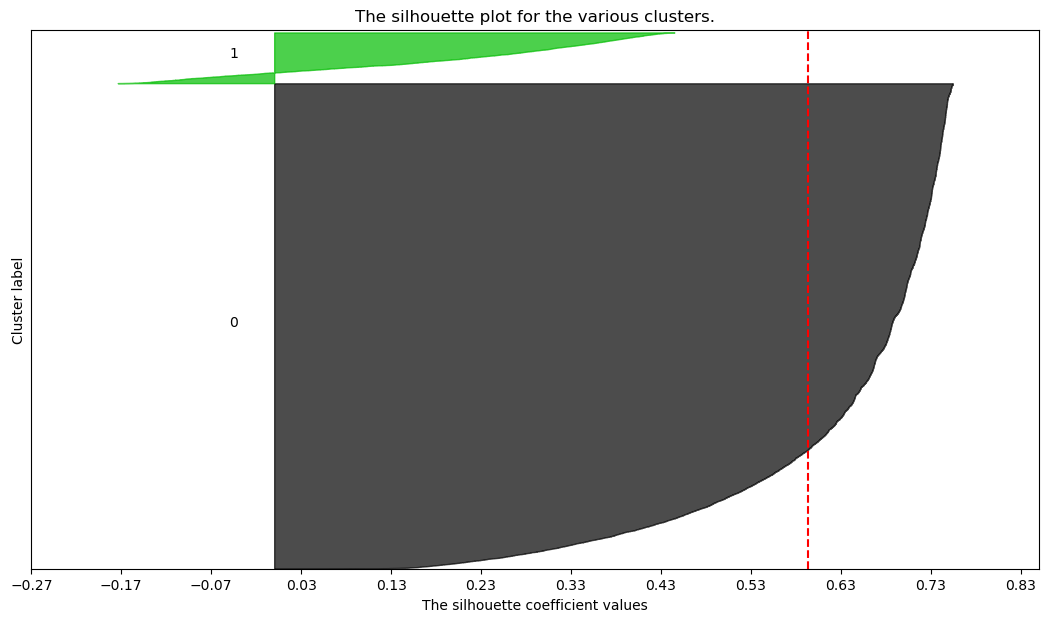

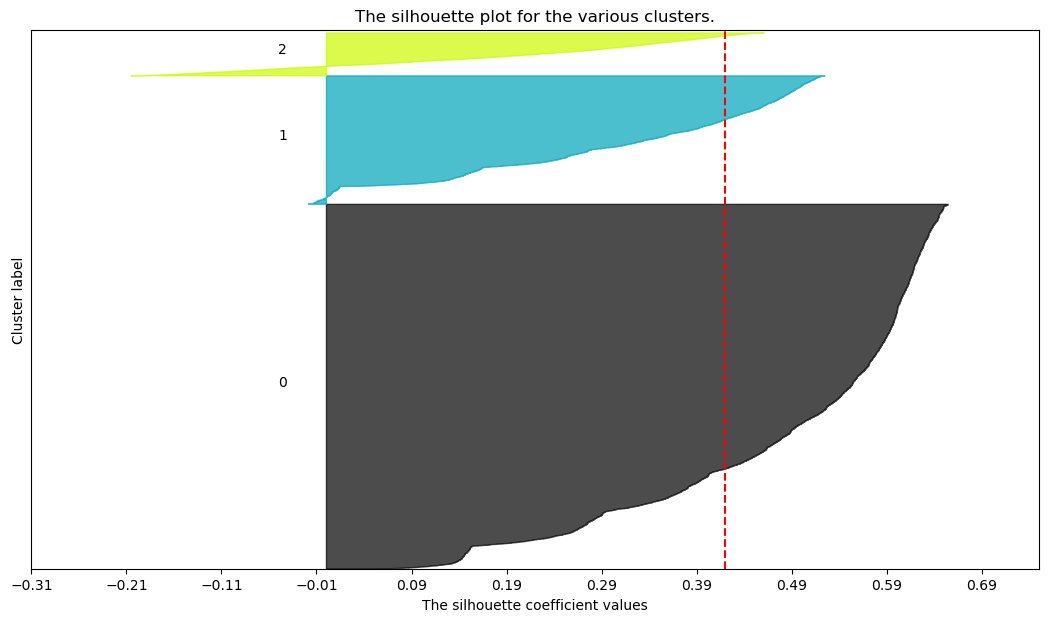

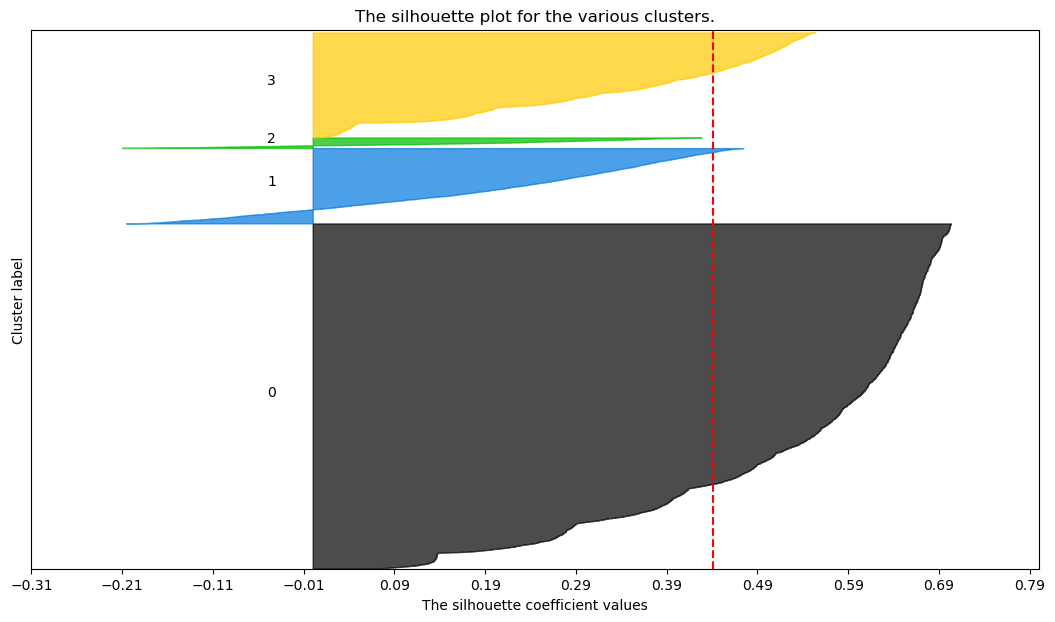

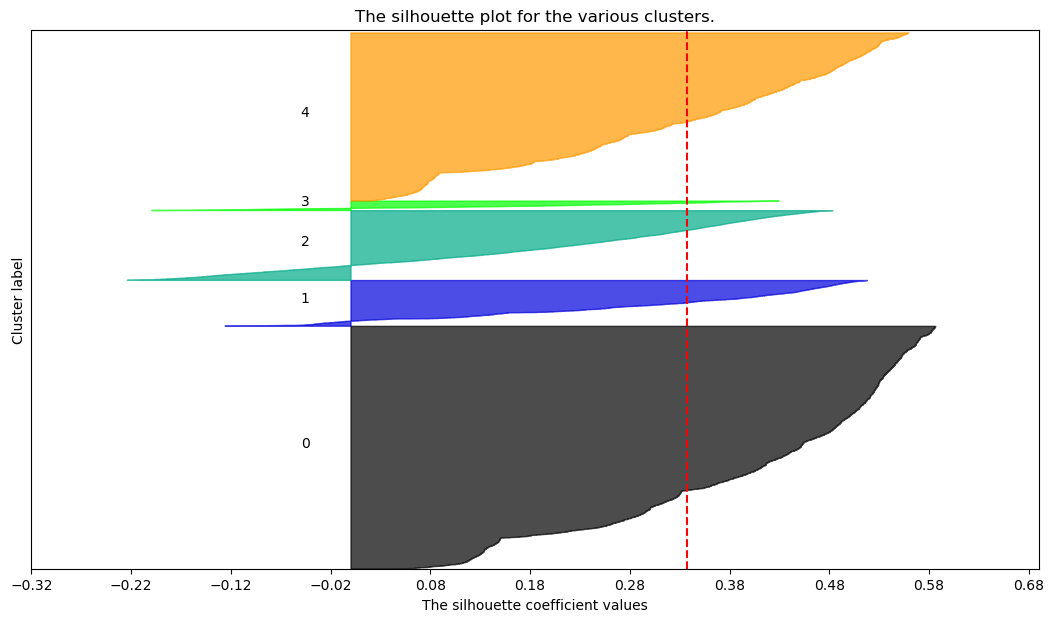

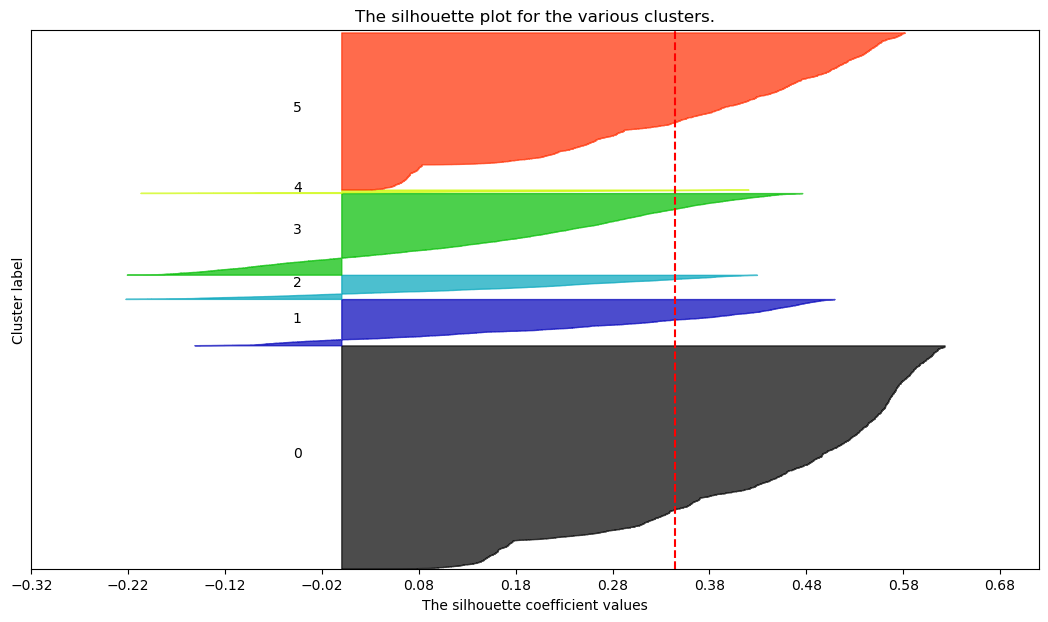

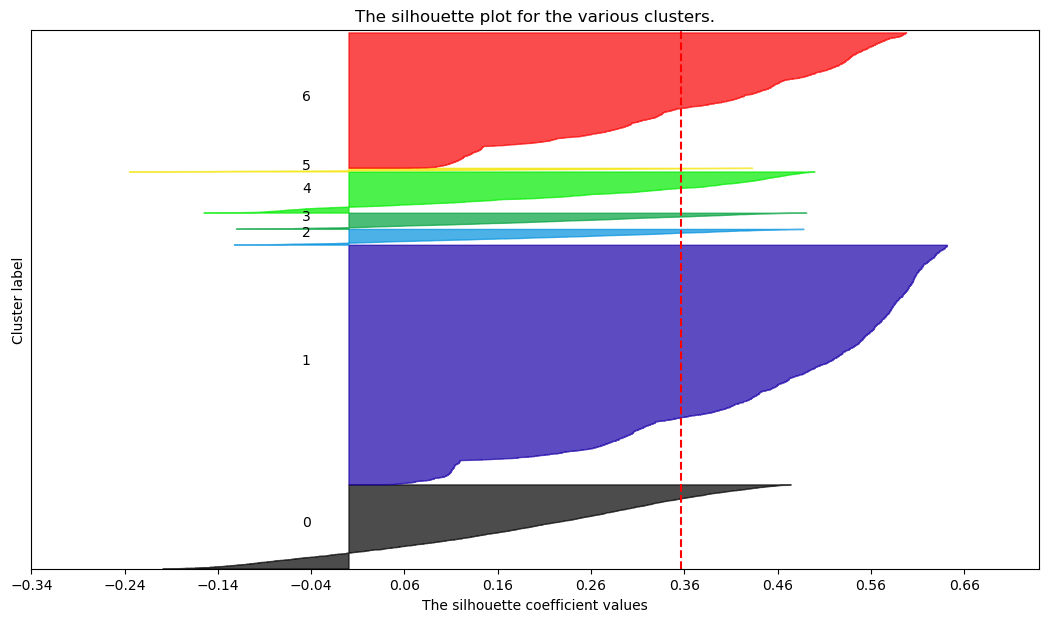

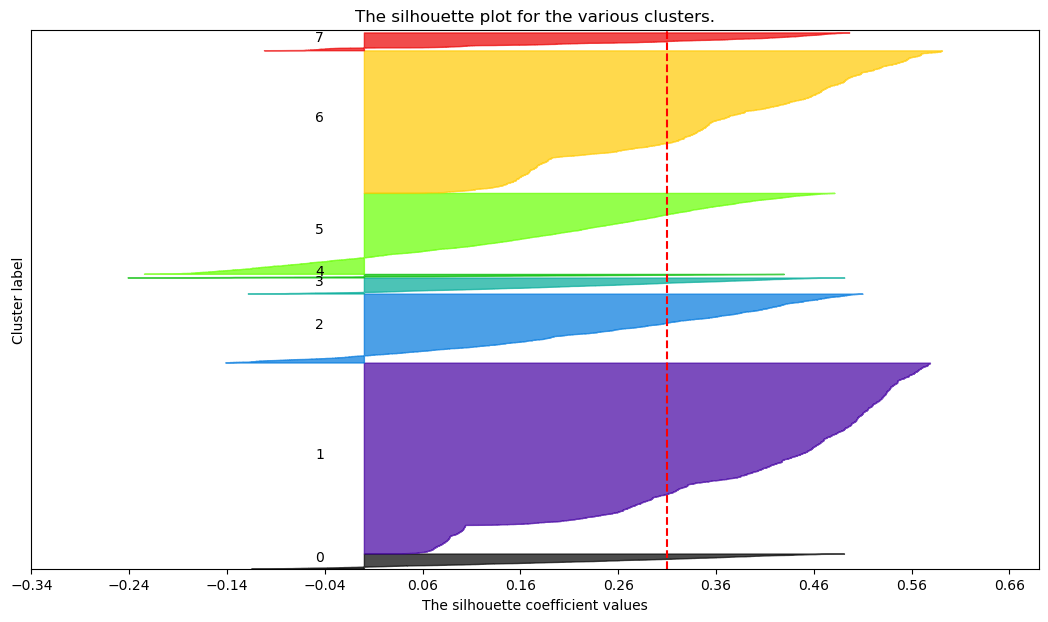

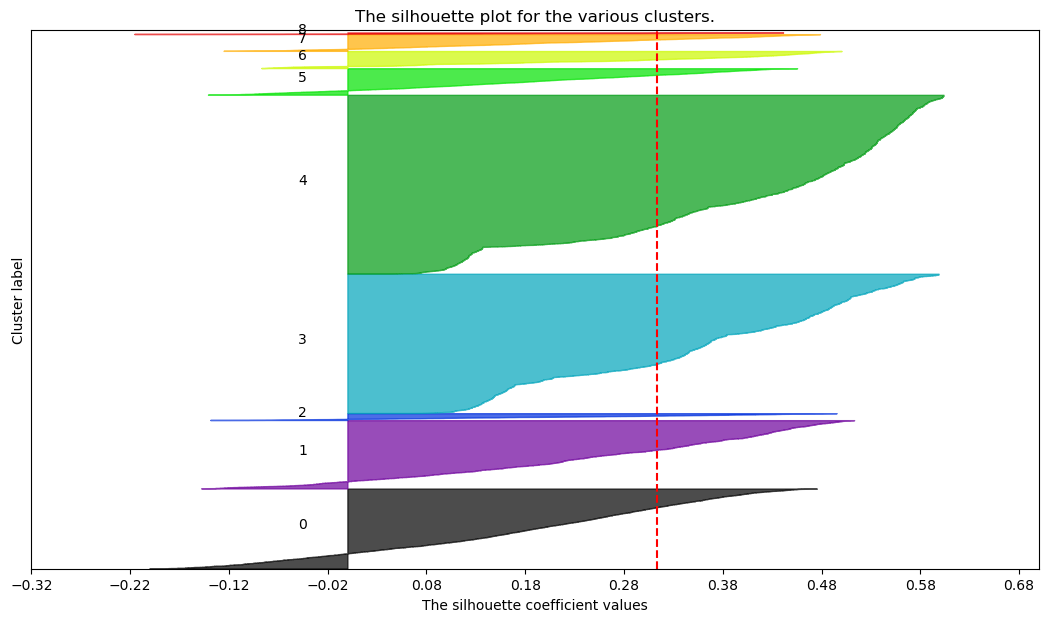

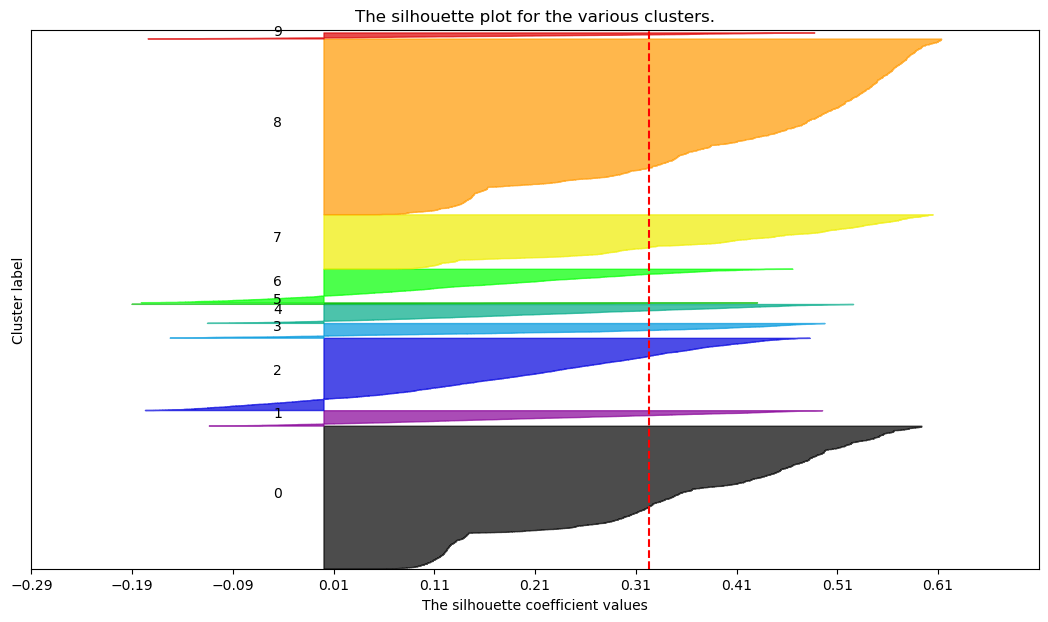

In [714]:
# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(age_order_volume)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(age_order_volume, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(age_order_volume, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [715]:
#K-means with K=2 for age_order_volume columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(age_order_volume)
km_labels = kmclust.fit_predict(age_order_volume)

# Characterizing the final clusters
df_concat = pd.concat((age_order_volume, pd.Series(km_labels, name='labels', index=age_order_volume.index)), axis=1)
df_concat.groupby('labels').mean()

customer_age  total_spending  total_orders
labels                                            
0          -0.002738       -0.230014     -0.231103
1           0.026208        2.201682      2.212104

In [716]:
age_order_volume.columns

Index(['customer_age', 'total_spending', 'total_orders'], dtype='object')

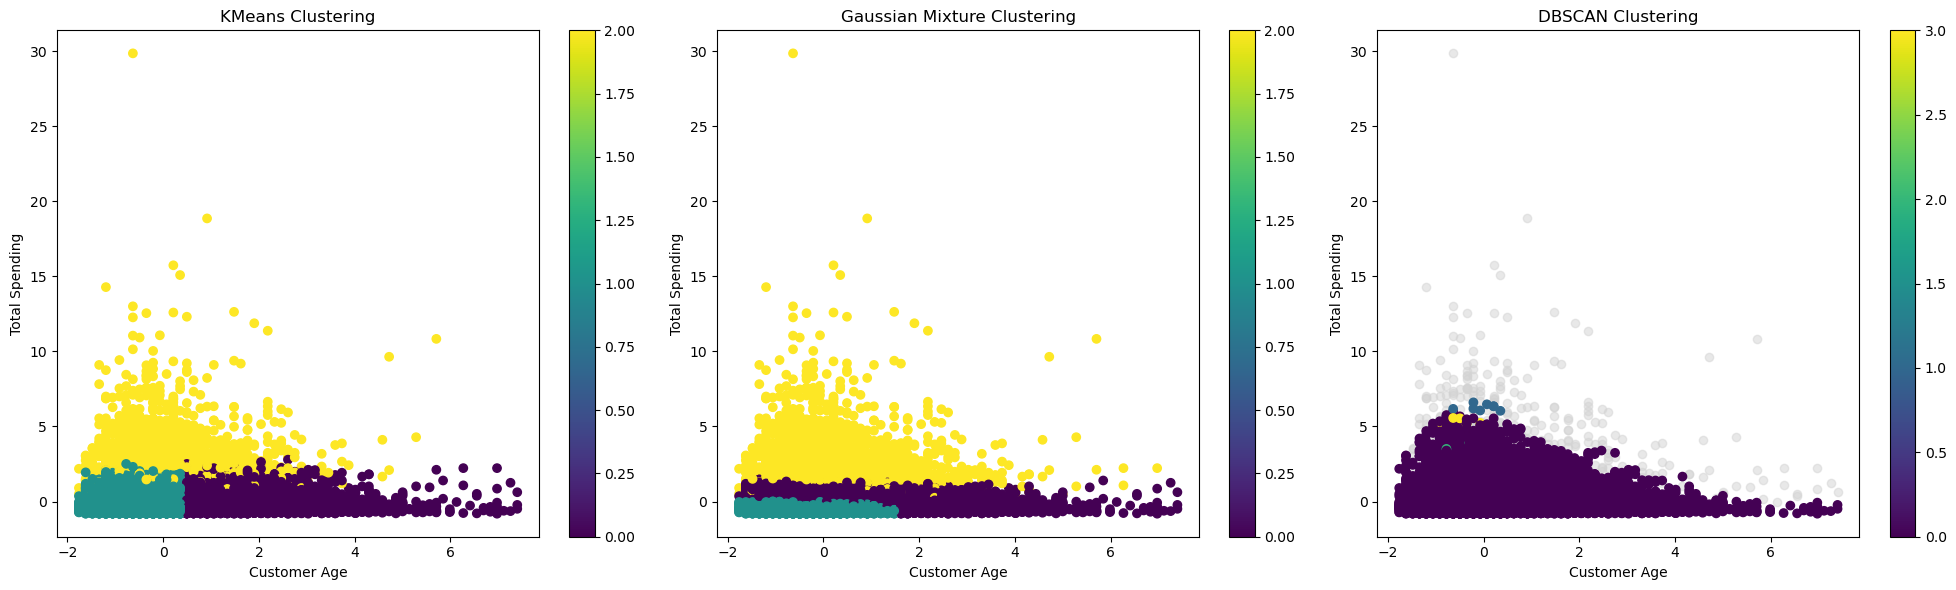

Clustering Performance Metrics:

Silhouette Scores:
KMeans: 0.420
GMM: 0.245
DBSCAN: 0.728

Cluster Sizes:
KMeans: [ 7602 21603  2532]
GMM: [11175 17039  3523]
DBSCAN: [31393     8     9     8] (Noise points: 319)

KMeans Cluster Characteristics:

Cluster 0:
Size: 7602 customers
Average age: 1.3
Average spending: -0.19
Average orders: -0.19

Cluster 1:
Size: 21603 customers
Average age: -0.5
Average spending: -0.22
Average orders: -0.22

Cluster 2:
Size: 2532 customers
Average age: -0.1
Average spending: 2.41
Average orders: 2.41

GMM Cluster Characteristics:

Cluster 0:
Size: 11175 customers
Average age: 0.4
Average spending: 0.09
Average orders: 0.08

Cluster 1:
Size: 17039 customers
Average age: -0.3
Average spending: -0.47
Average orders: -0.47

Cluster 2:
Size: 3523 customers
Average age: 0.1
Average spending: 1.99
Average orders: 2.00

DBSCAN Cluster Characteristics:

Cluster 0:
Size: 31393 customers
Average age: -0.0
Average spending: -0.05
Average orders: -0.05

Cluster 1:
Size

In [717]:
# Initialize our clustering algorithms with appropriate parameters
kmeans = KMeans(n_clusters=3, random_state=42)  # Using 3 clusters for more nuanced age groups
gmm = GaussianMixture(n_components=3, random_state=42)  # Matching KMeans clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjusted for your data scale

# Fit each algorithm and get cluster labels
kmeans_labels = kmeans.fit_predict(age_order_volume)
gmm_labels = gmm.fit_predict(age_order_volume)
dbscan_labels = dbscan.fit_predict(age_order_volume)

# Create figure with three subplots for comparing methods
fig, axs = plt.subplots(1, 3, figsize=(20,6))

# Function to create scatter plots with consistent styling
def plot_clusters(ax, x, y, labels, title, noise_mask=None):
    if noise_mask is not None:
        # Plot noise points first (if DBSCAN)
        ax.scatter(x[~noise_mask], y[~noise_mask], 
                  c='lightgray', label='Noise', alpha=0.5)
        # Plot clustered points
        scatter = ax.scatter(x[noise_mask], y[noise_mask], 
                           c=labels[noise_mask], cmap='viridis')
    else:
        # Plot all points for KMeans and GMM
        scatter = ax.scatter(x, y, c=labels, cmap='viridis')
    
    ax.set_title(f'{title} Clustering')
    ax.set_xlabel('Customer Age')
    ax.set_ylabel('Total Spending')
    return scatter

# Plot KMeans results
scatter_kmeans = plot_clusters(axs[0], 
                             age_order_volume['customer_age'],
                             age_order_volume['total_spending'],
                             kmeans_labels, 
                             'KMeans')

# Plot GMM results
scatter_gmm = plot_clusters(axs[1],
                          age_order_volume['customer_age'],
                          age_order_volume['total_spending'],
                          gmm_labels,
                          'Gaussian Mixture')

# Plot DBSCAN results
mask = dbscan_labels != -1
scatter_dbscan = plot_clusters(axs[2],
                             age_order_volume['customer_age'],
                             age_order_volume['total_spending'],
                             dbscan_labels,
                             'DBSCAN',
                             mask)

# Add colorbars
for ax, scatter in zip(axs, [scatter_kmeans, scatter_gmm, scatter_dbscan]):
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

# Calculate and print clustering metrics
print("Clustering Performance Metrics:\n" + "="*30)

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(age_order_volume, kmeans_labels)
gmm_silhouette = silhouette_score(age_order_volume, gmm_labels)
dbscan_silhouette = silhouette_score(age_order_volume[mask], dbscan_labels[mask]) if mask.any() else 0

print(f"\nSilhouette Scores:")
print(f"KMeans: {kmeans_silhouette:.3f}")
print(f"GMM: {gmm_silhouette:.3f}")
print(f"DBSCAN: {dbscan_silhouette:.3f}")

# Print cluster sizes
print(f"\nCluster Sizes:")
print(f"KMeans: {np.bincount(kmeans_labels)}")
print(f"GMM: {np.bincount(gmm_labels)}")
print(f"DBSCAN: {np.bincount(dbscan_labels[mask])} (Noise points: {(~mask).sum()})")

# Analyze cluster characteristics
def analyze_clusters(data, labels, method_name):
    print(f"\n{method_name} Cluster Characteristics:")
    for cluster in range(labels.max() + 1):
        cluster_data = data[labels == cluster]
        print(f"\nCluster {cluster}:")
        print(f"Size: {len(cluster_data)} customers")
        print(f"Average age: {cluster_data['customer_age'].mean():.1f}")
        print(f"Average spending: {cluster_data['total_spending'].mean():.2f}")
        print(f"Average orders: {cluster_data['total_orders'].mean():.2f}")

# Analyze each clustering method
analyze_clusters(age_order_volume, kmeans_labels, "KMeans")
analyze_clusters(age_order_volume, gmm_labels, "GMM")
if mask.any():
    analyze_clusters(age_order_volume[mask], dbscan_labels[mask], "DBSCAN")

<a href="#Index">Back to Index</a>

# Merge Time of Day and Order Volume <a class='anchor' id='MergeClusters'></a>

In [718]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
time_of_day_labels = kmclust.fit_predict(time_of_order_features)

#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
order_volume_labels = kmclust.fit_predict(order_volume_features)

df_scaled_new['time_of_day_labels'] = time_of_day_labels
df_scaled_new['order_volume_labels'] = order_volume_labels

In [719]:
pd.crosstab(df_scaled_new['time_of_day_labels'], df_scaled_new['order_volume_labels'])

order_volume_labels      0     1    2     3
time_of_day_labels                         
0                        1   475  258  1305
1                      269   934   65   465
2                    20891  5663    0   250
3                      351   521   36   253

In [720]:
# Mapping clusters to descriptive labels
time_of_day_mapping = {0: 'Morning, Midday, Evening Orders', 1: 'Twilight Orders', 2: 'Average across all times', 3: 'Night Orders'}
order_volume_mapping = {0: 'Low Volume', 1: 'High Volume', 2: 'Medium Volume', 3: 'Very High Volume'}

# Replace labels with descriptions
time_of_day_labels_descriptive = [time_of_day_mapping[label] for label in time_of_day_labels]
order_volume_labels_descriptive = [order_volume_mapping[label] for label in order_volume_labels]

# Crosstab with descriptive labels
pd.crosstab(time_of_day_labels_descriptive, order_volume_labels_descriptive, 
            rownames=['Time of Day'], 
            colnames=['Order Volume'])


Order Volume                     High Volume  Low Volume  Medium Volume  \
Time of Day                                                               
Average across all times                5663       20891              0   
Morning, Midday, Evening Orders          475           1            258   
Night Orders                             521         351             36   
Twilight Orders                          934         269             65   

Order Volume                     Very High Volume  
Time of Day                                        
Average across all times                      250  
Morning, Midday, Evening Orders              1305  
Night Orders                                  253  
Twilight Orders                               465

In [721]:
# Get centroids of clusters
df_centroids = df_scaled_new.groupby(['time_of_day_labels', 'order_volume_labels']).mean()

df_centroids


# Clusters with low frequency to be merged:
# (behavior_label, product_label)
#to_merge = [(0, 0), (1,0), (3,0), (0,1), (3, 1), (0, 3), (2, 3), (3, 3)]
to_merge = [(0, 0), (1, 0), (3, 0), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2), (3, 2), (0, 3)]

# Computing the euclidean distance matrix between the centroids
centroid_dists = euclidean = pairwise_distances(df_centroids)

df_dists = pd.DataFrame(
    centroid_dists, 
    columns=df_centroids.index, 
    index=df_centroids.index
)

df_dists


# Merging each low frequency clustering (source) 
# to the closest cluster (target)
source_target = {}

# Filter to_merge to avoid circular merging or merging into empty clusters
valid_clusters = [clus for clus in df_dists.index if clus not in to_merge]

for clus in to_merge:
    if clus not in source_target.values():
        # Get distances to valid clusters only
        distances = df_dists.loc[clus, valid_clusters].sort_values()

        # Find the nearest valid cluster
        if not distances.empty:
            source_target[clus] = distances.index[0]

# Update the DataFrame based on the corrected source_target
df_ = df_scaled_new.copy()

for source, target in source_target.items():
    mask = (df_['time_of_day_labels'] == source[0]) & (df_['order_volume_labels'] == source[1])
    df_.loc[mask, 'time_of_day_labels'] = target[0]
    df_.loc[mask, 'order_volume_labels'] = target[1]

# Check results
print("After merging:")
print(pd.crosstab(df_['time_of_day_labels'], df_['order_volume_labels']))



After merging:
order_volume_labels      0     1    3
time_of_day_labels                   
0                        0  2302    0
1                        0     0  530
2                    28108     0  250
3                        0     0  547


<a href="#Index">Back to Index</a>

In [722]:
# Mapping clusters to descriptive labels
time_of_day_mapping = {0: 'Morning, Midday, Evening Orders', 1: 'Twilight orders', 2: 'Average across all times', 3: 'Night orders'}
order_volume_mapping = {0: 'Low Volume', 1: 'High Volume', 2: 'Medium Volume', 3: 'Very High Volume'}

# Replace labels with descriptions
time_of_day_labels_descriptive = [time_of_day_mapping[label] for label in df_['time_of_day_labels']]
order_volume_labels_descriptive = [order_volume_mapping[label] for label in df_['order_volume_labels']]

# Crosstab with descriptive labels
pd.crosstab(time_of_day_labels_descriptive, order_volume_labels_descriptive, 
            rownames=['Time of Day'], 
            colnames=['Order Volume'])

Order Volume                     High Volume  Low Volume  Very High Volume
Time of Day                                                               
Average across all times                   0       28108               250
Morning, Midday, Evening Orders         2302           0                 0
Night orders                               0           0               547
Twilight orders                            0           0               530

<a href="#Index">Back to Index</a>

## Visualizing the Final Clustering Solution

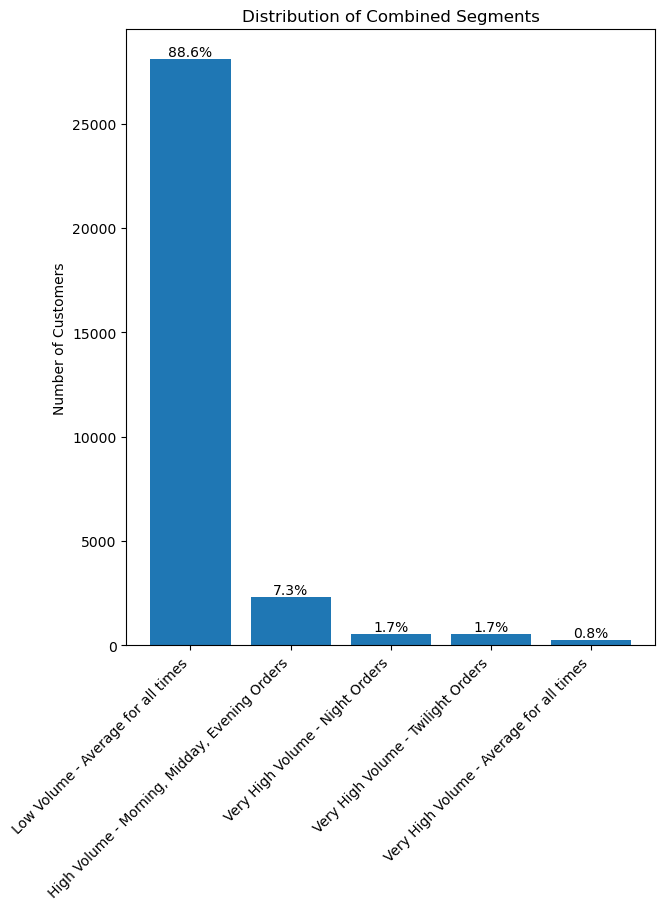

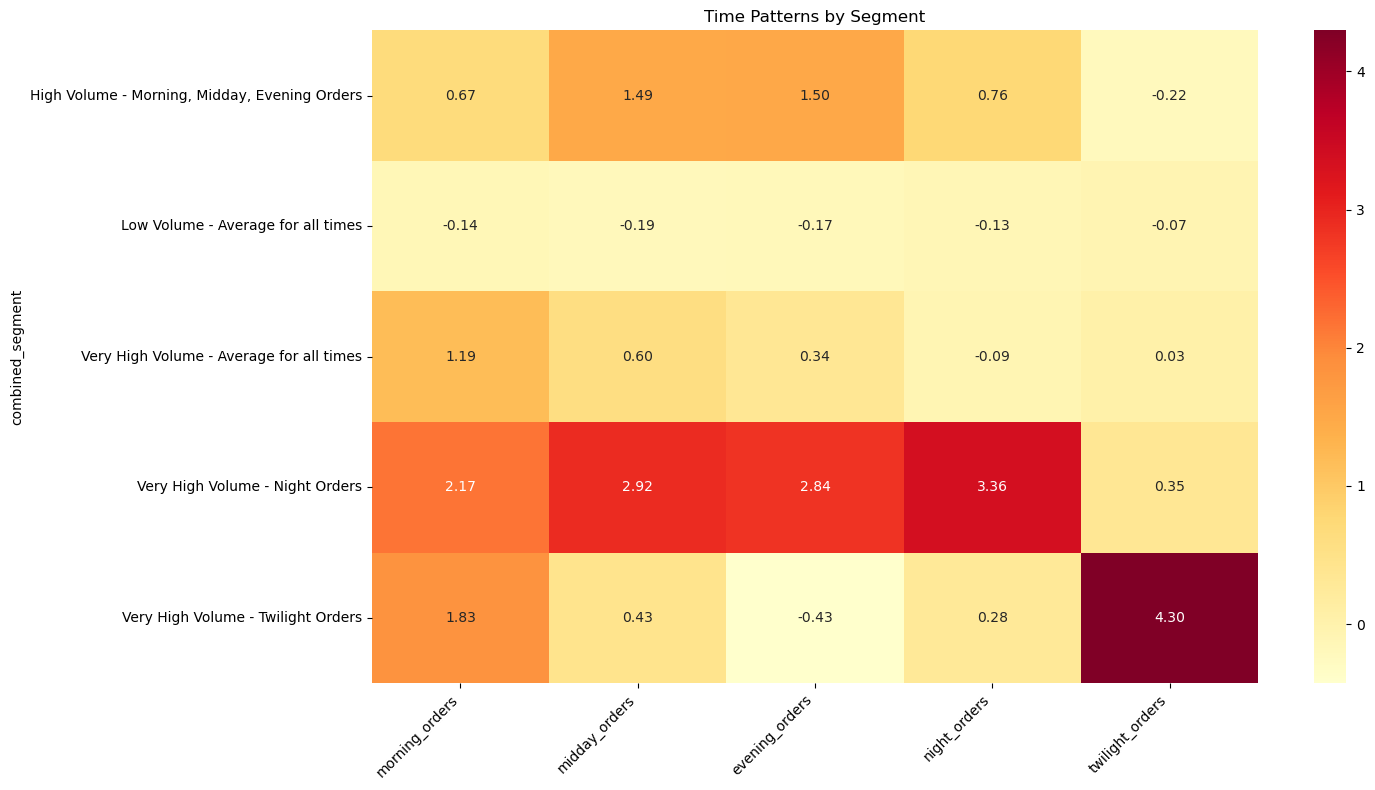

In [723]:
# Ensure the combined_segment column is created
def create_combined_segment(df, volume_labels, time_labels):
    """
    Creates the combined_segment column by merging volume and time segments.
    """
    # Map numeric labels to descriptive names
    volume_names = {
        0: 'Low Volume',
        1: 'High Volume',
        3: 'Very High Volume'  # Note: 2 ('Medium Volume ') isn't in your data
    }

    time_names = {
        0: 'Morning, Midday, Evening Orders',
        1: 'Twilight Orders',
        2: 'Average for all times',
        3: 'Night Orders'
    }

    # Add cluster labels to the dataframe
    df['volume_segment'] = volume_labels.map(volume_names)
    df['time_segment'] = time_labels.map(time_names)

    # Create combined segment labels
    df['combined_segment'] = df['volume_segment'] + ' - ' + df['time_segment']

    return df

# Function to calculate segment counts and percentages
def calculate_segment_counts(df):
    """
    Calculate counts and percentages for each combined segment.
    """
    segment_counts = df['combined_segment'].value_counts().reset_index()
    segment_counts.columns = ['Segment', 'Count']
    segment_counts['Percentage'] = (segment_counts['Count'] / len(df) * 100).round(2)
    return segment_counts

# Function to visualize merged segments
def plot_merged_segments(df, segment_counts):
    """
    Creates comprehensive visualizations for the merged segments.
    """
    # Create figure for segment distribution
    plt.figure(figsize=(15, 8))
    
    # Plot 1: Segment size distribution
    plt.subplot(1, 2, 1)
    bars = plt.bar(segment_counts['Segment'], segment_counts['Count'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Combined Segments')
    plt.ylabel('Number of Customers')
    
    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height / len(df) * 100:.1f}%',
                 ha='center', va='bottom')
    
    # Additional plot for time patterns
    plt.figure(figsize=(15, 8))
    time_cols = ['morning_orders', 'midday_orders', 'evening_orders', 
                 'night_orders', 'twilight_orders']  # Keeping spaces as per your data
    
    time_patterns = df.groupby('combined_segment')[time_cols].mean()
    sns.heatmap(time_patterns, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title('Time Patterns by Segment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
df_ = create_combined_segment(df_, df_['order_volume_labels'], df_['time_of_day_labels'])
segment_counts = calculate_segment_counts(df_)
plot_merged_segments(df_, segment_counts)


Low Volume - Average for all times (65.8%)

Consistently low engagement across all time periods (-0.20 to -0.30)
Largest customer segment
No distinct time preferences
Represents significant growth opportunity

Very High Volume - Average for all times (20.1%)

Moderate positive activity during day (0.24 to 0.39)
Slight decrease in night/twilight hours (-0.11 to -0.16)
Second-largest segment
Balanced ordering patterns throughout traditional hours

High Volume - Morning, Midday, Evening Orders (5.2%)

Strong daytime activity progression (morning: 1.72 → midday: 2.48 → evening: 2.37)
Minimal night/twilight activity (0.40, 0.08)
Clear business hours pattern
Highest daytime engagement of all segments

Very High Volume - Night Orders (3.5%)

Dominant night activity (3.54)
Moderate evening presence (0.23)
Low morning/midday engagement
Clear late-night preference

Very High Volume - Twilight Orders (5.3%)

Strong twilight hours preference (2.96)
Some morning activity (0.56)
Negative midday/evening patterns
Distinct early/late hours focus

<a href="#Index">Back to Index</a>

## Combine final Clusters with Zip Codes to locate our clustered customer <a class="anchor" id="ZipCodes"></a>

In [724]:
df_.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'total_spending',
       'total_orders', 'cuisine_diversity', 'weekend_orders',
       'underweekend_orders', 'weekend_ratio', 'lunch_orders', 'dinner_orders',
       'morning_orders', 'midday_orders', 'evening_orders', 'night_orders',
       'twilight_orders', 'time_of_day_labels', 'order_volume_labels',
       'volume_segment', 'time_segment', 'combined_segment'],
      dtype='object')

We add the customer region to the data frame

In [725]:
# Add customer_region back to the df_numeric_original dataframe
df_['customer_region'] = df['customer_region']

# Display the updated dataframe
df_

customer_age  vendor_count  product_count  is_chain  first_order  \
0         -1.338044     -0.402940      -0.099538 -0.459198    -1.181245   
1         -1.478899     -0.402940      -0.530395 -0.208168    -1.181245   
2          1.479045     -0.763931      -0.530395 -0.208168    -1.181245   
3         -0.492917     -0.402940      -0.386776 -0.459198    -1.181245   
4         -1.056335     -0.402940      -0.099538 -0.710229    -1.181245   
...             ...           ...            ...       ...          ...   
31732      0.352209     -0.763931      -0.674014 -0.459198     0.233080   
31733     -0.070354     -0.763931      -0.674014 -0.710229    -0.016507   
31734     -0.492917     -0.763931      -0.674014 -0.459198    -0.682071   
31735      0.915627     -0.763931      -0.674014 -0.710229    -0.890060   
31736      0.352209     -0.763931      -0.674014 -0.710229     0.233080   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0       -2.707106     -0.410078  -0.418056      -0.265138  -0.12277  ...   
1       -2.707106      0.630296  -0.162487      -0.265138  -0.12277  ...   
2       -2.707106      0.370202  -0.418056      -0.265138  -0.12277  ...   
3       -2.663969     -0.410078   0.135676      -0.265138  -0.12277  ...   
4       -2.663969      0.803692   1.285734      -0.265138  -0.12277  ...   
...           ...           ...        ...            ...       ...  ...   
31732   -2.750244     -0.410078  -0.418056       1.881315  -0.12277  ...   
31733   -2.750244      1.150483  -0.418056      -0.265138  -0.12277  ...   
31734   -2.750244     -0.410078  -0.418056      -0.265138  -0.12277  ...   
31735   -2.750244     -0.410078   0.093081      -0.265138  -0.12277  ...   
31736   -2.750244     -0.410078  -0.418056      -0.265138  -0.12277  ...   

       midday_orders  evening_orders  night_orders  twilight_orders  \
0          -0.615700        0.204674     -0.276604        -0.362107   
1          -0.184514       -0.582069     -0.276604        -0.362107   
2          -0.184514       -0.582069     -0.276604        -0.362107   
3           0.246671       -0.582069     -0.276604        -0.362107   
4          -0.615700       -0.582069     -0.276604        -0.362107   
...              ...             ...           ...              ...   
31732      -0.184514       -0.582069     -0.276604        -0.362107   
31733      -0.615700       -0.188697     -0.276604        -0.362107   
31734      -0.615700       -0.582069     -0.276604         0.498537   
31735      -0.184514       -0.582069     -0.276604        -0.362107   
31736      -0.615700       -0.188697     -0.276604        -0.362107   

       time_of_day_labels  order_volume_labels  volume_segment  \
0                       2                    0      Low Volume   
1                       2                    0      Low Volume   
2                       2                    0      Low Volume   
3                       2                    0      Low Volume   
4                       2                    0      Low Volume   
...                   ...                  ...             ...   
31732                   2                    0      Low Volume   
31733                   2                    0      Low Volume   
31734                   2                    0      Low Volume   
31735                   2                    0      Low Volume   
31736                   2                    0      Low Volume   

                time_segment                    combined_segment  \
0      Average for all times  Low Volume - Average for all times   
1      Average for all times  Low Volume - Average for all times   
2      Average for all times  Low Volume - Average for all times   
3      Average for all times  Low Volume - Average for all times   
4      Average for all times  Low Volume - Average for all times   
...                      ...                                 ...   
31732  Average for all times  Low Volume - Average for all times   
317

In [726]:
#Clean -   values and cast to int
df_clean = df_.copy()
df_clean['customer_region'] = df['customer_region'].replace('-   ', '0000')
df_clean['customer_region'] = pd.to_numeric(df_clean['customer_region'], errors='coerce').fillna(0).astype(int).astype(str).str.zfill(4)

In [727]:
df_clean['customer_region'] = df_clean['customer_region'].astype(int)

In [728]:
# Count non-numeric values
non_numeric_count = pd.to_numeric(df_clean['customer_region'], errors='coerce').isna().sum()
print(f"\nFound {non_numeric_count} non-numeric values")


Found 0 non-numeric values


In [729]:
df_ = df_clean
df_.head()

customer_age  vendor_count  product_count  is_chain  first_order  \
0     -1.338044     -0.402940      -0.099538 -0.459198    -1.181245   
1     -1.478899     -0.402940      -0.530395 -0.208168    -1.181245   
2      1.479045     -0.763931      -0.530395 -0.208168    -1.181245   
3     -0.492917     -0.402940      -0.386776 -0.459198    -1.181245   
4     -1.056335     -0.402940      -0.099538 -0.710229    -1.181245   

   last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0   -2.707106     -0.410078  -0.418056      -0.265138  -0.12277  ...   
1   -2.707106      0.630296  -0.162487      -0.265138  -0.12277  ...   
2   -2.707106      0.370202  -0.418056      -0.265138  -0.12277  ...   
3   -2.663969     -0.410078   0.135676      -0.265138  -0.12277  ...   
4   -2.663969      0.803692   1.285734      -0.265138  -0.12277  ...   

   midday_orders  evening_orders  night_orders  twilight_orders  \
0      -0.615700        0.204674     -0.276604        -0.362107   
1      -0.184514       -0.582069     -0.276604        -0.362107   
2      -0.184514       -0.582069     -0.276604        -0.362107   
3       0.246671       -0.582069     -0.276604        -0.362107   
4      -0.615700       -0.582069     -0.276604        -0.362107   

   time_of_day_labels  order_volume_labels  volume_segment  \
0                   2                    0      Low Volume   
1                   2                    0      Low Volume   
2                   2                    0      Low Volume   
3                   2                    0      Low Volume   
4                   2                    0      Low Volume   

            time_segment                    combined_segment  customer_region  
0  Average for all times  Low Volume - Average for all times             2360  
1  Average for all times  Low Volume - Average for all times             8670  
2  Average for all times  Low Volume - Average for all times             4660  
3  Average for all times  Low Volume - Average for all times             4660  
4  Average for all times  Low Volume - Average for all times             4660  

[5 rows x 40 columns]

In [730]:
# Import required libraries
import pandas as pd
import numpy as np

def standardize_zip(customer_region):
    """
    Standardize ZIP code format to 5 digits
    
    Args:
        customer_region: The ZIP code to standardize
    Returns:
        str: Standardized 5-digit ZIP code
    """
    try:
        if pd.isna(customer_region):
            return None
        # Convert to string and pad with leading zeros if needed
        return str(int(customer_region)).zfill(5)
    except (ValueError, TypeError):
        return None

def classify_area(customer_region):
    """
    Classify area based on specific ZIP code patterns in the dataset
    
    Args:
        customer_region: ZIP code to classify
    Returns:
        tuple: (area_type, region)
    """
    if pd.isna(customer_region):
        return ('undefined', 'undefined')
        
    zip_str = standardize_zip(customer_region)
    if not zip_str:
        return ('undefined', 'undefined')
    
    # Classification based on the specific ZIP codes in dataset
    
    # New England Region (02xxx)
    if zip_str.startswith('02'):
        # Plymouth area
        if zip_str in ['02360']:
            return ('city', 'Plymouth County, MA')
        # Cape Cod area
        elif zip_str in ['02440', '02490']:
            return ('coastal', 'Cape Cod, MA')
        return ('suburban', 'Massachusetts')
        
    # Maine Region (04xxx)
    elif zip_str.startswith('04'):
        if zip_str in ['04660']:
            return ('coastal', 'Coastal Maine')
        return ('rural', 'Maine')
        
    # New Jersey/NY Metro Region (08xxx)
    elif zip_str.startswith('08'):
        if zip_str in ['08670']:
            return ('suburban', 'New Jersey')
        return ('suburban', 'New Jersey Metro')
        
    # Default case
    return ('undefined', 'Other')

def process_customer_data(df):
    """
    Process customer data to add area classifications
    
    Args:
        df (pandas.DataFrame): Input dataframe with customer_region column
    Returns:
        pandas.DataFrame: DataFrame with added classification columns
    """
    # Create a copy to avoid modifying the original
    result_df = df.copy()
    
    # Add classifications
    print("Classifying ZIP codes...")
    classifications = result_df['customer_region'].apply(classify_area)
    result_df['area_type'] = classifications.apply(lambda x: x[0])
    result_df['region'] = classifications.apply(lambda x: x[1])
    
    # Generate analysis
    print("\nArea Type Distribution:")
    print(result_df['area_type'].value_counts())
    
    print("\nRegional Distribution:")
    print(result_df['region'].value_counts())
    
    # # Calculate average spending by area type
    # print("\nAverage Spending by Area Type:")
    # avg_spending = result_df.groupby('area_type')['total_spending'].mean()
    # print(avg_spending)
    
    # # Calculate average spending by region
    # print("\nAverage Spending by Region:")
    # avg_region_spending = result_df.groupby('region')['total_spending'].mean()
    # print(avg_region_spending)
    return result_df

# Process the dataframe
df_with_areas = process_customer_data(df_)

# Process the dataframe
df_zip = process_customer_data(df_)
#df.to_csv('../data/processedZip_ABCDEats_data.csv', index=False)

Classifying ZIP codes...

Area Type Distribution:
area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64

Regional Distribution:
region
New Jersey             9623
Coastal Maine          9550
Plymouth County, MA    8829
Cape Cod, MA           1928
Maine                   857
New Jersey Metro        508
Other                   442
Name: count, dtype: int64
Classifying ZIP codes...

Area Type Distribution:
area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64

Regional Distribution:
region
New Jersey             9623
Coastal Maine          9550
Plymouth County, MA    8829
Cape Cod, MA           1928
Maine                   857
New Jersey Metro        508
Other                   442
Name: count, dtype: int64


In [731]:
df_zip

customer_age  vendor_count  product_count  is_chain  first_order  \
0         -1.338044     -0.402940      -0.099538 -0.459198    -1.181245   
1         -1.478899     -0.402940      -0.530395 -0.208168    -1.181245   
2          1.479045     -0.763931      -0.530395 -0.208168    -1.181245   
3         -0.492917     -0.402940      -0.386776 -0.459198    -1.181245   
4         -1.056335     -0.402940      -0.099538 -0.710229    -1.181245   
...             ...           ...            ...       ...          ...   
31732      0.352209     -0.763931      -0.674014 -0.459198     0.233080   
31733     -0.070354     -0.763931      -0.674014 -0.710229    -0.016507   
31734     -0.492917     -0.763931      -0.674014 -0.459198    -0.682071   
31735      0.915627     -0.763931      -0.674014 -0.710229    -0.890060   
31736      0.352209     -0.763931      -0.674014 -0.710229     0.233080   

       last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0       -2.707106     -0.410078  -0.418056      -0.265138  -0.12277  ...   
1       -2.707106      0.630296  -0.162487      -0.265138  -0.12277  ...   
2       -2.707106      0.370202  -0.418056      -0.265138  -0.12277  ...   
3       -2.663969     -0.410078   0.135676      -0.265138  -0.12277  ...   
4       -2.663969      0.803692   1.285734      -0.265138  -0.12277  ...   
...           ...           ...        ...            ...       ...  ...   
31732   -2.750244     -0.410078  -0.418056       1.881315  -0.12277  ...   
31733   -2.750244      1.150483  -0.418056      -0.265138  -0.12277  ...   
31734   -2.750244     -0.410078  -0.418056      -0.265138  -0.12277  ...   
31735   -2.750244     -0.410078   0.093081      -0.265138  -0.12277  ...   
31736   -2.750244     -0.410078  -0.418056      -0.265138  -0.12277  ...   

       night_orders  twilight_orders  time_of_day_labels  order_volume_labels  \
0         -0.276604        -0.362107                   2                    0   
1         -0.276604        -0.362107                   2                    0   
2         -0.276604        -0.362107                   2                    0   
3         -0.276604        -0.362107                   2                    0   
4         -0.276604        -0.362107                   2                    0   
...             ...              ...                 ...                  ...   
31732     -0.276604        -0.362107                   2                    0   
31733     -0.276604        -0.362107                   2                    0   
31734     -0.276604         0.498537                   2                    0   
31735     -0.276604        -0.362107                   2                    0   
31736     -0.276604        -0.362107                   2                    0   

       volume_segment           time_segment  \
0          Low Volume  Average for all times   
1          Low Volume  Average for all times   
2          Low Volume  Average for all times   
3          Low Volume  Average for all times   
4          Low Volume  Average for all times   
...               ...                    ...   
31732      Low Volume  Average for all times   
31733      Low Volume  Average for all times   
31734      Low Volume  Average for all times   
31735      Low Volume  Average for all times   
31736      Low Volume  Average for all times   

                         combined_segment  customer_region  area_type  \
0      Low Volume - Average for all times             2360       city   
1      Low Volume - Average for all times             8670   suburban   
2      Low Volume - Average for all times             4660    coastal   
3      Low Volume - Average for all times             4660    coastal   
4      Low Volume - Average for all times             4660    coastal   
...                                   ...              ...        ...   
31732  Low Volume - Average for all times             8670   suburban   
31733  Low Volume - Average for all times             8670 

In [732]:
# Group by region and combined_segment and count occurrences
region_segment_counts = df_zip.groupby(['region', 'combined_segment']).size().unstack(fill_value=0)

# Display the counts
region_segment_counts

combined_segment     High Volume - Morning, Midday, Evening Orders  \
region                                                               
Cape Cod, MA                                                   222   
Coastal Maine                                                  829   
Maine                                                           40   
New Jersey                                                     169   
New Jersey Metro                                                 6   
Other                                                            9   
Plymouth County, MA                                           1027   

combined_segment     Low Volume - Average for all times  \
region                                                    
Cape Cod, MA                                       1654   
Coastal Maine                                      8507   
Maine                                               812   
New Jersey                                         8726   
New Jersey Metro                                    483   
Other                                               403   
Plymouth County, MA                                7523   

combined_segment     Very High Volume - Average for all times  \
region                                                          
Cape Cod, MA                                                4   
Coastal Maine                                              73   
Maine                                                       2   
New Jersey                                                142   
New Jersey Metro                                            6   
Other                                                       7   
Plymouth County, MA                                        16   

combined_segment     Very High Volume - Night Orders  \
region                                                 
Cape Cod, MA                                      47   
Coastal Maine                                    139   
Maine                                              3   
New Jersey                                        93   
New Jersey Metro                                   1   
Other                                              9   
Plymouth County, MA                              255   

combined_segment     Very High Volume - Twilight Orders  
region                                                   
Cape Cod, MA                                          1  
Coastal Maine                                         2  
Maine                                                 0  
New Jersey                                          493  
New Jersey Metro                                     12  
Other                                                14  
Plymouth County, MA                                   8

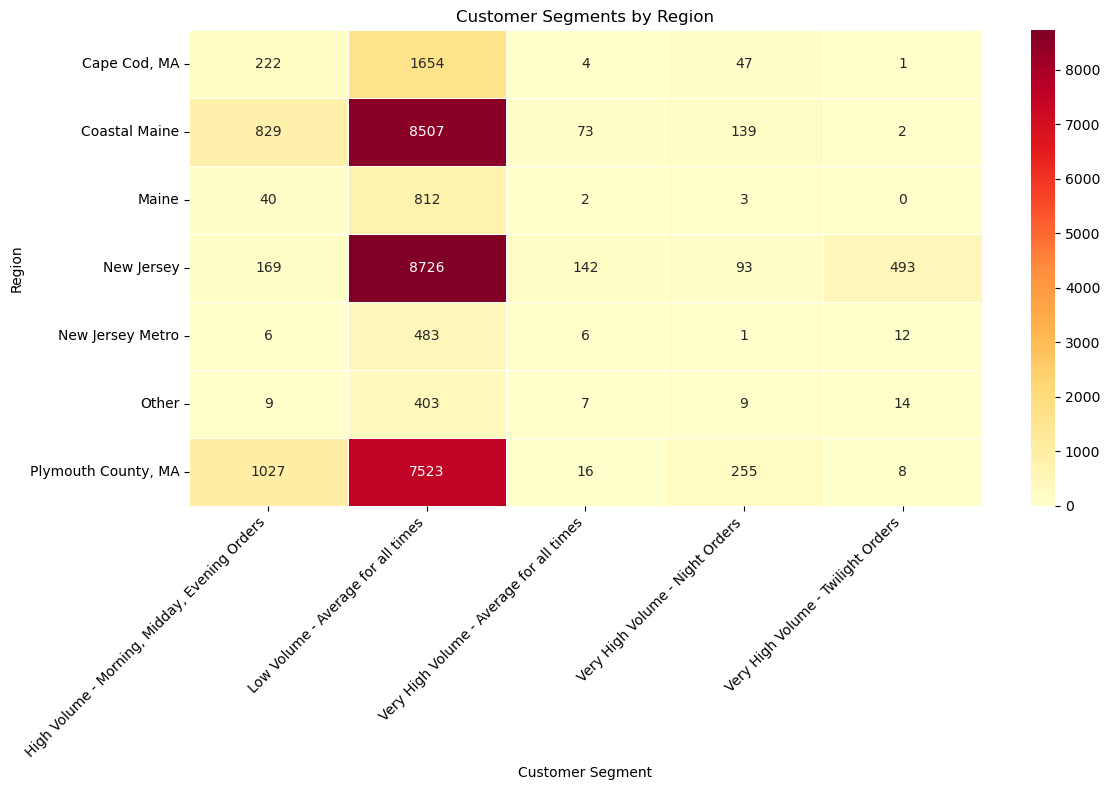

In [743]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(region_segment_counts, annot=True, fmt='d', cmap='YlOrRd', linewidths=.5)

# Add titles and labels
plt.title('Customer Segments by Region')
plt.xlabel('Customer Segment')
plt.ylabel('Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [744]:
# Group by area_type and count the number of customers in each category
area_type_counts = df_with_areas['area_type'].value_counts()

# Display the counts
print("Number of customers from cities or outside of cities:")
area_type_counts

Number of customers from cities or outside of cities:


area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64

In [745]:
# Group by area_type and combined_segment and count occurrences
area_segment_counts = df_zip.groupby(['area_type', 'combined_segment']).size().unstack(fill_value=0)

# Display the counts
area_segment_counts

combined_segment  High Volume - Morning, Midday, Evening Orders  \
area_type                                                         
city                                                       1027   
coastal                                                    1051   
rural                                                        40   
suburban                                                    175   
undefined                                                     9   

combined_segment  Low Volume - Average for all times  \
area_type                                              
city                                            7523   
coastal                                        10161   
rural                                            812   
suburban                                        9209   
undefined                                        403   

combined_segment  Very High Volume - Average for all times  \
area_type                                                    
city                                                    16   
coastal                                                 77   
rural                                                    2   
suburban                                               148   
undefined                                                7   

combined_segment  Very High Volume - Night Orders  \
area_type                                           
city                                          255   
coastal                                       186   
rural                                           3   
suburban                                       94   
undefined                                       9   

combined_segment  Very High Volume - Twilight Orders  
area_type                                             
city                                               8  
coastal                                            3  
rural                                              0  
suburban                                         505  
undefined                                         14

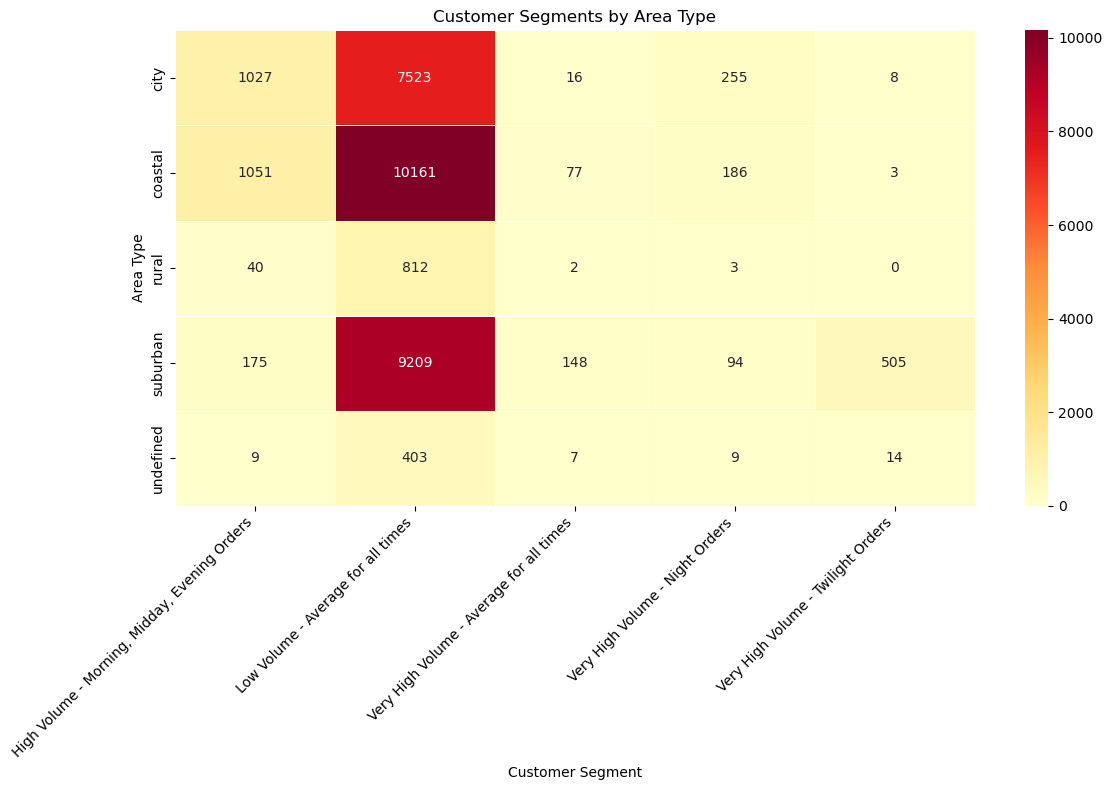

In [747]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(area_segment_counts, annot=True, fmt='d', cmap='YlOrRd', linewidths=.5)

# Add titles and labels
plt.title('Customer Segments by Area Type')
plt.xlabel('Customer Segment')
plt.ylabel('Area Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()